# Technical Indicators

## 0. Imports and Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import os

### a. Import Data

In [2]:
data = pd.read_csv("cleaned_data-from 20211130 to 20231122-v02.csv")

In [3]:
data.head()

,Unnamed: 0,Adj Close-AAPL,Adj Close-AMZN,Adj Close-GOOG,Adj Close-META,Adj Close-MSFT,Adj Close-NVDA,Adj Close-TSLA,High-AAPL,High-AMZN,...,Open-MSFT,Open-NVDA,Open-TSLA,Volume-AAPL,Volume-AMZN,Volume-GOOG,Volume-META,Volume-MSFT,Volume-NVDA,Volume-TSLA
0,2021-11-30 14:30:00,164.0600,178.32797,145.95300,335.030,337.20,331.737,387.62332,164.22,179.28850,...,335.32,331.6900,381.45667,30227336.0,760036.0,219225.0,4263603.0,6570598.0,12885068.0,6562747.0
1,2021-11-30 15:30:00,163.1000,176.07700,144.25300,329.230,331.04,322.500,377.06665,164.58,178.55551,...,337.22,331.7250,387.76670,28373092.0,685434.0,174966.0,3818372.0,5500238.0,10079985.0,5269359.0
2,2021-11-30 16:30:00,163.4500,175.25551,143.41052,327.580,330.28,322.040,377.10498,163.68,176.40350,...,331.03,322.4805,376.84000,18461416.0,474069.0,168113.0,2485049.0,4107046.0,7347306.0,3247689.0
3,2021-11-30 17:30:00,163.7589,175.09103,142.94101,326.465,330.63,322.235,375.49840,164.26,175.72650,...,330.26,321.9500,376.96335,12421191.0,280328.0,130850.0,2303632.0,1937892.0,4808977.0,2089177.0
4,2021-11-30 18:30:00,164.5100,175.94950,143.61350,326.940,332.17,325.125,379.50668,164.92,176.21451,...,330.63,322.2250,375.51000,14607270.0,303796.0,122480.0,2015707.0,2078903.0,5883897.0,1840965.0


In [4]:
df = data.copy()

### b. Drop Nan Rows

In [5]:
def drop_nan_rows(df):
    """
    Drop all rows with NaN values from a DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.

    Returns:
    - pd.DataFrame: DataFrame with NaN rows dropped.
    """
    # Drop rows with NaN values
    df = df.dropna()

    return df

In [6]:
df = drop_nan_rows(df)
df.head()

,Unnamed: 0,Adj Close-AAPL,Adj Close-AMZN,Adj Close-GOOG,Adj Close-META,Adj Close-MSFT,Adj Close-NVDA,Adj Close-TSLA,High-AAPL,High-AMZN,...,Open-MSFT,Open-NVDA,Open-TSLA,Volume-AAPL,Volume-AMZN,Volume-GOOG,Volume-META,Volume-MSFT,Volume-NVDA,Volume-TSLA
0,2021-11-30 14:30:00,164.0600,178.32797,145.95300,335.030,337.20,331.737,387.62332,164.22,179.28850,...,335.32,331.6900,381.45667,30227336.0,760036.0,219225.0,4263603.0,6570598.0,12885068.0,6562747.0
1,2021-11-30 15:30:00,163.1000,176.07700,144.25300,329.230,331.04,322.500,377.06665,164.58,178.55551,...,337.22,331.7250,387.76670,28373092.0,685434.0,174966.0,3818372.0,5500238.0,10079985.0,5269359.0
2,2021-11-30 16:30:00,163.4500,175.25551,143.41052,327.580,330.28,322.040,377.10498,163.68,176.40350,...,331.03,322.4805,376.84000,18461416.0,474069.0,168113.0,2485049.0,4107046.0,7347306.0,3247689.0
3,2021-11-30 17:30:00,163.7589,175.09103,142.94101,326.465,330.63,322.235,375.49840,164.26,175.72650,...,330.26,321.9500,376.96335,12421191.0,280328.0,130850.0,2303632.0,1937892.0,4808977.0,2089177.0
4,2021-11-30 18:30:00,164.5100,175.94950,143.61350,326.940,332.17,325.125,379.50668,164.92,176.21451,...,330.63,322.2250,375.51000,14607270.0,303796.0,122480.0,2015707.0,2078903.0,5883897.0,1840965.0


### c. Format

In [7]:
def data_formating(df, Date_column, Open_column, High_column, Low_column, Adj_Close_column, Volume_column):
    """
    Preprocess a DataFrame by renaming columns, setting columns to float64,
    dropping unnecessary columns, setting the 'date' column to datetime type,
    and setting the 'date' column as the index.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - define which columns of df refere to which price data

    Returns:
    - pd.DataFrame: Processed DataFrame.
    """
    # Step 1: Rename columns
    df = df.rename(columns={
        Date_column: 'Date',
        Open_column: 'Open',
        High_column: 'High',
        Low_column: 'Low',
        Adj_Close_column: 'Adj_Close',
        Volume_column: 'Volume',
    })

    # Step 2: Set columns to float64
    df = df.astype({'Open': 'float32', 'High': 'float32', 'Low': 'float32', 'Adj_Close': 'float32', 'Volume': 'float32'})

    # Step 3: Drop all other columns
    columns_to_keep = ['Date', 'Open', 'High', 'Low', 'Adj_Close', 'Volume']
    df = df[columns_to_keep]

    # Step 4: Set 'date' column to datetime type
    df['Date'] = pd.to_datetime(df['Date'], format='mixed')

    # Step 5: Set 'date' column as the index
    df.set_index('Date', inplace=True)

    return df
    

In [8]:
data.dtypes

Unnamed: 0         object
Adj Close-AAPL    float64
Adj Close-AMZN    float64
Adj Close-GOOG    float64
Adj Close-META    float64
Adj Close-MSFT    float64
Adj Close-NVDA    float64
Adj Close-TSLA    float64
High-AAPL         float64
High-AMZN         float64
High-GOOG         float64
High-META         float64
High-MSFT         float64
High-NVDA         float64
High-TSLA         float64
Low-AAPL          float64
Low-AMZN          float64
Low-GOOG          float64
Low-META          float64
Low-MSFT          float64
Low-NVDA          float64
Low-TSLA          float64
Open-AAPL         float64
Open-AMZN         float64
Open-GOOG         float64
Open-META         float64
Open-MSFT         float64
Open-NVDA         float64
Open-TSLA         float64
Volume-AAPL       float64
Volume-AMZN       float64
Volume-GOOG       float64
Volume-META       float64
Volume-MSFT       float64
Volume-NVDA       float64
Volume-TSLA       float64
dtype: object

In [9]:
df = data_formating(df, 'Unnamed: 0', 'Open-AAPL', 'High-AAPL', 'Low-AAPL', 'Adj Close-AAPL', 'Volume-AAPL')
df

,Open,High,Low,Adj_Close,Volume
Date,,,,,
2021-11-30 14:30:00,159.985001,164.220001,159.919998,164.059998,30227336.0
2021-11-30 15:30:00,164.059998,164.580002,161.839996,163.100006,28373092.0
2021-11-30 16:30:00,163.089996,163.679993,162.020004,163.449997,18461416.0
2021-11-30 17:30:00,163.449997,164.259995,163.065002,163.758896,12421191.0
2021-11-30 18:30:00,163.759995,164.919998,163.660004,164.509995,14607270.0
...,...,...,...,...,...
2023-11-22 19:30:00,191.639999,191.639999,190.824997,191.512497,3992146.0
2023-11-24 14:30:00,190.869995,190.899994,189.300003,189.460007,7873135.0
2023-11-24 15:30:00,189.470001,189.669998,189.250000,189.610001,4853829.0


In [10]:
df.dtypes

Open         float32
High         float32
Low          float32
Adj_Close    float32
Volume       float32
dtype: object

## 1. Feature Engineering

### A. Moving Average (MA(5) & MA(20))

In [11]:
def moving_averages(df, column_name='Adj_Close', window_sizes=[5, 20]):
    """
    Add Moving Averages (MA) columns to the DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - column_name (str): Name of the column for which moving averages are calculated.
    - window_sizes (list): List of window sizes for moving averages. Default is [5, 20].

    Returns:
    - pd.DataFrame: DataFrame with added MA columns.
    """
    for window_size in window_sizes:
        ma_column_name = f'MA_{window_size}'
        df[ma_column_name] = df[column_name].rolling(window=window_size).mean()

    return df

In [12]:
moving_averages(df)

,Open,High,Low,Adj_Close,Volume,MA_5,MA_20
Date,,,,,,,
2021-11-30 14:30:00,159.985001,164.220001,159.919998,164.059998,30227336.0,NaN,NaN
2021-11-30 15:30:00,164.059998,164.580002,161.839996,163.100006,28373092.0,NaN,NaN
2021-11-30 16:30:00,163.089996,163.679993,162.020004,163.449997,18461416.0,NaN,NaN
2021-11-30 17:30:00,163.449997,164.259995,163.065002,163.758896,12421191.0,NaN,NaN
2021-11-30 18:30:00,163.759995,164.919998,163.660004,164.509995,14607270.0,163.775778,NaN
...,...,...,...,...,...,...,...
2023-11-22 19:30:00,191.639999,191.639999,190.824997,191.512497,3992146.0,191.745499,191.006319
2023-11-24 14:30:00,190.869995,190.899994,189.300003,189.460007,7873135.0,191.305499,190.992569
2023-11-24 15:30:00,189.470001,189.669998,189.250000,189.610001,4853829.0,190.844501,190.978669


### B. Bollinger Band (BB up & BB down)

In [13]:
def bollinger_bands(df, column_name='Adj_Close', window_size=20, num_std_dev=2):
    """
    Calculate Bollinger Bands for a specified column in a DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - column_name (str): Name of the column for which Bollinger Bands are calculated.
    - window_size (int): Window size for the moving average. Default is 20.
    - num_std_dev (int): Number of standard deviations for the upper and lower bands. Default is 2.

    Returns:
    - pd.DataFrame: DataFrame with added columns for Bollinger Bands (BB up, BB down).
    """
    # Calculate the rolling mean (middle band)
    df['MiddleBand'] = df[column_name].rolling(window=window_size).mean()

    # Calculate the rolling standard deviation
    df['StdDev'] = df[column_name].rolling(window=window_size).std()

    # Calculate Bollinger Bands
    df['BB_Up'] = df['MiddleBand'] + num_std_dev * df['StdDev']
    df['BB_Down'] = df['MiddleBand'] - num_std_dev * df['StdDev']

    # Drop intermediate columns
    df.drop(['MiddleBand', 'StdDev'], axis=1, inplace=True)

    return df

In [14]:
bollinger_bands(df)

,Open,High,Low,Adj_Close,Volume,MA_5,MA_20,BB_Up,BB_Down
Date,,,,,,,,,
2021-11-30 14:30:00,159.985001,164.220001,159.919998,164.059998,30227336.0,NaN,NaN,NaN,NaN
2021-11-30 15:30:00,164.059998,164.580002,161.839996,163.100006,28373092.0,NaN,NaN,NaN,NaN
2021-11-30 16:30:00,163.089996,163.679993,162.020004,163.449997,18461416.0,NaN,NaN,NaN,NaN
2021-11-30 17:30:00,163.449997,164.259995,163.065002,163.758896,12421191.0,NaN,NaN,NaN,NaN
2021-11-30 18:30:00,163.759995,164.919998,163.660004,164.509995,14607270.0,163.775778,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-11-22 19:30:00,191.639999,191.639999,190.824997,191.512497,3992146.0,191.745499,191.006319,192.568526,189.444111
2023-11-24 14:30:00,190.869995,190.899994,189.300003,189.460007,7873135.0,191.305499,190.992569,192.605894,189.379244
2023-11-24 15:30:00,189.470001,189.669998,189.250000,189.610001,4853829.0,190.844501,190.978669,192.636248,189.321090


### C. Relative Difference in the Percentage of the price (RDP(1))

In [15]:
def rdp(df, column_name='Adj_Close'):
    """
    Calculate Relative Difference in the Percentage of the price (RDP(1)) for a specified column in a DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - column_name (str): Name of the column for which RDP(1) is calculated.

    Returns:
    - pd.DataFrame: DataFrame with an added column for RDP(1).
    """
    # Calculate RDP(1)
    df['RDP_1'] = df[column_name].pct_change() * 100

    return df

In [16]:
rdp(df)

,Open,High,Low,Adj_Close,Volume,MA_5,MA_20,BB_Up,BB_Down,RDP_1
Date,,,,,,,,,,
2021-11-30 14:30:00,159.985001,164.220001,159.919998,164.059998,30227336.0,NaN,NaN,NaN,NaN,NaN
2021-11-30 15:30:00,164.059998,164.580002,161.839996,163.100006,28373092.0,NaN,NaN,NaN,NaN,-0.585145
2021-11-30 16:30:00,163.089996,163.679993,162.020004,163.449997,18461416.0,NaN,NaN,NaN,NaN,0.214589
2021-11-30 17:30:00,163.449997,164.259995,163.065002,163.758896,12421191.0,NaN,NaN,NaN,NaN,0.188982
2021-11-30 18:30:00,163.759995,164.919998,163.660004,164.509995,14607270.0,163.775778,NaN,NaN,NaN,0.458658
...,...,...,...,...,...,...,...,...,...,...
2023-11-22 19:30:00,191.639999,191.639999,190.824997,191.512497,3992146.0,191.745499,191.006319,192.568526,189.444111,-0.063920
2023-11-24 14:30:00,190.869995,190.899994,189.300003,189.460007,7873135.0,191.305499,190.992569,192.605894,189.379244,-1.071727
2023-11-24 15:30:00,189.470001,189.669998,189.250000,189.610001,4853829.0,190.844501,190.978669,192.636248,189.321090,0.079167


### D. Bias Ratio (BIAS(6), BIAS(12) & BIAS(24))

In [17]:
def bias(df, column_name='Adj_Close', ma_windows=[6, 12, 24]):
    """
    Calculate Bias Ratios (BIAS) for specified moving average windows for a column in a DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - column_name (str): Name of the column for which BIAS is calculated.
    - ma_windows (list): List of moving average window sizes. Default is [6, 12, 24].

    Returns:
    - pd.DataFrame: DataFrame with added columns for BIAS(6), BIAS(12), and BIAS(24).
    """
    for window_size in ma_windows:
        ma_column_name = f'MA_{window_size}'
        bias_column_name = f'BIAS_{window_size}'

        # Calculate the moving average
        df[ma_column_name] = df[column_name].rolling(window=window_size).mean()

        # Calculate BIAS
        df[bias_column_name] = ((df[column_name] - df[ma_column_name]) / df[ma_column_name]) * 100

        # Drop intermediate columns
        df.drop(ma_column_name, axis=1, inplace=True)

    return df

In [18]:
bias(df)

,Open,High,Low,Adj_Close,Volume,MA_5,MA_20,BB_Up,BB_Down,RDP_1,BIAS_6,BIAS_12,BIAS_24
Date,,,,,,,,,,,,,
2021-11-30 14:30:00,159.985001,164.220001,159.919998,164.059998,30227336.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-30 15:30:00,164.059998,164.580002,161.839996,163.100006,28373092.0,NaN,NaN,NaN,NaN,-0.585145,NaN,NaN,NaN
2021-11-30 16:30:00,163.089996,163.679993,162.020004,163.449997,18461416.0,NaN,NaN,NaN,NaN,0.214589,NaN,NaN,NaN
2021-11-30 17:30:00,163.449997,164.259995,163.065002,163.758896,12421191.0,NaN,NaN,NaN,NaN,0.188982,NaN,NaN,NaN
2021-11-30 18:30:00,163.759995,164.919998,163.660004,164.509995,14607270.0,163.775778,NaN,NaN,NaN,0.458658,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-22 19:30:00,191.639999,191.639999,190.824997,191.512497,3992146.0,191.745499,191.006319,192.568526,189.444111,-0.063920,-0.137662,0.251987,0.417054
2023-11-24 14:30:00,190.869995,190.899994,189.300003,189.460007,7873135.0,191.305499,190.992569,192.605894,189.379244,-1.071727,-0.995261,-0.784029,-0.656538
2023-11-24 15:30:00,189.470001,189.669998,189.250000,189.610001,4853829.0,190.844501,190.978669,192.636248,189.321090,0.079167,-0.739658,-0.691092,-0.590018


### E. Relative Strength Index (RSI)

In [19]:
def rsi(df, column_name='Adj_Close', window=14):
    """
    Calculate the Relative Strength Index (RSI) for a specified column in a DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - column_name (str): Name of the column for which RSI is calculated. Default is 'Close'.
    - window (int): Window size for RSI calculation. Default is 14.

    Returns:
    - pd.DataFrame: DataFrame with an added column for RSI.
    """
    # Calculate daily price changes
    df['PriceChange'] = df[column_name].diff()

    # Calculate the average gain and average loss over the specified window
    df['Gain'] = df['PriceChange'].apply(lambda x: x if x > 0 else 0).rolling(window=window, min_periods=1).mean()
    df['Loss'] = -df['PriceChange'].apply(lambda x: x if x < 0 else 0).rolling(window=window, min_periods=1).mean()

    # Calculate relative strength (RS)
    df['RS'] = df['Gain'] / df['Loss']

    # Calculate RSI
    df['RSI'] = 100 - (100 / (1 + df['RS']))

    # Drop intermediate columns
    df.drop(['PriceChange', 'Gain', 'Loss', 'RS'], axis=1, inplace=True)

    return df

In [20]:
rsi(df)

,Open,High,Low,Adj_Close,Volume,MA_5,MA_20,BB_Up,BB_Down,RDP_1,BIAS_6,BIAS_12,BIAS_24,RSI
Date,,,,,,,,,,,,,,
2021-11-30 14:30:00,159.985001,164.220001,159.919998,164.059998,30227336.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-30 15:30:00,164.059998,164.580002,161.839996,163.100006,28373092.0,NaN,NaN,NaN,NaN,-0.585145,NaN,NaN,NaN,0.000000
2021-11-30 16:30:00,163.089996,163.679993,162.020004,163.449997,18461416.0,NaN,NaN,NaN,NaN,0.214589,NaN,NaN,NaN,26.717219
2021-11-30 17:30:00,163.449997,164.259995,163.065002,163.758896,12421191.0,NaN,NaN,NaN,NaN,0.188982,NaN,NaN,NaN,40.700316
2021-11-30 18:30:00,163.759995,164.919998,163.660004,164.509995,14607270.0,163.775778,NaN,NaN,NaN,0.458658,NaN,NaN,NaN,59.493687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-22 19:30:00,191.639999,191.639999,190.824997,191.512497,3992146.0,191.745499,191.006319,192.568526,189.444111,-0.063920,-0.137662,0.251987,0.417054,49.030432
2023-11-24 14:30:00,190.869995,190.899994,189.300003,189.460007,7873135.0,191.305499,190.992569,192.605894,189.379244,-1.071727,-0.995261,-0.784029,-0.656538,36.708838
2023-11-24 15:30:00,189.470001,189.669998,189.250000,189.610001,4853829.0,190.844501,190.978669,192.636248,189.321090,0.079167,-0.739658,-0.691092,-0.590018,34.988056


### F. Exponential Moving Average (EMA(12) & EMA(26))

In [21]:
def ema(df, column_name='Adj_Close', ema_short=12, ema_long=26):
    """
    Calculate Exponential Moving Averages (EMA) for a specified column in a DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - column_name (str): Name of the column for which EMA is calculated. Default is 'Close'.
    - ema_short (int): Short-term EMA window size. Default is 12.
    - ema_long (int): Long-term EMA window size. Default is 26.

    Returns:
    - pd.DataFrame: DataFrame with added columns for EMA(12) and EMA(26).
    """
    # Calculate EMA(12)
    df['EMA_12'] = df[column_name].ewm(span=ema_short, adjust=False).mean()

    # Calculate EMA(26)
    df['EMA_26'] = df[column_name].ewm(span=ema_long, adjust=False).mean()

    return df

In [22]:
ema(df)

,Open,High,Low,Adj_Close,Volume,MA_5,MA_20,BB_Up,BB_Down,RDP_1,BIAS_6,BIAS_12,BIAS_24,RSI,EMA_12,EMA_26
Date,,,,,,,,,,,,,,,,
2021-11-30 14:30:00,159.985001,164.220001,159.919998,164.059998,30227336.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,164.059998,164.059998
2021-11-30 15:30:00,164.059998,164.580002,161.839996,163.100006,28373092.0,NaN,NaN,NaN,NaN,-0.585145,NaN,NaN,NaN,0.000000,163.912307,163.988887
2021-11-30 16:30:00,163.089996,163.679993,162.020004,163.449997,18461416.0,NaN,NaN,NaN,NaN,0.214589,NaN,NaN,NaN,26.717219,163.841182,163.948969
2021-11-30 17:30:00,163.449997,164.259995,163.065002,163.758896,12421191.0,NaN,NaN,NaN,NaN,0.188982,NaN,NaN,NaN,40.700316,163.828523,163.934890
2021-11-30 18:30:00,163.759995,164.919998,163.660004,164.509995,14607270.0,163.775778,NaN,NaN,NaN,0.458658,NaN,NaN,NaN,59.493687,163.933364,163.977490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-22 19:30:00,191.639999,191.639999,190.824997,191.512497,3992146.0,191.745499,191.006319,192.568526,189.444111,-0.063920,-0.137662,0.251987,0.417054,49.030432,191.268814,190.481009
2023-11-24 14:30:00,190.869995,190.899994,189.300003,189.460007,7873135.0,191.305499,190.992569,192.605894,189.379244,-1.071727,-0.995261,-0.784029,-0.656538,36.708838,190.990536,190.405379
2023-11-24 15:30:00,189.470001,189.669998,189.250000,189.610001,4853829.0,190.844501,190.978669,192.636248,189.321090,0.079167,-0.739658,-0.691092,-0.590018,34.988056,190.778146,190.346462


### G. Moving Average Convergence/Divergence (MACD)

In [23]:
def macd(df, column_name='Adj_Close', ema_short=12, ema_long=26, signal_period=9):
    """
    Calculate Moving Average Convergence Divergence (MACD) and its signal line for a specified column in a DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - column_name (str): Name of the column for which MACD is calculated. Default is 'Close'.
    - ema_short (int): Short-term EMA window size. Default is 12.
    - ema_long (int): Long-term EMA window size. Default is 26.
    - signal_period (int): Signal line EMA window size. Default is 9.

    Returns:
    - pd.DataFrame: DataFrame with added columns for MACD, Signal Line, and MACD Histogram.
    """
    # Calculate short-term EMA
    df['EMA_short'] = df[column_name].ewm(span=ema_short, adjust=False).mean()

    # Calculate long-term EMA
    df['EMA_long'] = df[column_name].ewm(span=ema_long, adjust=False).mean()

    # Calculate MACD Line
    df['DIF'] = df['EMA_short'] - df['EMA_long']

    # Calculate Signal Line
    df['Signal_Line'] = df['DIF'].ewm(span=signal_period, adjust=False).mean()

    # Calculate MACD Histogram
    df['OSC'] = df['DIF'] - df['Signal_Line']

    # Drop intermediate columns
    df.drop(['EMA_short', 'EMA_long'], axis=1, inplace=True)

    return df

In [24]:
macd(df)

,Open,High,Low,Adj_Close,Volume,MA_5,MA_20,BB_Up,BB_Down,RDP_1,BIAS_6,BIAS_12,BIAS_24,RSI,EMA_12,EMA_26,DIF,Signal_Line,OSC
Date,,,,,,,,,,,,,,,,,,,
2021-11-30 14:30:00,159.985001,164.220001,159.919998,164.059998,30227336.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,164.059998,164.059998,0.000000,0.000000,0.000000
2021-11-30 15:30:00,164.059998,164.580002,161.839996,163.100006,28373092.0,NaN,NaN,NaN,NaN,-0.585145,NaN,NaN,NaN,0.000000,163.912307,163.988887,-0.076581,-0.015316,-0.061264
2021-11-30 16:30:00,163.089996,163.679993,162.020004,163.449997,18461416.0,NaN,NaN,NaN,NaN,0.214589,NaN,NaN,NaN,26.717219,163.841182,163.948969,-0.107787,-0.033810,-0.073977
2021-11-30 17:30:00,163.449997,164.259995,163.065002,163.758896,12421191.0,NaN,NaN,NaN,NaN,0.188982,NaN,NaN,NaN,40.700316,163.828523,163.934890,-0.106367,-0.048322,-0.058045
2021-11-30 18:30:00,163.759995,164.919998,163.660004,164.509995,14607270.0,163.775778,NaN,NaN,NaN,0.458658,NaN,NaN,NaN,59.493687,163.933364,163.977490,-0.044126,-0.047483,0.003357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-22 19:30:00,191.639999,191.639999,190.824997,191.512497,3992146.0,191.745499,191.006319,192.568526,189.444111,-0.063920,-0.137662,0.251987,0.417054,49.030432,191.268814,190.481009,0.787806,0.847543,-0.059738
2023-11-24 14:30:00,190.869995,190.899994,189.300003,189.460007,7873135.0,191.305499,190.992569,192.605894,189.379244,-1.071727,-0.995261,-0.784029,-0.656538,36.708838,190.990536,190.405379,0.585157,0.795066,-0.209909
2023-11-24 15:30:00,189.470001,189.669998,189.250000,189.610001,4853829.0,190.844501,190.978669,192.636248,189.321090,0.079167,-0.739658,-0.691092,-0.590018,34.988056,190.778146,190.346462,0.431684,0.722390,-0.290706


### H. Psychological Line (PSY(12) & PSY(24))

In [25]:
def psy(df, column_name='Adj_Close', psy_short=12, psy_long=24):
    """
    Calculate Psychological Line (PSY) for a specified column in a DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - column_name (str): Name of the column for which PSY is calculated. Default is 'Close'.
    - psy_short (int): Short-term PSY window size. Default is 12.
    - psy_long (int): Long-term PSY window size. Default is 24.

    Returns:
    - pd.DataFrame: DataFrame with added columns for PSY(12) and PSY(24).
    """
    # Calculate the percentage of days where the closing price is higher than the previous day's closing price
    df['PriceUp'] = df[column_name].diff() > 0

    # Calculate PSY(12)
    df['PSY_12'] = df['PriceUp'].rolling(window=psy_short).mean() * 100

    # Calculate PSY(24)
    df['PSY_24'] = df['PriceUp'].rolling(window=psy_long).mean() * 100

    # Drop intermediate columns
    df.drop(['PriceUp'], axis=1, inplace=True)

    return df

In [26]:
psy(df)

,Open,High,Low,Adj_Close,Volume,MA_5,MA_20,BB_Up,BB_Down,RDP_1,...,BIAS_12,BIAS_24,RSI,EMA_12,EMA_26,DIF,Signal_Line,OSC,PSY_12,PSY_24
Date,,,,,,,,,,,,,,,,,,,,,
2021-11-30 14:30:00,159.985001,164.220001,159.919998,164.059998,30227336.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,164.059998,164.059998,0.000000,0.000000,0.000000,NaN,NaN
2021-11-30 15:30:00,164.059998,164.580002,161.839996,163.100006,28373092.0,NaN,NaN,NaN,NaN,-0.585145,...,NaN,NaN,0.000000,163.912307,163.988887,-0.076581,-0.015316,-0.061264,NaN,NaN
2021-11-30 16:30:00,163.089996,163.679993,162.020004,163.449997,18461416.0,NaN,NaN,NaN,NaN,0.214589,...,NaN,NaN,26.717219,163.841182,163.948969,-0.107787,-0.033810,-0.073977,NaN,NaN
2021-11-30 17:30:00,163.449997,164.259995,163.065002,163.758896,12421191.0,NaN,NaN,NaN,NaN,0.188982,...,NaN,NaN,40.700316,163.828523,163.934890,-0.106367,-0.048322,-0.058045,NaN,NaN
2021-11-30 18:30:00,163.759995,164.919998,163.660004,164.509995,14607270.0,163.775778,NaN,NaN,NaN,0.458658,...,NaN,NaN,59.493687,163.933364,163.977490,-0.044126,-0.047483,0.003357,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-22 19:30:00,191.639999,191.639999,190.824997,191.512497,3992146.0,191.745499,191.006319,192.568526,189.444111,-0.063920,...,0.251987,0.417054,49.030432,191.268814,190.481009,0.787806,0.847543,-0.059738,50.000000,62.500000
2023-11-24 14:30:00,190.869995,190.899994,189.300003,189.460007,7873135.0,191.305499,190.992569,192.605894,189.379244,-1.071727,...,-0.784029,-0.656538,36.708838,190.990536,190.405379,0.585157,0.795066,-0.209909,50.000000,58.333333
2023-11-24 15:30:00,189.470001,189.669998,189.250000,189.610001,4853829.0,190.844501,190.978669,192.636248,189.321090,0.079167,...,-0.691092,-0.590018,34.988056,190.778146,190.346462,0.431684,0.722390,-0.290706,58.333333,62.500000


### I. Williams %R (WMS%R)

In [27]:
def williams_percent_r(df, high_column='High', low_column='Low', adj_close_column='Adj_Close', window=14):
    """
    Calculate Williams %R for a specified high, low, and close columns in a DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - high_column (str): Name of the column containing high prices. Default is 'High'.
    - low_column (str): Name of the column containing low prices. Default is 'Low'.
    - adj_close_column (str): Name of the column containing close prices. Default is 'Close'.
    - window (int): Window size for Williams %R calculation. Default is 14.

    Returns:
    - pd.DataFrame: DataFrame with an added column for Williams %R.
    """
    # Calculate highest high and lowest low over the specified window
    df['HH'] = df[high_column].rolling(window=window).max()
    df['LL'] = df[low_column].rolling(window=window).min()

    # Calculate Williams %R
    df['Williams_%R'] = (df['HH'] - df[adj_close_column]) / (df['HH'] - df['LL']) * -100

    # Drop intermediate columns
    df.drop(['HH', 'LL'], axis=1, inplace=True)

    return df

In [28]:
williams_percent_r(df)

,Open,High,Low,Adj_Close,Volume,MA_5,MA_20,BB_Up,BB_Down,RDP_1,...,BIAS_24,RSI,EMA_12,EMA_26,DIF,Signal_Line,OSC,PSY_12,PSY_24,Williams_%R
Date,,,,,,,,,,,,,,,,,,,,,
2021-11-30 14:30:00,159.985001,164.220001,159.919998,164.059998,30227336.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,164.059998,164.059998,0.000000,0.000000,0.000000,NaN,NaN,NaN
2021-11-30 15:30:00,164.059998,164.580002,161.839996,163.100006,28373092.0,NaN,NaN,NaN,NaN,-0.585145,...,NaN,0.000000,163.912307,163.988887,-0.076581,-0.015316,-0.061264,NaN,NaN,NaN
2021-11-30 16:30:00,163.089996,163.679993,162.020004,163.449997,18461416.0,NaN,NaN,NaN,NaN,0.214589,...,NaN,26.717219,163.841182,163.948969,-0.107787,-0.033810,-0.073977,NaN,NaN,NaN
2021-11-30 17:30:00,163.449997,164.259995,163.065002,163.758896,12421191.0,NaN,NaN,NaN,NaN,0.188982,...,NaN,40.700316,163.828523,163.934890,-0.106367,-0.048322,-0.058045,NaN,NaN,NaN
2021-11-30 18:30:00,163.759995,164.919998,163.660004,164.509995,14607270.0,163.775778,NaN,NaN,NaN,0.458658,...,NaN,59.493687,163.933364,163.977490,-0.044126,-0.047483,0.003357,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-22 19:30:00,191.639999,191.639999,190.824997,191.512497,3992146.0,191.745499,191.006319,192.568526,189.444111,-0.063920,...,0.417054,49.030432,191.268814,190.481009,0.787806,0.847543,-0.059738,50.000000,62.500000,-44.435781
2023-11-24 14:30:00,190.869995,190.899994,189.300003,189.460007,7873135.0,191.305499,190.992569,192.605894,189.379244,-1.071727,...,-0.656538,36.708838,190.990536,190.405379,0.585157,0.795066,-0.209909,50.000000,58.333333,-95.592173
2023-11-24 15:30:00,189.470001,189.669998,189.250000,189.610001,4853829.0,190.844501,190.978669,192.636248,189.321090,0.079167,...,-0.590018,34.988056,190.778146,190.346462,0.431684,0.722390,-0.290706,58.333333,62.500000,-90.217355


### J. Stochastic Oscillator (Stochastic%K & Stochastic%D)

In [29]:
def stochastic_oscillator(df, high_column='High', low_column='Low', adj_close_column='Adj_Close', k_window=14, d_window=3):
    """
    Calculate Stochastic Oscillator (%K and %D) for specified high, low, and close columns in a DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - high_column (str): Name of the column containing high prices. Default is 'High'.
    - low_column (str): Name of the column containing low prices. Default is 'Low'.
    - close_column (str): Name of the column containing close prices. Default is 'Close'.
    - k_window (int): Window size for %K calculation. Default is 14.
    - d_window (int): Window size for %D calculation. Default is 3.

    Returns:
    - pd.DataFrame: DataFrame with added columns for Stochastic %K and %D.
    """
    # Calculate lowest low and highest high over the specified window
    df['LL'] = df[low_column].rolling(window=k_window).min()
    df['HH'] = df[high_column].rolling(window=k_window).max()

    # Calculate Stochastic %K
    df['Stochastic_%K'] = ((df[adj_close_column] - df['LL']) / (df['HH'] - df['LL'])) * 100

    # Calculate Stochastic %D (3-day simple moving average of %K)
    df['Stochastic_%D'] = df['Stochastic_%K'].rolling(window=d_window).mean()

    # Drop intermediate columns
    df.drop(['LL', 'HH'], axis=1, inplace=True)

    return df

In [30]:
stochastic_oscillator(df)

,Open,High,Low,Adj_Close,Volume,MA_5,MA_20,BB_Up,BB_Down,RDP_1,...,EMA_12,EMA_26,DIF,Signal_Line,OSC,PSY_12,PSY_24,Williams_%R,Stochastic_%K,Stochastic_%D
Date,,,,,,,,,,,,,,,,,,,,,
2021-11-30 14:30:00,159.985001,164.220001,159.919998,164.059998,30227336.0,NaN,NaN,NaN,NaN,NaN,...,164.059998,164.059998,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
2021-11-30 15:30:00,164.059998,164.580002,161.839996,163.100006,28373092.0,NaN,NaN,NaN,NaN,-0.585145,...,163.912307,163.988887,-0.076581,-0.015316,-0.061264,NaN,NaN,NaN,NaN,NaN
2021-11-30 16:30:00,163.089996,163.679993,162.020004,163.449997,18461416.0,NaN,NaN,NaN,NaN,0.214589,...,163.841182,163.948969,-0.107787,-0.033810,-0.073977,NaN,NaN,NaN,NaN,NaN
2021-11-30 17:30:00,163.449997,164.259995,163.065002,163.758896,12421191.0,NaN,NaN,NaN,NaN,0.188982,...,163.828523,163.934890,-0.106367,-0.048322,-0.058045,NaN,NaN,NaN,NaN,NaN
2021-11-30 18:30:00,163.759995,164.919998,163.660004,164.509995,14607270.0,163.775778,NaN,NaN,NaN,0.458658,...,163.933364,163.977490,-0.044126,-0.047483,0.003357,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-22 19:30:00,191.639999,191.639999,190.824997,191.512497,3992146.0,191.745499,191.006319,192.568526,189.444111,-0.063920,...,191.268814,190.481009,0.787806,0.847543,-0.059738,50.000000,62.500000,-44.435781,55.564219,61.990634
2023-11-24 14:30:00,190.869995,190.899994,189.300003,189.460007,7873135.0,191.305499,190.992569,192.605894,189.379244,-1.071727,...,190.990536,190.405379,0.585157,0.795066,-0.209909,50.000000,58.333333,-95.592173,4.407827,39.792110
2023-11-24 15:30:00,189.470001,189.669998,189.250000,189.610001,4853829.0,190.844501,190.978669,192.636248,189.321090,0.079167,...,190.778146,190.346462,0.431684,0.722390,-0.290706,58.333333,62.500000,-90.217355,9.782645,23.251563


### K. Percentage of Price Change (PROC)

In [31]:
def proc(df, column_name='Adj_Close', window=1):
    """
    Calculate Percentage of Price Change (PROC) for a specified column in a DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - column_name (str): Name of the column for which PROC is calculated. Default is 'Close'.
    - window (int): Window size for PROC calculation. Default is 1.

    Returns:
    - pd.DataFrame: DataFrame with an added column for PROC.
    """
    # Calculate the percentage change in price using rolling window
    df['PROC'] = df[column_name].pct_change().rolling(window=window).mean() * 100

    return df

In [32]:
proc(df)
df.head(25)

,Open,High,Low,Adj_Close,Volume,MA_5,MA_20,BB_Up,BB_Down,RDP_1,...,EMA_26,DIF,Signal_Line,OSC,PSY_12,PSY_24,Williams_%R,Stochastic_%K,Stochastic_%D,PROC
Date,,,,,,,,,,,,,,,,,,,,,
2021-11-30 14:30:00,159.985001,164.220001,159.919998,164.059998,30227336.0,NaN,NaN,NaN,NaN,NaN,...,164.059998,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-30 15:30:00,164.059998,164.580002,161.839996,163.100006,28373092.0,NaN,NaN,NaN,NaN,-0.585145,...,163.988887,-0.076581,-0.015316,-0.061264,NaN,NaN,NaN,NaN,NaN,-0.585145
2021-11-30 16:30:00,163.089996,163.679993,162.020004,163.449997,18461416.0,NaN,NaN,NaN,NaN,0.214589,...,163.948969,-0.107787,-0.033810,-0.073977,NaN,NaN,NaN,NaN,NaN,0.214589
2021-11-30 17:30:00,163.449997,164.259995,163.065002,163.758896,12421191.0,NaN,NaN,NaN,NaN,0.188982,...,163.934890,-0.106367,-0.048322,-0.058045,NaN,NaN,NaN,NaN,NaN,0.188982
2021-11-30 18:30:00,163.759995,164.919998,163.660004,164.509995,14607270.0,163.775778,NaN,NaN,NaN,0.458658,...,163.977490,-0.044126,-0.047483,0.003357,NaN,NaN,NaN,NaN,NaN,0.458658
2021-11-30 19:30:00,164.520004,164.860001,163.429993,163.509995,15455717.0,163.665778,NaN,NaN,NaN,-0.607866,...,163.942861,-0.074630,-0.052912,-0.021718,NaN,NaN,NaN,NaN,NaN,-0.607866
2021-12-01 14:30:00,166.839996,168.449997,166.089996,167.619995,35887632.0,164.569775,NaN,NaN,NaN,2.513611,...,164.215241,0.230184,0.003707,0.226477,NaN,NaN,NaN,NaN,NaN,2.513611
2021-12-01 15:30:00,167.619995,170.199997,167.610001,169.844803,23651424.0,165.848737,NaN,NaN,NaN,1.327288,...,164.632246,0.643853,0.131736,0.512117,NaN,NaN,NaN,NaN,NaN,1.327288
2021-12-01 16:30:00,169.850006,170.009995,169.079895,169.899994,14995901.0,167.076956,NaN,NaN,NaN,0.032496,...,165.022449,0.965018,0.298393,0.666625,NaN,NaN,NaN,NaN,NaN,0.032496


### L. Momentum (MO(1))

In [33]:
def momentum(df, column_name='Adj_Close', window=1):
    """
    Calculate Momentum (MO) for a specified column in a DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - column_name (str): Name of the column for which Momentum is calculated. Default is 'Close'.
    - window (int): Window size for Momentum calculation. Default is 1.

    Returns:
    - pd.DataFrame: DataFrame with an added column for Momentum.
    """
    # Calculate the difference in price over the specified window
    df['Momentum'] = df[column_name].diff(window)

    return df

In [34]:
momentum(df)

,Open,High,Low,Adj_Close,Volume,MA_5,MA_20,BB_Up,BB_Down,RDP_1,...,DIF,Signal_Line,OSC,PSY_12,PSY_24,Williams_%R,Stochastic_%K,Stochastic_%D,PROC,Momentum
Date,,,,,,,,,,,,,,,,,,,,,
2021-11-30 14:30:00,159.985001,164.220001,159.919998,164.059998,30227336.0,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-30 15:30:00,164.059998,164.580002,161.839996,163.100006,28373092.0,NaN,NaN,NaN,NaN,-0.585145,...,-0.076581,-0.015316,-0.061264,NaN,NaN,NaN,NaN,NaN,-0.585145,-0.959991
2021-11-30 16:30:00,163.089996,163.679993,162.020004,163.449997,18461416.0,NaN,NaN,NaN,NaN,0.214589,...,-0.107787,-0.033810,-0.073977,NaN,NaN,NaN,NaN,NaN,0.214589,0.349991
2021-11-30 17:30:00,163.449997,164.259995,163.065002,163.758896,12421191.0,NaN,NaN,NaN,NaN,0.188982,...,-0.106367,-0.048322,-0.058045,NaN,NaN,NaN,NaN,NaN,0.188982,0.308899
2021-11-30 18:30:00,163.759995,164.919998,163.660004,164.509995,14607270.0,163.775778,NaN,NaN,NaN,0.458658,...,-0.044126,-0.047483,0.003357,NaN,NaN,NaN,NaN,NaN,0.458658,0.751099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-22 19:30:00,191.639999,191.639999,190.824997,191.512497,3992146.0,191.745499,191.006319,192.568526,189.444111,-0.063920,...,0.787806,0.847543,-0.059738,50.000000,62.500000,-44.435781,55.564219,61.990634,-0.063920,-0.122498
2023-11-24 14:30:00,190.869995,190.899994,189.300003,189.460007,7873135.0,191.305499,190.992569,192.605894,189.379244,-1.071727,...,0.585157,0.795066,-0.209909,50.000000,58.333333,-95.592173,4.407827,39.792110,-1.071727,-2.052490
2023-11-24 15:30:00,189.470001,189.669998,189.250000,189.610001,4853829.0,190.844501,190.978669,192.636248,189.321090,0.079167,...,0.431684,0.722390,-0.290706,58.333333,62.500000,-90.217355,9.782645,23.251563,0.079167,0.149994


### M. First-Order Lag (LAG(1))

In [35]:
def first_order_lag(df, column_name='Adj_Close', lag=1):
    """
    Calculate First-Order Lag (LAG(1)) for a specified column in a DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - column_name (str): Name of the column for which the lag is calculated. Default is 'Close'.
    - lag (int): Number of periods to lag. Default is 1.

    Returns:
    - pd.DataFrame: DataFrame with an added column for the First-Order Lag.
    """
    # Calculate the First-Order Lag using the shift() method
    df[f'LAG_{lag}'] = df[column_name].shift(lag)

    return df

In [36]:
first_order_lag(df)

,Open,High,Low,Adj_Close,Volume,MA_5,MA_20,BB_Up,BB_Down,RDP_1,...,Signal_Line,OSC,PSY_12,PSY_24,Williams_%R,Stochastic_%K,Stochastic_%D,PROC,Momentum,LAG_1
Date,,,,,,,,,,,,,,,,,,,,,
2021-11-30 14:30:00,159.985001,164.220001,159.919998,164.059998,30227336.0,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-30 15:30:00,164.059998,164.580002,161.839996,163.100006,28373092.0,NaN,NaN,NaN,NaN,-0.585145,...,-0.015316,-0.061264,NaN,NaN,NaN,NaN,NaN,-0.585145,-0.959991,164.059998
2021-11-30 16:30:00,163.089996,163.679993,162.020004,163.449997,18461416.0,NaN,NaN,NaN,NaN,0.214589,...,-0.033810,-0.073977,NaN,NaN,NaN,NaN,NaN,0.214589,0.349991,163.100006
2021-11-30 17:30:00,163.449997,164.259995,163.065002,163.758896,12421191.0,NaN,NaN,NaN,NaN,0.188982,...,-0.048322,-0.058045,NaN,NaN,NaN,NaN,NaN,0.188982,0.308899,163.449997
2021-11-30 18:30:00,163.759995,164.919998,163.660004,164.509995,14607270.0,163.775778,NaN,NaN,NaN,0.458658,...,-0.047483,0.003357,NaN,NaN,NaN,NaN,NaN,0.458658,0.751099,163.758896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-22 19:30:00,191.639999,191.639999,190.824997,191.512497,3992146.0,191.745499,191.006319,192.568526,189.444111,-0.063920,...,0.847543,-0.059738,50.000000,62.500000,-44.435781,55.564219,61.990634,-0.063920,-0.122498,191.634995
2023-11-24 14:30:00,190.869995,190.899994,189.300003,189.460007,7873135.0,191.305499,190.992569,192.605894,189.379244,-1.071727,...,0.795066,-0.209909,50.000000,58.333333,-95.592173,4.407827,39.792110,-1.071727,-2.052490,191.512497
2023-11-24 15:30:00,189.470001,189.669998,189.250000,189.610001,4853829.0,190.844501,190.978669,192.636248,189.321090,0.079167,...,0.722390,-0.290706,58.333333,62.500000,-90.217355,9.782645,23.251563,0.079167,0.149994,189.460007


### N. Trading Volume (VOL)

In [37]:
def trading_volume(df, volume_column='Volume'):
    """
    Calculate Trading Volume (VOL) for a specified column in a DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - volume_column (str): Name of the column containing trading volume. Default is 'Volume'.

    Returns:
    - pd.DataFrame: DataFrame with an added column for Trading Volume.
    """
    df['VOL'] = df[volume_column]

    return df

In [38]:
trading_volume(df)

,Open,High,Low,Adj_Close,Volume,MA_5,MA_20,BB_Up,BB_Down,RDP_1,...,OSC,PSY_12,PSY_24,Williams_%R,Stochastic_%K,Stochastic_%D,PROC,Momentum,LAG_1,VOL
Date,,,,,,,,,,,,,,,,,,,,,
2021-11-30 14:30:00,159.985001,164.220001,159.919998,164.059998,30227336.0,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30227336.0
2021-11-30 15:30:00,164.059998,164.580002,161.839996,163.100006,28373092.0,NaN,NaN,NaN,NaN,-0.585145,...,-0.061264,NaN,NaN,NaN,NaN,NaN,-0.585145,-0.959991,164.059998,28373092.0
2021-11-30 16:30:00,163.089996,163.679993,162.020004,163.449997,18461416.0,NaN,NaN,NaN,NaN,0.214589,...,-0.073977,NaN,NaN,NaN,NaN,NaN,0.214589,0.349991,163.100006,18461416.0
2021-11-30 17:30:00,163.449997,164.259995,163.065002,163.758896,12421191.0,NaN,NaN,NaN,NaN,0.188982,...,-0.058045,NaN,NaN,NaN,NaN,NaN,0.188982,0.308899,163.449997,12421191.0
2021-11-30 18:30:00,163.759995,164.919998,163.660004,164.509995,14607270.0,163.775778,NaN,NaN,NaN,0.458658,...,0.003357,NaN,NaN,NaN,NaN,NaN,0.458658,0.751099,163.758896,14607270.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-22 19:30:00,191.639999,191.639999,190.824997,191.512497,3992146.0,191.745499,191.006319,192.568526,189.444111,-0.063920,...,-0.059738,50.000000,62.500000,-44.435781,55.564219,61.990634,-0.063920,-0.122498,191.634995,3992146.0
2023-11-24 14:30:00,190.869995,190.899994,189.300003,189.460007,7873135.0,191.305499,190.992569,192.605894,189.379244,-1.071727,...,-0.209909,50.000000,58.333333,-95.592173,4.407827,39.792110,-1.071727,-2.052490,191.512497,7873135.0
2023-11-24 15:30:00,189.470001,189.669998,189.250000,189.610001,4853829.0,190.844501,190.978669,192.636248,189.321090,0.079167,...,-0.290706,58.333333,62.500000,-90.217355,9.782645,23.251563,0.079167,0.149994,189.460007,4853829.0


### O. External Feature (Sentimental Analysis)

In [39]:
# sentimental_data = pd.read_csv("")
# sent_df = sentimental_data.copy()

In [40]:
# def merge_data():
#     return

In [41]:
# merge_data()

## 2. Preprocessing

### a. Labeling

In [42]:
def label_data(df):
    # Create a new column 'Label' and initialize with 0 (constant)
    df['Label'] = 0

    # Label -1 (down) where 'Open' is higher than 'Adj Close'
    df.loc[df['Open'] > df['Adj_Close'], 'Label'] = 0

    # Label +1 (up) where 'Open' is lower than 'Adj Close'
    df.loc[df['Open'] < df['Adj_Close'], 'Label'] = 1

    return df

In [43]:
labeled_df = label_data(df)
labeled_df

,Open,High,Low,Adj_Close,Volume,MA_5,MA_20,BB_Up,BB_Down,RDP_1,...,PSY_12,PSY_24,Williams_%R,Stochastic_%K,Stochastic_%D,PROC,Momentum,LAG_1,VOL,Label
Date,,,,,,,,,,,,,,,,,,,,,
2021-11-30 14:30:00,159.985001,164.220001,159.919998,164.059998,30227336.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30227336.0,1
2021-11-30 15:30:00,164.059998,164.580002,161.839996,163.100006,28373092.0,NaN,NaN,NaN,NaN,-0.585145,...,NaN,NaN,NaN,NaN,NaN,-0.585145,-0.959991,164.059998,28373092.0,0
2021-11-30 16:30:00,163.089996,163.679993,162.020004,163.449997,18461416.0,NaN,NaN,NaN,NaN,0.214589,...,NaN,NaN,NaN,NaN,NaN,0.214589,0.349991,163.100006,18461416.0,1
2021-11-30 17:30:00,163.449997,164.259995,163.065002,163.758896,12421191.0,NaN,NaN,NaN,NaN,0.188982,...,NaN,NaN,NaN,NaN,NaN,0.188982,0.308899,163.449997,12421191.0,1
2021-11-30 18:30:00,163.759995,164.919998,163.660004,164.509995,14607270.0,163.775778,NaN,NaN,NaN,0.458658,...,NaN,NaN,NaN,NaN,NaN,0.458658,0.751099,163.758896,14607270.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-22 19:30:00,191.639999,191.639999,190.824997,191.512497,3992146.0,191.745499,191.006319,192.568526,189.444111,-0.063920,...,50.000000,62.500000,-44.435781,55.564219,61.990634,-0.063920,-0.122498,191.634995,3992146.0,0
2023-11-24 14:30:00,190.869995,190.899994,189.300003,189.460007,7873135.0,191.305499,190.992569,192.605894,189.379244,-1.071727,...,50.000000,58.333333,-95.592173,4.407827,39.792110,-1.071727,-2.052490,191.512497,7873135.0,0
2023-11-24 15:30:00,189.470001,189.669998,189.250000,189.610001,4853829.0,190.844501,190.978669,192.636248,189.321090,0.079167,...,58.333333,62.500000,-90.217355,9.782645,23.251563,0.079167,0.149994,189.460007,4853829.0,1


### b. Removing columns

In [44]:
def drop_columns(df, columns_to_drop=['Open', 'High', 'Low', 'Adj_Close', 'Volume']):
    """
    Drop specified columns from a DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - columns_to_drop (list): List of column names to drop. Default is ['Open', 'High', 'Low', 'Adj_Close', 'Volume'].

    Returns:
    - pd.DataFrame: DataFrame with specified columns dropped.
    """
    # Drop specified columns
    df = df.drop(columns=columns_to_drop, errors='ignore')

    return df

In [45]:
drop_df = drop_columns(labeled_df)
drop_df

,MA_5,MA_20,BB_Up,BB_Down,RDP_1,BIAS_6,BIAS_12,BIAS_24,RSI,EMA_12,...,PSY_12,PSY_24,Williams_%R,Stochastic_%K,Stochastic_%D,PROC,Momentum,LAG_1,VOL,Label
Date,,,,,,,,,,,,,,,,,,,,,
2021-11-30 14:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,164.059998,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30227336.0,1
2021-11-30 15:30:00,NaN,NaN,NaN,NaN,-0.585145,NaN,NaN,NaN,0.000000,163.912307,...,NaN,NaN,NaN,NaN,NaN,-0.585145,-0.959991,164.059998,28373092.0,0
2021-11-30 16:30:00,NaN,NaN,NaN,NaN,0.214589,NaN,NaN,NaN,26.717219,163.841182,...,NaN,NaN,NaN,NaN,NaN,0.214589,0.349991,163.100006,18461416.0,1
2021-11-30 17:30:00,NaN,NaN,NaN,NaN,0.188982,NaN,NaN,NaN,40.700316,163.828523,...,NaN,NaN,NaN,NaN,NaN,0.188982,0.308899,163.449997,12421191.0,1
2021-11-30 18:30:00,163.775778,NaN,NaN,NaN,0.458658,NaN,NaN,NaN,59.493687,163.933364,...,NaN,NaN,NaN,NaN,NaN,0.458658,0.751099,163.758896,14607270.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-22 19:30:00,191.745499,191.006319,192.568526,189.444111,-0.063920,-0.137662,0.251987,0.417054,49.030432,191.268814,...,50.000000,62.500000,-44.435781,55.564219,61.990634,-0.063920,-0.122498,191.634995,3992146.0,0
2023-11-24 14:30:00,191.305499,190.992569,192.605894,189.379244,-1.071727,-0.995261,-0.784029,-0.656538,36.708838,190.990536,...,50.000000,58.333333,-95.592173,4.407827,39.792110,-1.071727,-2.052490,191.512497,7873135.0,0
2023-11-24 15:30:00,190.844501,190.978669,192.636248,189.321090,0.079167,-0.739658,-0.691092,-0.590018,34.988056,190.778146,...,58.333333,62.500000,-90.217355,9.782645,23.251563,0.079167,0.149994,189.460007,4853829.0,1


### c. Drop nan Rows

In [46]:
def drop_nan_rows_with_indices(df):
    """
    Drop all rows with NaN values from a DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.

    Returns:
    - pd.DataFrame: DataFrame with NaN rows dropped.
    - list: List of indices corresponding to dropped rows.
    """
    # Find the indices of rows with NaN values
    nan_indices = df.index[df.isna().any(axis=1)].tolist()

    # Drop rows with NaN values
    cleaned_df = df.dropna()

    return cleaned_df, nan_indices

In [47]:
labeled_df = drop_nan_rows_with_indices(drop_df)[0]
labeled_df

,MA_5,MA_20,BB_Up,BB_Down,RDP_1,BIAS_6,BIAS_12,BIAS_24,RSI,EMA_12,...,PSY_12,PSY_24,Williams_%R,Stochastic_%K,Stochastic_%D,PROC,Momentum,LAG_1,VOL,Label
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-03 19:30:00,161.116000,164.157240,170.556115,157.758364,-0.062305,-0.720646,-1.044796,-2.244908,24.888072,162.337103,...,33.333333,41.666667,-86.589477,13.410523,14.343418,-0.062305,-0.099991,160.479996,10973393.0,0
2021-12-06 14:30:00,161.818002,164.228740,170.675987,157.781493,3.466761,2.482709,2.081327,1.095762,45.460685,162.891395,...,41.666667,45.833333,-24.620434,75.379566,33.988063,3.466761,5.559998,160.380005,39374424.0,1
2021-12-06 15:30:00,162.582001,164.316240,170.769913,157.862567,-0.409794,1.766302,1.491572,0.626306,49.237915,163.255795,...,33.333333,45.833333,-29.470587,70.529413,53.106501,-0.409794,-0.680008,165.940002,12707531.0,0
2021-12-06 16:30:00,163.662000,164.247740,170.581738,157.913742,0.599062,1.873034,1.952427,1.157257,69.213657,163.716442,...,33.333333,45.833333,-18.417137,81.582863,75.830614,0.599062,0.990005,165.259995,8634845.0,1
2021-12-06 17:30:00,164.820001,164.069000,169.921418,158.216583,0.012028,1.324425,1.786277,1.105062,65.271416,164.109298,...,41.666667,45.833333,-19.729340,80.270660,77.460979,0.012028,0.020004,166.250000,7754158.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-22 19:30:00,191.745499,191.006319,192.568526,189.444111,-0.063920,-0.137662,0.251987,0.417054,49.030432,191.268814,...,50.000000,62.500000,-44.435781,55.564219,61.990634,-0.063920,-0.122498,191.634995,3992146.0,0
2023-11-24 14:30:00,191.305499,190.992569,192.605894,189.379244,-1.071727,-0.995261,-0.784029,-0.656538,36.708838,190.990536,...,50.000000,58.333333,-95.592173,4.407827,39.792110,-1.071727,-2.052490,191.512497,7873135.0,0
2023-11-24 15:30:00,190.844501,190.978669,192.636248,189.321090,0.079167,-0.739658,-0.691092,-0.590018,34.988056,190.778146,...,58.333333,62.500000,-90.217355,9.782645,23.251563,0.079167,0.149994,189.460007,4853829.0,1


### d. Scaling

In [48]:
def scale_dataframe(df):
    """
    Scale a DataFrame using Standard scaling.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.

    Returns:
    - pd.DataFrame: Scaled DataFrame.
    """
    # Scale the selected columns
    scaler = StandardScaler()

    index_column = df.index
    
    date_column = df['Label']
    int_df = df.drop(columns=['Label'])
    
    columns_to_scale = int_df.columns
    
    scaled_df = pd.DataFrame(scaler.fit_transform(int_df), columns=columns_to_scale)
    scaled_df.index = index_column
    scaled_df['Lable'] = date_column
    
    return scaled_df

In [49]:
scaled_df = scale_dataframe(labeled_df)
scaled_df

,MA_5,MA_20,BB_Up,BB_Down,RDP_1,BIAS_6,BIAS_12,BIAS_24,RSI,EMA_12,...,PSY_12,PSY_24,Williams_%R,Stochastic_%K,Stochastic_%D,PROC,Momentum,LAG_1,VOL,Lable
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-03 19:30:00,-0.087272,0.101203,0.256524,-0.046709,-0.095252,-0.794912,-0.761792,-1.131960,-1.345378,-0.011818,...,-1.144945,-0.842477,-1.178024,-1.178024,-1.219704,-0.095252,-0.094821,-0.125875,0.548824,0
2021-12-06 14:30:00,-0.044959,0.105558,0.263990,-0.045350,4.657394,2.665028,1.444911,0.502064,-0.319609,0.021838,...,-0.593379,-0.449877,0.652062,0.652062,-0.604642,4.657394,4.788442,-0.131887,6.554373,1
2021-12-06 15:30:00,0.001092,0.110886,0.269841,-0.040586,-0.563221,1.891238,1.028608,0.272439,-0.131273,0.043963,...,-1.144945,-0.449877,0.508826,0.508826,-0.006055,-0.563221,-0.595242,0.202443,0.915517,0
2021-12-06 16:30:00,0.066190,0.106715,0.258120,-0.037578,0.795421,2.006519,1.353921,0.532143,0.864736,0.071933,...,-1.144945,-0.449877,0.835259,0.835259,0.705424,0.795421,0.845594,0.161554,0.054326,1
2021-12-06 17:30:00,0.135989,0.095830,0.216993,-0.019781,0.004853,1.413967,1.236637,0.506613,0.668172,0.095786,...,-0.593379,-0.449877,0.796507,0.796507,0.756470,0.004853,0.008707,0.221084,-0.131900,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-22 19:30:00,1.758946,1.736225,1.627553,1.815363,-0.097428,-0.165231,0.153596,0.170087,-0.141618,1.744861,...,-0.041813,1.120525,0.066870,0.066870,0.272102,-0.097428,-0.114239,1.747520,-0.927397,0
2023-11-24 14:30:00,1.732424,1.735387,1.629881,1.811551,-1.454657,-1.091523,-0.577718,-0.355039,-0.755984,1.727964,...,-0.041813,0.727925,-1.443894,-1.443894,-0.422921,-1.454657,-1.779377,1.740154,-0.106742,0
2023-11-24 15:30:00,1.704637,1.734541,1.631771,1.808133,0.095270,-0.815446,-0.512115,-0.322503,-0.841784,1.715068,...,0.509752,1.120525,-1.285164,-1.285164,-0.940795,0.095270,0.120858,1.616735,-0.745190,1


### e. Train Test Split

In [50]:
def train_test_split(df, test_size=0.2):
    """
    Split a time series dataset into training, testing, and validation sets.

    Parameters:
    - df: NumPy array or matrix, the input time series dataset.
    - test_size: Float, the proportion of the dataset to include in the test split.
    - val_size: Float, the proportion of the dataset to include in the validation split.

    Returns:
    - df_train, df_test: Pandas arrays, representing features and target values for each set.
    """
    
    # Extract index number of splitting points
    len_df = len(df)
    index_1 = round(len_df*(1-(test_size)))
    index_2 = index_1 +1

    # Extract values at previously calculated splitting points
    date_1 = df.index[index_1]
    date_2 = df.index[index_2]

    # Construct train_df, val_df and test_df
    df_train = df[:date_1]
    df_test = df[date_2:]
    
    return df_train, df_test

In [51]:
split_df = train_test_split(scaled_df)
split_df[0].head(10)

,MA_5,MA_20,BB_Up,BB_Down,RDP_1,BIAS_6,BIAS_12,BIAS_24,RSI,EMA_12,...,PSY_12,PSY_24,Williams_%R,Stochastic_%K,Stochastic_%D,PROC,Momentum,LAG_1,VOL,Lable
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-03 19:30:00,-0.087272,0.101203,0.256524,-0.046709,-0.095252,-0.794912,-0.761792,-1.131960,-1.345378,-0.011818,...,-1.144945,-0.842477,-1.178024,-1.178024,-1.219704,-0.095252,-0.094821,-0.125875,0.548824,0
2021-12-06 14:30:00,-0.044959,0.105558,0.263990,-0.045350,4.657394,2.665028,1.444911,0.502064,-0.319609,0.021838,...,-0.593379,-0.449877,0.652062,0.652062,-0.604642,4.657394,4.788442,-0.131887,6.554373,1
2021-12-06 15:30:00,0.001092,0.110886,0.269841,-0.040586,-0.563221,1.891238,1.028608,0.272439,-0.131273,0.043963,...,-1.144945,-0.449877,0.508826,0.508826,-0.006055,-0.563221,-0.595242,0.202443,0.915517,0
2021-12-06 16:30:00,0.066190,0.106715,0.258120,-0.037578,0.795421,2.006519,1.353921,0.532143,0.864736,0.071933,...,-1.144945,-0.449877,0.835259,0.835259,0.705424,0.795421,0.845594,0.161554,0.054326,1
2021-12-06 17:30:00,0.135989,0.095830,0.216993,-0.019781,0.004853,1.413967,1.236637,0.506613,0.668172,0.095786,...,-0.593379,-0.449877,0.796507,0.796507,0.756470,0.004853,0.008707,0.221084,-0.131900,1
2021-12-06 18:30:00,0.200486,0.083133,0.166059,0.003771,-0.448643,0.480007,0.932154,0.330797,0.342134,0.110927,...,-1.144945,-0.842477,0.601106,0.601106,0.789081,-0.448643,-0.474363,0.222287,-0.299131,0
2021-12-06 19:30:00,0.193374,0.070894,0.115085,0.028242,-0.320138,-0.309652,0.699413,0.194903,0.389584,0.120188,...,-1.144945,-0.842477,0.463574,0.463574,0.657730,-0.320138,-0.336409,0.189822,-0.209828,0
2021-12-07 14:30:00,0.255217,0.078354,0.158325,0.001843,4.093461,2.479255,2.623023,1.657268,0.872683,0.175104,...,-1.144945,-0.842477,1.231892,1.231892,0.811592,4.093461,4.339720,0.166972,5.193574,1
2021-12-07 15:30:00,0.307515,0.093633,0.223044,-0.029731,0.145310,2.020999,2.405940,1.706604,0.955899,0.223422,...,-0.593379,-0.842477,1.202424,1.202424,1.024094,0.145310,0.162446,0.470028,1.398421,1


### f. Reshape Matrix

In [52]:
def input_matrix_split_X_y(df, window_size=5):
    """
    Reshape a DataFrame into a 3D NumPy arrays (num_observations, window_size, num_features)

    Parameters:
    - df: DataFrame with a list of time series data
    - sequence_length: the number of time steps to consider for each observation

    Returns:
    - X, y: a 3D NumPy arrays, one for the features and one for the lables
    """
    df_np = df.to_numpy()
    X = []
    y = []
    
    df_X = df.drop('Lable', axis=1)
    df_y = df['Lable']

    for i in range(len(df_np)-(window_size)):
        row = df_X[i:i+window_size]
        X.append(row)
        label = df_y[i+(window_size)]
        y.append(label)

    X = np.array(X)
    y = np.array(y)
    y = np.expand_dims(y, axis=-1)
    
    return X, y

In [53]:
X_train, y_train = input_matrix_split_X_y(split_df[0], 5)
X_test, y_test = input_matrix_split_X_y(split_df[1], 5)
X_train.shape, y_train.shape

/var/folders/l4/q_79lrcx3ps_z7hltvr9nl4c0000gn/T/ipykernel_53978/199448163.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df_y[i+(window_size)]
/var/folders/l4/q_79lrcx3ps_z7hltvr9nl4c0000gn/T/ipykernel_53978/199448163.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df_y[i+(window_size)]


((2370, 5, 23), (2370, 1))

## 3. Basic Model

In [54]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Dense, SimpleRNN, Flatten, LSTM, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam

### a. Initialize Model

In [56]:
def initialize_model(window_size=5, optimizer_name='adam'):
    
    #############################
    #  1 - Model architecture   #
    ############################# 
    
    # [1, 5] layers
    # nodes per layer [30, 70]
    # activation function: relu
    # optimizer: Adam
    # learning rate = [0.001, 0.1]
    
    model = models.Sequential()
    model.add(LSTM(64, return_sequences=True, input_shape=(window_size, X_train.shape[-1])))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))
    
    
    # $CHALLENGIFY_END
    
    #############################
    #  2 - Optimization Method  #
    #############################
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer_name, 
                  metrics=['accuracy']) 

    return model 

model = initialize_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 5, 64)             22528     
                                                                 
 dropout_1 (Dropout)         (None, 5, 64)             0         
                                                                 
 dense_1 (Dense)             (None, 5, 1)              65        
                                                                 
Total params: 22593 (88.25 KB)
Trainable params: 22593 (88.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### b. Train Model

In [57]:
# batch size = [64, 128]
# epochs = [50, 80]

def train_model():
    
    es = EarlyStopping(patience=5, restore_best_weights=True)
    
    history = model.fit(X_train, y_train,
                        validation_split=0.1,
                        batch_size=64,
                        epochs=100, 
                        callbacks=[es],
                        verbose=1)

    return history

history = train_model()

Epoch 1/100
34/34 [==============================] - 1s 8ms/step - loss: 0.6956 - accuracy: 0.5118 - val_loss: 0.6956 - val_accuracy: 0.4903
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 0.6952 - accuracy: 0.5090 - val_loss: 0.6980 - val_accuracy: 0.4987
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5226 - val_loss: 0.6979 - val_accuracy: 0.4861
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 0.6916 - accuracy: 0.5281 - val_loss: 0.6996 - val_accuracy: 0.4945
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.5282 - val_loss: 0.7004 - val_accuracy: 0.4895
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.5343 - val_loss: 0.7012 - val_accuracy: 0.4962


In [58]:
def plot_loss_accuracy(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()

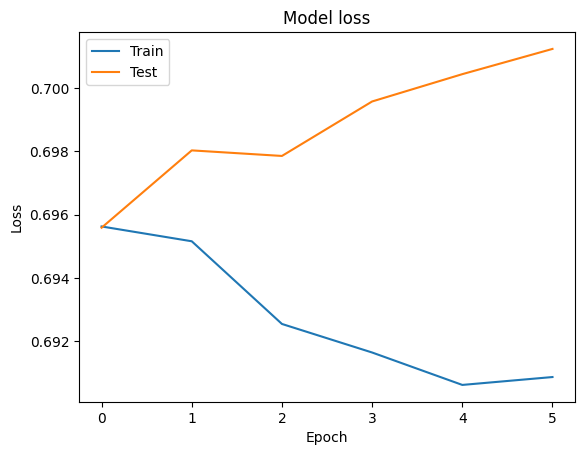

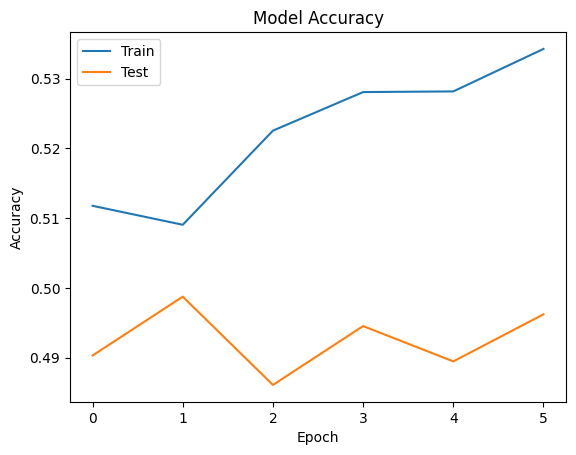

In [59]:
plot_loss_accuracy(history)

### d. Validate Model

In [60]:
model_mae = model.evaluate(X_test, y_test, verbose=0)

print(f'Model Accuracy {model_mae[1]:.4f}')

Model Accuracy 0.4946


## 4 Optimising Basic Model

### a. LSTM

In [72]:
%time

# Model hyperparameters
num_layers = [1, 2, 3] # 2, 2, 2, 2
layer_sizes = [50, 60, 70, 80] # 50, 60, 80, 70
batch_sizes = [64, 128] # 128, 64, 64, 128
learning_rates = [0.1, 1.0, 2.0] # 0.1, 1, 2, 0.1
epochs = [50, 60, 70, 80] # 50, 60, 50, 80
activ_func = 'relu'

best_model = None
best_performance = 0.0
best_weights = 0.0
best_hyperparameters = {}
count = 0

# Iterate over hyperparameter combinations
for num_layer in num_layers:
    for layer_size in layer_sizes:
        for batch_size in batch_sizes:
            for learning_rate in learning_rates:
                for epoch in epochs:
                    count += 1
                    # Build the LSTM model
                    model = Sequential()
                    
                    # Add the specified number of LSTM layers
                    for _ in range(num_layer):
                        model.add(LSTM(layer_size, activation=activ_func, input_shape=(5, 23), return_sequences=True))
                    
                    # Flatten if there are multiple LSTM layers
                    if num_layer > 1:
                        model.add(Flatten())
                    
                    # Output layer
                    model.add(Dense(1, activation='sigmoid'))
                    
                    # Compile the model
                    optimizer = Adam(learning_rate=learning_rate)
                    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
                    
                    # Print model summary
                    print(model.summary())
                    
                    # Train the model
                    es = EarlyStopping(patience=5, restore_best_weights=True)
                    history = model.fit(X_train, y_train, epochs=epoch, batch_size=batch_size, validation_split=0.2, callbacks=[es], verbose=2)
                    
                    val_performance = history.history['val_accuracy'][-1]
                    
                    # Check if this configuration is the best so far
                    if val_performance > best_performance:
                        best_performance = val_performance
                        best_model = model
                        best_hyperparameters = {
                            'num_layer': num_layer,
                            'layer_size': layer_size,
                            'batch_size': batch_size,
                            'learning_rate': learning_rate,
                            'epochs': epoch
                        }

CPU times: user 1e+03 ns, sys: 2 µs, total: 3 µs
Wall time: 6.2 µs
Model: "sequential_801"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1857 (LSTM)            (None, 5, 50)             14800     
                                                                 
 dense_801 (Dense)           (None, 5, 1)              51        
                                                                 
Total params: 14851 (58.01 KB)
Trainable params: 14851 (58.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
30/30 - 1s - loss: 0.8976 - accuracy: 0.4681 - val_loss: 0.9722 - val_accuracy: 0.5017 - 626ms/epoch - 21ms/step
Epoch 2/50
30/30 - 0s - loss: 0.7029 - accuracy: 0.5103 - val_loss: 0.8086 - val_accuracy: 0.5093 - 64ms/epoch - 2ms/step
Epoch 3/50
30/30 - 0s - loss: 0.6991 - accuracy: 0.5174 - val_loss: 0.7050 - val_accuracy: 0.4

Model: "sequential_802"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1858 (LSTM)            (None, 5, 50)             14800     
                                                                 
 dense_802 (Dense)           (None, 5, 1)              51        
                                                                 
Total params: 14851 (58.01 KB)
Trainable params: 14851 (58.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/60
30/30 - 1s - loss: 0.9538 - accuracy: 0.4979 - val_loss: 0.7162 - val_accuracy: 0.5080 - 610ms/epoch - 20ms/step
Epoch 2/60
30/30 - 0s - loss: 0.6964 - accuracy: 0.5053 - val_loss: 0.7351 - val_accuracy: 0.5013 - 68ms/epoch - 2ms/step
Epoch 3/60
30/30 - 0s - loss: 0.7006 - accuracy: 0.5178 - val_loss: 0.7342 - val_accuracy: 0.4970 - 65ms/epoch - 2ms/step
Epoch 4/60
30/30 - 0s - loss: 0.6925 - 

Model: "sequential_803"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1859 (LSTM)            (None, 5, 50)             14800     
                                                                 
 dense_803 (Dense)           (None, 5, 1)              51        
                                                                 
Total params: 14851 (58.01 KB)
Trainable params: 14851 (58.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/70
30/30 - 1s - loss: 0.8354 - accuracy: 0.5061 - val_loss: 0.7151 - val_accuracy: 0.4679 - 637ms/epoch - 21ms/step
Epoch 2/70
30/30 - 0s - loss: 0.6963 - accuracy: 0.5096 - val_loss: 0.7577 - val_accuracy: 0.4962 - 62ms/epoch - 2ms/step
Epoch 3/70
30/30 - 0s - loss: 0.6991 - accuracy: 0.5157 - val_loss: 0.7916 - val_accuracy: 0.4624 - 64ms/epoch - 2ms/step
Epoch 4/70
30/30 - 0s - loss: 0.6951 - 

Model: "sequential_804"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1860 (LSTM)            (None, 5, 50)             14800     
                                                                 
 dense_804 (Dense)           (None, 5, 1)              51        
                                                                 
Total params: 14851 (58.01 KB)
Trainable params: 14851 (58.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/80
30/30 - 1s - loss: 0.8789 - accuracy: 0.4997 - val_loss: 0.7701 - val_accuracy: 0.4709 - 640ms/epoch - 21ms/step
Epoch 2/80
30/30 - 0s - loss: 0.7158 - accuracy: 0.4915 - val_loss: 0.7521 - val_accuracy: 0.4633 - 65ms/epoch - 2ms/step
Epoch 3/80
30/30 - 0s - loss: 0.6982 - accuracy: 0.5043 - val_loss: 0.7372 - val_accuracy: 0.4675 - 62ms/epoch - 2ms/step
Epoch 4/80
30/30 - 0s - loss: 0.6948 - 

Model: "sequential_805"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1861 (LSTM)            (None, 5, 50)             14800     
                                                                 
 dense_805 (Dense)           (None, 5, 1)              51        
                                                                 
Total params: 14851 (58.01 KB)
Trainable params: 14851 (58.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
30/30 - 1s - loss: 7.4777 - accuracy: 0.4942 - val_loss: 7.2815 - val_accuracy: 0.5236 - 599ms/epoch - 20ms/step
Epoch 2/50
30/30 - 0s - loss: 7.7162 - accuracy: 0.4954 - val_loss: 7.4352 - val_accuracy: 0.5148 - 63ms/epoch - 2ms/step
Epoch 3/50
30/30 - 0s - loss: 7.6906 - accuracy: 0.4993 - val_loss: 7.9699 - val_accuracy: 0.4814 - 64ms/epoch - 2ms/step
Epoch 4/50
30/30 - 0s - loss: 7.7115 - 

Model: "sequential_806"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1862 (LSTM)            (None, 5, 50)             14800     
                                                                 
 dense_806 (Dense)           (None, 5, 1)              51        
                                                                 
Total params: 14851 (58.01 KB)
Trainable params: 14851 (58.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/60
30/30 - 1s - loss: 7.4182 - accuracy: 0.5052 - val_loss: 8.2657 - val_accuracy: 0.4641 - 604ms/epoch - 20ms/step
Epoch 2/60
30/30 - 0s - loss: 7.6148 - accuracy: 0.5063 - val_loss: 8.2657 - val_accuracy: 0.4641 - 64ms/epoch - 2ms/step
Epoch 3/60
30/30 - 0s - loss: 7.6148 - accuracy: 0.5063 - val_loss: 8.2657 - val_accuracy: 0.4641 - 62ms/epoch - 2ms/step
Epoch 4/60
30/30 - 0s - loss: 7.6148 - 

Model: "sequential_807"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1863 (LSTM)            (None, 5, 50)             14800     
                                                                 
 dense_807 (Dense)           (None, 5, 1)              51        
                                                                 
Total params: 14851 (58.01 KB)
Trainable params: 14851 (58.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/70
30/30 - 1s - loss: 7.2873 - accuracy: 0.5089 - val_loss: 8.1466 - val_accuracy: 0.4713 - 677ms/epoch - 23ms/step
Epoch 2/70
30/30 - 0s - loss: 7.6467 - accuracy: 0.5038 - val_loss: 8.1324 - val_accuracy: 0.4722 - 65ms/epoch - 2ms/step
Epoch 3/70
30/30 - 0s - loss: 7.6716 - accuracy: 0.5019 - val_loss: 8.0546 - val_accuracy: 0.4768 - 65ms/epoch - 2ms/step
Epoch 4/70
30/30 - 0s - loss: 7.7542 - 

Model: "sequential_808"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1864 (LSTM)            (None, 5, 50)             14800     
                                                                 
 dense_808 (Dense)           (None, 5, 1)              51        
                                                                 
Total params: 14851 (58.01 KB)
Trainable params: 14851 (58.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/80
30/30 - 1s - loss: 7.4610 - accuracy: 0.5001 - val_loss: 8.2516 - val_accuracy: 0.4646 - 655ms/epoch - 22ms/step
Epoch 2/80
30/30 - 0s - loss: 7.5938 - accuracy: 0.5073 - val_loss: 8.2386 - val_accuracy: 0.4658 - 67ms/epoch - 2ms/step
Epoch 3/80
30/30 - 0s - loss: 7.5751 - accuracy: 0.5083 - val_loss: 8.1870 - val_accuracy: 0.4692 - 66ms/epoch - 2ms/step
Epoch 4/80
30/30 - 0s - loss: 7.5891 - 

Model: "sequential_809"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1865 (LSTM)            (None, 5, 50)             14800     
                                                                 
 dense_809 (Dense)           (None, 5, 1)              51        
                                                                 
Total params: 14851 (58.01 KB)
Trainable params: 14851 (58.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
30/30 - 1s - loss: 7.4025 - accuracy: 0.5047 - val_loss: 8.2657 - val_accuracy: 0.4641 - 610ms/epoch - 20ms/step
Epoch 2/50
30/30 - 0s - loss: 7.6148 - accuracy: 0.5063 - val_loss: 8.2657 - val_accuracy: 0.4641 - 65ms/epoch - 2ms/step
Epoch 3/50
30/30 - 0s - loss: 7.6148 - accuracy: 0.5063 - val_loss: 8.2657 - val_accuracy: 0.4641 - 63ms/epoch - 2ms/step
Epoch 4/50
30/30 - 0s - loss: 7.6148 - 

Model: "sequential_810"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1866 (LSTM)            (None, 5, 50)             14800     
                                                                 
 dense_810 (Dense)           (None, 5, 1)              51        
                                                                 
Total params: 14851 (58.01 KB)
Trainable params: 14851 (58.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/60
30/30 - 1s - loss: 7.5440 - accuracy: 0.4862 - val_loss: 7.0777 - val_accuracy: 0.5359 - 616ms/epoch - 21ms/step
Epoch 2/60
30/30 - 0s - loss: 7.7211 - accuracy: 0.4937 - val_loss: 7.0777 - val_accuracy: 0.5359 - 63ms/epoch - 2ms/step
Epoch 3/60
30/30 - 0s - loss: 7.7211 - accuracy: 0.4937 - val_loss: 7.0777 - val_accuracy: 0.5359 - 63ms/epoch - 2ms/step
Epoch 4/60
30/30 - 0s - loss: 7.7211 - 

Model: "sequential_811"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1867 (LSTM)            (None, 5, 50)             14800     
                                                                 
 dense_811 (Dense)           (None, 5, 1)              51        
                                                                 
Total params: 14851 (58.01 KB)
Trainable params: 14851 (58.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/70
30/30 - 1s - loss: 7.5276 - accuracy: 0.4907 - val_loss: 7.0777 - val_accuracy: 0.5359 - 608ms/epoch - 20ms/step
Epoch 2/70
30/30 - 0s - loss: 7.7211 - accuracy: 0.4937 - val_loss: 7.0777 - val_accuracy: 0.5359 - 65ms/epoch - 2ms/step
Epoch 3/70
30/30 - 0s - loss: 7.7211 - accuracy: 0.4937 - val_loss: 7.0777 - val_accuracy: 0.5359 - 65ms/epoch - 2ms/step
Epoch 4/70
30/30 - 0s - loss: 7.7211 - 

Model: "sequential_812"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1868 (LSTM)            (None, 5, 50)             14800     
                                                                 
 dense_812 (Dense)           (None, 5, 1)              51        
                                                                 
Total params: 14851 (58.01 KB)
Trainable params: 14851 (58.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/80
30/30 - 1s - loss: 7.5603 - accuracy: 0.4861 - val_loss: 7.0777 - val_accuracy: 0.5359 - 602ms/epoch - 20ms/step
Epoch 2/80
30/30 - 0s - loss: 7.7211 - accuracy: 0.4937 - val_loss: 7.0777 - val_accuracy: 0.5359 - 63ms/epoch - 2ms/step
Epoch 3/80
30/30 - 0s - loss: 7.7211 - accuracy: 0.4937 - val_loss: 7.0777 - val_accuracy: 0.5359 - 63ms/epoch - 2ms/step
Epoch 4/80
30/30 - 0s - loss: 7.7211 - 

Model: "sequential_813"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1869 (LSTM)            (None, 5, 50)             14800     
                                                                 
 dense_813 (Dense)           (None, 5, 1)              51        
                                                                 
Total params: 14851 (58.01 KB)
Trainable params: 14851 (58.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
15/15 - 1s - loss: 1.1050 - accuracy: 0.5061 - val_loss: 0.8058 - val_accuracy: 0.4662 - 561ms/epoch - 37ms/step
Epoch 2/50
15/15 - 0s - loss: 0.7163 - accuracy: 0.4889 - val_loss: 0.7418 - val_accuracy: 0.4700 - 50ms/epoch - 3ms/step
Epoch 3/50
15/15 - 0s - loss: 0.7070 - accuracy: 0.5172 - val_loss: 0.7729 - val_accuracy: 0.5059 - 53ms/epoch - 4ms/step
Epoch 4/50
15/15 - 0s - loss: 0.7039 - 

Model: "sequential_814"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1870 (LSTM)            (None, 5, 50)             14800     
                                                                 
 dense_814 (Dense)           (None, 5, 1)              51        
                                                                 
Total params: 14851 (58.01 KB)
Trainable params: 14851 (58.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/60
15/15 - 1s - loss: 0.9460 - accuracy: 0.5053 - val_loss: 0.7999 - val_accuracy: 0.4776 - 571ms/epoch - 38ms/step
Epoch 2/60
15/15 - 0s - loss: 0.7205 - accuracy: 0.4974 - val_loss: 0.8287 - val_accuracy: 0.5068 - 50ms/epoch - 3ms/step
Epoch 3/60
15/15 - 0s - loss: 0.7182 - accuracy: 0.5134 - val_loss: 0.7169 - val_accuracy: 0.5030 - 50ms/epoch - 3ms/step
Epoch 4/60
15/15 - 0s - loss: 0.6947 - 

Model: "sequential_815"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1871 (LSTM)            (None, 5, 50)             14800     
                                                                 
 dense_815 (Dense)           (None, 5, 1)              51        
                                                                 
Total params: 14851 (58.01 KB)
Trainable params: 14851 (58.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/70
15/15 - 1s - loss: 1.0433 - accuracy: 0.4991 - val_loss: 0.8283 - val_accuracy: 0.4949 - 557ms/epoch - 37ms/step
Epoch 2/70
15/15 - 0s - loss: 0.7083 - accuracy: 0.5062 - val_loss: 0.7753 - val_accuracy: 0.4608 - 49ms/epoch - 3ms/step
Epoch 3/70
15/15 - 0s - loss: 0.7071 - accuracy: 0.5124 - val_loss: 0.8283 - val_accuracy: 0.4684 - 50ms/epoch - 3ms/step
Epoch 4/70
15/15 - 0s - loss: 0.6940 - 

Model: "sequential_816"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1872 (LSTM)            (None, 5, 50)             14800     
                                                                 
 dense_816 (Dense)           (None, 5, 1)              51        
                                                                 
Total params: 14851 (58.01 KB)
Trainable params: 14851 (58.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/80
15/15 - 1s - loss: 1.0456 - accuracy: 0.4807 - val_loss: 0.8478 - val_accuracy: 0.4949 - 557ms/epoch - 37ms/step
Epoch 2/80
15/15 - 0s - loss: 0.7171 - accuracy: 0.5046 - val_loss: 0.7558 - val_accuracy: 0.4823 - 49ms/epoch - 3ms/step
Epoch 3/80
15/15 - 0s - loss: 0.7228 - accuracy: 0.5049 - val_loss: 0.7088 - val_accuracy: 0.5198 - 47ms/epoch - 3ms/step
Epoch 4/80
15/15 - 0s - loss: 0.6994 - 

Model: "sequential_817"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1873 (LSTM)            (None, 5, 50)             14800     
                                                                 
 dense_817 (Dense)           (None, 5, 1)              51        
                                                                 
Total params: 14851 (58.01 KB)
Trainable params: 14851 (58.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
15/15 - 1s - loss: 7.2528 - accuracy: 0.4940 - val_loss: 7.1152 - val_accuracy: 0.5338 - 569ms/epoch - 38ms/step
Epoch 2/50
15/15 - 0s - loss: 7.7143 - accuracy: 0.4940 - val_loss: 7.0742 - val_accuracy: 0.5363 - 49ms/epoch - 3ms/step
Epoch 3/50
15/15 - 0s - loss: 7.7100 - accuracy: 0.4944 - val_loss: 7.0803 - val_accuracy: 0.5359 - 45ms/epoch - 3ms/step
Epoch 4/50
15/15 - 0s - loss: 7.7116 - 

Model: "sequential_818"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1874 (LSTM)            (None, 5, 50)             14800     
                                                                 
 dense_818 (Dense)           (None, 5, 1)              51        
                                                                 
Total params: 14851 (58.01 KB)
Trainable params: 14851 (58.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/60
15/15 - 1s - loss: 7.2626 - accuracy: 0.4905 - val_loss: 8.2485 - val_accuracy: 0.4646 - 570ms/epoch - 38ms/step
Epoch 2/60
15/15 - 0s - loss: 7.5831 - accuracy: 0.5081 - val_loss: 8.2459 - val_accuracy: 0.4654 - 51ms/epoch - 3ms/step
Epoch 3/60
15/15 - 0s - loss: 7.5925 - accuracy: 0.5076 - val_loss: 8.2719 - val_accuracy: 0.4637 - 50ms/epoch - 3ms/step
Epoch 4/60
15/15 - 0s - loss: 7.5890 - 

Model: "sequential_819"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1875 (LSTM)            (None, 5, 50)             14800     
                                                                 
 dense_819 (Dense)           (None, 5, 1)              51        
                                                                 
Total params: 14851 (58.01 KB)
Trainable params: 14851 (58.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/70
15/15 - 1s - loss: 7.1800 - accuracy: 0.5028 - val_loss: 8.2769 - val_accuracy: 0.4629 - 565ms/epoch - 38ms/step
Epoch 2/70
15/15 - 0s - loss: 7.6182 - accuracy: 0.5058 - val_loss: 8.2655 - val_accuracy: 0.4641 - 49ms/epoch - 3ms/step
Epoch 3/70
15/15 - 0s - loss: 7.6053 - accuracy: 0.5069 - val_loss: 8.2786 - val_accuracy: 0.4633 - 49ms/epoch - 3ms/step
Epoch 4/70
15/15 - 0s - loss: 7.6016 - 

Model: "sequential_820"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1876 (LSTM)            (None, 5, 50)             14800     
                                                                 
 dense_820 (Dense)           (None, 5, 1)              51        
                                                                 
Total params: 14851 (58.01 KB)
Trainable params: 14851 (58.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/80
15/15 - 1s - loss: 7.2006 - accuracy: 0.4949 - val_loss: 7.0874 - val_accuracy: 0.5350 - 561ms/epoch - 37ms/step
Epoch 2/80
15/15 - 0s - loss: 7.7282 - accuracy: 0.4932 - val_loss: 7.1224 - val_accuracy: 0.5329 - 51ms/epoch - 3ms/step
Epoch 3/80
15/15 - 0s - loss: 7.7255 - accuracy: 0.4934 - val_loss: 7.0713 - val_accuracy: 0.5363 - 52ms/epoch - 3ms/step
Epoch 4/80
15/15 - 0s - loss: 7.7294 - 

Model: "sequential_821"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1877 (LSTM)            (None, 5, 50)             14800     
                                                                 
 dense_821 (Dense)           (None, 5, 1)              51        
                                                                 
Total params: 14851 (58.01 KB)
Trainable params: 14851 (58.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
15/15 - 1s - loss: 7.1654 - accuracy: 0.4980 - val_loss: 7.0909 - val_accuracy: 0.5350 - 570ms/epoch - 38ms/step
Epoch 2/50
15/15 - 0s - loss: 7.7181 - accuracy: 0.4939 - val_loss: 7.0586 - val_accuracy: 0.5371 - 50ms/epoch - 3ms/step
Epoch 3/50
15/15 - 0s - loss: 7.7197 - accuracy: 0.4938 - val_loss: 7.0651 - val_accuracy: 0.5367 - 49ms/epoch - 3ms/step
Epoch 4/50
15/15 - 0s - loss: 7.7214 - 

Model: "sequential_822"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1878 (LSTM)            (None, 5, 50)             14800     
                                                                 
 dense_822 (Dense)           (None, 5, 1)              51        
                                                                 
Total params: 14851 (58.01 KB)
Trainable params: 14851 (58.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/60
15/15 - 1s - loss: 7.1914 - accuracy: 0.5009 - val_loss: 7.0674 - val_accuracy: 0.5367 - 567ms/epoch - 38ms/step
Epoch 2/60
15/15 - 0s - loss: 7.6939 - accuracy: 0.4957 - val_loss: 7.1015 - val_accuracy: 0.5346 - 49ms/epoch - 3ms/step
Epoch 3/60
15/15 - 0s - loss: 7.7025 - accuracy: 0.4950 - val_loss: 7.1003 - val_accuracy: 0.5346 - 48ms/epoch - 3ms/step
Epoch 4/60
15/15 - 0s - loss: 7.7067 - 

Model: "sequential_823"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1879 (LSTM)            (None, 5, 50)             14800     
                                                                 
 dense_823 (Dense)           (None, 5, 1)              51        
                                                                 
Total params: 14851 (58.01 KB)
Trainable params: 14851 (58.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/70
15/15 - 1s - loss: 7.1898 - accuracy: 0.5040 - val_loss: 8.2657 - val_accuracy: 0.4641 - 567ms/epoch - 38ms/step
Epoch 2/70
15/15 - 0s - loss: 7.6148 - accuracy: 0.5063 - val_loss: 8.2657 - val_accuracy: 0.4641 - 51ms/epoch - 3ms/step
Epoch 3/70
15/15 - 0s - loss: 7.6148 - accuracy: 0.5063 - val_loss: 8.2657 - val_accuracy: 0.4641 - 49ms/epoch - 3ms/step
Epoch 4/70
15/15 - 0s - loss: 7.6148 - 

Model: "sequential_824"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1880 (LSTM)            (None, 5, 50)             14800     
                                                                 
 dense_824 (Dense)           (None, 5, 1)              51        
                                                                 
Total params: 14851 (58.01 KB)
Trainable params: 14851 (58.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/80
15/15 - 1s - loss: 7.2129 - accuracy: 0.5075 - val_loss: 8.2193 - val_accuracy: 0.4671 - 555ms/epoch - 37ms/step
Epoch 2/80
15/15 - 0s - loss: 7.6219 - accuracy: 0.5055 - val_loss: 8.2194 - val_accuracy: 0.4671 - 50ms/epoch - 3ms/step
Epoch 3/80
15/15 - 0s - loss: 7.6109 - accuracy: 0.5062 - val_loss: 8.2323 - val_accuracy: 0.4662 - 51ms/epoch - 3ms/step
Epoch 4/80
15/15 - 0s - loss: 7.6199 - 

Model: "sequential_825"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1881 (LSTM)            (None, 5, 60)             20160     
                                                                 
 dense_825 (Dense)           (None, 5, 1)              61        
                                                                 
Total params: 20221 (78.99 KB)
Trainable params: 20221 (78.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
30/30 - 1s - loss: 0.9585 - accuracy: 0.5078 - val_loss: 0.7512 - val_accuracy: 0.4692 - 600ms/epoch - 20ms/step
Epoch 2/50
30/30 - 0s - loss: 0.7078 - accuracy: 0.4980 - val_loss: 0.7104 - val_accuracy: 0.4932 - 75ms/epoch - 2ms/step
Epoch 3/50
30/30 - 0s - loss: 0.6984 - accuracy: 0.5040 - val_loss: 0.7067 - val_accuracy: 0.5101 - 74ms/epoch - 2ms/step
Epoch 4/50
30/30 - 0s - loss: 0.6953 - 

Model: "sequential_826"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1882 (LSTM)            (None, 5, 60)             20160     
                                                                 
 dense_826 (Dense)           (None, 5, 1)              61        
                                                                 
Total params: 20221 (78.99 KB)
Trainable params: 20221 (78.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/60
30/30 - 1s - loss: 0.9360 - accuracy: 0.5092 - val_loss: 0.8118 - val_accuracy: 0.4730 - 591ms/epoch - 20ms/step
Epoch 2/60
30/30 - 0s - loss: 0.7251 - accuracy: 0.5026 - val_loss: 0.8301 - val_accuracy: 0.4705 - 79ms/epoch - 3ms/step
Epoch 3/60
30/30 - 0s - loss: 0.7098 - accuracy: 0.5016 - val_loss: 0.7124 - val_accuracy: 0.4869 - 76ms/epoch - 3ms/step
Epoch 4/60
30/30 - 0s - loss: 0.6970 - 

Model: "sequential_827"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1883 (LSTM)            (None, 5, 60)             20160     
                                                                 
 dense_827 (Dense)           (None, 5, 1)              61        
                                                                 
Total params: 20221 (78.99 KB)
Trainable params: 20221 (78.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/70
30/30 - 1s - loss: 0.9453 - accuracy: 0.4833 - val_loss: 0.7580 - val_accuracy: 0.4814 - 585ms/epoch - 20ms/step
Epoch 2/70
30/30 - 0s - loss: 0.7117 - accuracy: 0.5017 - val_loss: 0.7757 - val_accuracy: 0.4692 - 77ms/epoch - 3ms/step
Epoch 3/70
30/30 - 0s - loss: 0.6964 - accuracy: 0.5225 - val_loss: 0.7224 - val_accuracy: 0.5224 - 73ms/epoch - 2ms/step
Epoch 4/70
30/30 - 0s - loss: 0.6905 - 

Model: "sequential_828"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1884 (LSTM)            (None, 5, 60)             20160     
                                                                 
 dense_828 (Dense)           (None, 5, 1)              61        
                                                                 
Total params: 20221 (78.99 KB)
Trainable params: 20221 (78.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/80
30/30 - 1s - loss: 0.9427 - accuracy: 0.5070 - val_loss: 0.7857 - val_accuracy: 0.4924 - 601ms/epoch - 20ms/step
Epoch 2/80
30/30 - 0s - loss: 0.7115 - accuracy: 0.4968 - val_loss: 0.7400 - val_accuracy: 0.4806 - 77ms/epoch - 3ms/step
Epoch 3/80
30/30 - 0s - loss: 0.6979 - accuracy: 0.5131 - val_loss: 0.8854 - val_accuracy: 0.4717 - 76ms/epoch - 3ms/step
Epoch 4/80
30/30 - 0s - loss: 0.6969 - 

Model: "sequential_829"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1885 (LSTM)            (None, 5, 60)             20160     
                                                                 
 dense_829 (Dense)           (None, 5, 1)              61        
                                                                 
Total params: 20221 (78.99 KB)
Trainable params: 20221 (78.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
30/30 - 1s - loss: 7.4567 - accuracy: 0.4991 - val_loss: 8.1373 - val_accuracy: 0.4717 - 588ms/epoch - 20ms/step
Epoch 2/50
30/30 - 0s - loss: 7.6262 - accuracy: 0.5054 - val_loss: 8.1791 - val_accuracy: 0.4688 - 77ms/epoch - 3ms/step
Epoch 3/50
30/30 - 0s - loss: 7.6855 - accuracy: 0.5004 - val_loss: 7.7939 - val_accuracy: 0.4928 - 79ms/epoch - 3ms/step
Epoch 4/50
30/30 - 0s - loss: 7.6755 - 

Model: "sequential_830"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1886 (LSTM)            (None, 5, 60)             20160     
                                                                 
 dense_830 (Dense)           (None, 5, 1)              61        
                                                                 
Total params: 20221 (78.99 KB)
Trainable params: 20221 (78.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/60
30/30 - 1s - loss: 7.3525 - accuracy: 0.5066 - val_loss: 8.2016 - val_accuracy: 0.4679 - 579ms/epoch - 19ms/step
Epoch 2/60
30/30 - 0s - loss: 7.6158 - accuracy: 0.5060 - val_loss: 8.2629 - val_accuracy: 0.4641 - 76ms/epoch - 3ms/step
Epoch 3/60
30/30 - 0s - loss: 7.6071 - accuracy: 0.5068 - val_loss: 8.2656 - val_accuracy: 0.4641 - 74ms/epoch - 2ms/step
Epoch 4/60
30/30 - 0s - loss: 7.6115 - 

Model: "sequential_831"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1887 (LSTM)            (None, 5, 60)             20160     
                                                                 
 dense_831 (Dense)           (None, 5, 1)              61        
                                                                 
Total params: 20221 (78.99 KB)
Trainable params: 20221 (78.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/70
30/30 - 1s - loss: 7.4182 - accuracy: 0.5065 - val_loss: 8.2657 - val_accuracy: 0.4641 - 586ms/epoch - 20ms/step
Epoch 2/70
30/30 - 0s - loss: 7.6148 - accuracy: 0.5063 - val_loss: 8.2657 - val_accuracy: 0.4641 - 74ms/epoch - 2ms/step
Epoch 3/70
30/30 - 0s - loss: 7.6148 - accuracy: 0.5063 - val_loss: 8.2657 - val_accuracy: 0.4641 - 75ms/epoch - 3ms/step
Epoch 4/70
30/30 - 0s - loss: 7.6148 - 

Model: "sequential_832"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1888 (LSTM)            (None, 5, 60)             20160     
                                                                 
 dense_832 (Dense)           (None, 5, 1)              61        
                                                                 
Total params: 20221 (78.99 KB)
Trainable params: 20221 (78.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/80
30/30 - 1s - loss: 7.4353 - accuracy: 0.5007 - val_loss: 8.2657 - val_accuracy: 0.4641 - 599ms/epoch - 20ms/step
Epoch 2/80
30/30 - 0s - loss: 7.6148 - accuracy: 0.5063 - val_loss: 8.2657 - val_accuracy: 0.4641 - 75ms/epoch - 2ms/step
Epoch 3/80
30/30 - 0s - loss: 7.6148 - accuracy: 0.5063 - val_loss: 8.2657 - val_accuracy: 0.4641 - 74ms/epoch - 2ms/step
Epoch 4/80
30/30 - 0s - loss: 7.6148 - 

Model: "sequential_833"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1889 (LSTM)            (None, 5, 60)             20160     
                                                                 
 dense_833 (Dense)           (None, 5, 1)              61        
                                                                 
Total params: 20221 (78.99 KB)
Trainable params: 20221 (78.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
30/30 - 1s - loss: 7.4861 - accuracy: 0.4937 - val_loss: 7.3439 - val_accuracy: 0.5194 - 596ms/epoch - 20ms/step
Epoch 2/50
30/30 - 0s - loss: 7.5859 - accuracy: 0.5050 - val_loss: 7.2149 - val_accuracy: 0.5274 - 77ms/epoch - 3ms/step
Epoch 3/50
30/30 - 0s - loss: 7.7187 - accuracy: 0.4945 - val_loss: 7.2276 - val_accuracy: 0.5266 - 76ms/epoch - 3ms/step
Epoch 4/50
30/30 - 0s - loss: 7.7290 - 

Model: "sequential_834"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1890 (LSTM)            (None, 5, 60)             20160     
                                                                 
 dense_834 (Dense)           (None, 5, 1)              61        
                                                                 
Total params: 20221 (78.99 KB)
Trainable params: 20221 (78.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/60
30/30 - 1s - loss: 7.5603 - accuracy: 0.4905 - val_loss: 7.1255 - val_accuracy: 0.5329 - 570ms/epoch - 19ms/step
Epoch 2/60
30/30 - 0s - loss: 7.7791 - accuracy: 0.4906 - val_loss: 7.4473 - val_accuracy: 0.5135 - 72ms/epoch - 2ms/step
Epoch 3/60
30/30 - 0s - loss: 7.8123 - accuracy: 0.4900 - val_loss: 7.6772 - val_accuracy: 0.5000 - 74ms/epoch - 2ms/step
Epoch 4/60
30/30 - 0s - loss: 7.6532 - 

Model: "sequential_835"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1891 (LSTM)            (None, 5, 60)             20160     
                                                                 
 dense_835 (Dense)           (None, 5, 1)              61        
                                                                 
Total params: 20221 (78.99 KB)
Trainable params: 20221 (78.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/70
30/30 - 1s - loss: 7.5145 - accuracy: 0.4924 - val_loss: 7.0588 - val_accuracy: 0.5371 - 583ms/epoch - 19ms/step
Epoch 2/70
30/30 - 0s - loss: 7.7245 - accuracy: 0.4935 - val_loss: 7.0588 - val_accuracy: 0.5371 - 76ms/epoch - 3ms/step
Epoch 3/70
30/30 - 0s - loss: 7.7245 - accuracy: 0.4935 - val_loss: 7.0588 - val_accuracy: 0.5371 - 74ms/epoch - 2ms/step
Epoch 4/70
30/30 - 0s - loss: 7.7245 - 

Model: "sequential_836"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1892 (LSTM)            (None, 5, 60)             20160     
                                                                 
 dense_836 (Dense)           (None, 5, 1)              61        
                                                                 
Total params: 20221 (78.99 KB)
Trainable params: 20221 (78.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/80
30/30 - 1s - loss: 7.4354 - accuracy: 0.5019 - val_loss: 8.2657 - val_accuracy: 0.4641 - 600ms/epoch - 20ms/step
Epoch 2/80
30/30 - 0s - loss: 7.6148 - accuracy: 0.5063 - val_loss: 8.2657 - val_accuracy: 0.4641 - 74ms/epoch - 2ms/step
Epoch 3/80
30/30 - 0s - loss: 7.6148 - accuracy: 0.5063 - val_loss: 8.2657 - val_accuracy: 0.4641 - 75ms/epoch - 2ms/step
Epoch 4/80
30/30 - 0s - loss: 7.6148 - 

Model: "sequential_837"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1893 (LSTM)            (None, 5, 60)             20160     
                                                                 
 dense_837 (Dense)           (None, 5, 1)              61        
                                                                 
Total params: 20221 (78.99 KB)
Trainable params: 20221 (78.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
15/15 - 1s - loss: 1.2852 - accuracy: 0.5074 - val_loss: 0.8477 - val_accuracy: 0.4996 - 553ms/epoch - 37ms/step
Epoch 2/50
15/15 - 0s - loss: 0.7303 - accuracy: 0.5037 - val_loss: 0.7459 - val_accuracy: 0.4916 - 53ms/epoch - 4ms/step
Epoch 3/50
15/15 - 0s - loss: 0.7034 - accuracy: 0.5005 - val_loss: 0.7242 - val_accuracy: 0.5025 - 56ms/epoch - 4ms/step
Epoch 4/50
15/15 - 0s - loss: 0.6922 - 

Model: "sequential_838"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1894 (LSTM)            (None, 5, 60)             20160     
                                                                 
 dense_838 (Dense)           (None, 5, 1)              61        
                                                                 
Total params: 20221 (78.99 KB)
Trainable params: 20221 (78.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/60
15/15 - 1s - loss: 1.2027 - accuracy: 0.4997 - val_loss: 0.7945 - val_accuracy: 0.4852 - 561ms/epoch - 37ms/step
Epoch 2/60
15/15 - 0s - loss: 0.7203 - accuracy: 0.5071 - val_loss: 0.7368 - val_accuracy: 0.5257 - 53ms/epoch - 4ms/step
Epoch 3/60
15/15 - 0s - loss: 0.7074 - accuracy: 0.4967 - val_loss: 0.7621 - val_accuracy: 0.4776 - 53ms/epoch - 4ms/step
Epoch 4/60
15/15 - 0s - loss: 0.7020 - 

Model: "sequential_839"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1895 (LSTM)            (None, 5, 60)             20160     
                                                                 
 dense_839 (Dense)           (None, 5, 1)              61        
                                                                 
Total params: 20221 (78.99 KB)
Trainable params: 20221 (78.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/70
15/15 - 1s - loss: 1.3861 - accuracy: 0.5008 - val_loss: 0.8316 - val_accuracy: 0.4823 - 555ms/epoch - 37ms/step
Epoch 2/70
15/15 - 0s - loss: 0.7391 - accuracy: 0.5026 - val_loss: 0.7382 - val_accuracy: 0.5072 - 52ms/epoch - 3ms/step
Epoch 3/70
15/15 - 0s - loss: 0.7129 - accuracy: 0.5023 - val_loss: 0.7216 - val_accuracy: 0.4852 - 54ms/epoch - 4ms/step
Epoch 4/70
15/15 - 0s - loss: 0.6979 - 

Model: "sequential_840"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1896 (LSTM)            (None, 5, 60)             20160     
                                                                 
 dense_840 (Dense)           (None, 5, 1)              61        
                                                                 
Total params: 20221 (78.99 KB)
Trainable params: 20221 (78.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/80
15/15 - 1s - loss: 1.0945 - accuracy: 0.4984 - val_loss: 0.7891 - val_accuracy: 0.4873 - 562ms/epoch - 37ms/step
Epoch 2/80
15/15 - 0s - loss: 0.7263 - accuracy: 0.5148 - val_loss: 0.7311 - val_accuracy: 0.5228 - 51ms/epoch - 3ms/step
Epoch 3/80
15/15 - 0s - loss: 0.7038 - accuracy: 0.5060 - val_loss: 0.7153 - val_accuracy: 0.4903 - 53ms/epoch - 4ms/step
Epoch 4/80
15/15 - 0s - loss: 0.6975 - 

Model: "sequential_841"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1897 (LSTM)            (None, 5, 60)             20160     
                                                                 
 dense_841 (Dense)           (None, 5, 1)              61        
                                                                 
Total params: 20221 (78.99 KB)
Trainable params: 20221 (78.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
15/15 - 1s - loss: 7.2179 - accuracy: 0.4994 - val_loss: 8.2458 - val_accuracy: 0.4650 - 584ms/epoch - 39ms/step
Epoch 2/50
15/15 - 0s - loss: 7.6121 - accuracy: 0.5063 - val_loss: 8.2309 - val_accuracy: 0.4654 - 56ms/epoch - 4ms/step
Epoch 3/50
15/15 - 0s - loss: 7.6212 - accuracy: 0.5059 - val_loss: 8.2884 - val_accuracy: 0.4620 - 56ms/epoch - 4ms/step
Epoch 4/50
15/15 - 0s - loss: 7.6156 - 

Model: "sequential_842"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1898 (LSTM)            (None, 5, 60)             20160     
                                                                 
 dense_842 (Dense)           (None, 5, 1)              61        
                                                                 
Total params: 20221 (78.99 KB)
Trainable params: 20221 (78.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/60
15/15 - 1s - loss: 7.2711 - accuracy: 0.4973 - val_loss: 7.0850 - val_accuracy: 0.5354 - 552ms/epoch - 37ms/step
Epoch 2/60
15/15 - 0s - loss: 7.7321 - accuracy: 0.4929 - val_loss: 7.0847 - val_accuracy: 0.5354 - 53ms/epoch - 4ms/step
Epoch 3/60
15/15 - 0s - loss: 7.7345 - accuracy: 0.4928 - val_loss: 7.0787 - val_accuracy: 0.5354 - 54ms/epoch - 4ms/step
Epoch 4/60
15/15 - 0s - loss: 7.7290 - 

Model: "sequential_843"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1899 (LSTM)            (None, 5, 60)             20160     
                                                                 
 dense_843 (Dense)           (None, 5, 1)              61        
                                                                 
Total params: 20221 (78.99 KB)
Trainable params: 20221 (78.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/70
15/15 - 1s - loss: 7.0022 - accuracy: 0.5136 - val_loss: 7.7879 - val_accuracy: 0.4924 - 565ms/epoch - 38ms/step
Epoch 2/70
15/15 - 0s - loss: 7.6700 - accuracy: 0.5004 - val_loss: 7.8026 - val_accuracy: 0.4920 - 54ms/epoch - 4ms/step
Epoch 3/70
15/15 - 0s - loss: 7.6580 - accuracy: 0.5019 - val_loss: 7.9912 - val_accuracy: 0.4802 - 52ms/epoch - 3ms/step
Epoch 4/70
15/15 - 0s - loss: 7.6599 - 

Model: "sequential_844"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1900 (LSTM)            (None, 5, 60)             20160     
                                                                 
 dense_844 (Dense)           (None, 5, 1)              61        
                                                                 
Total params: 20221 (78.99 KB)
Trainable params: 20221 (78.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/80
15/15 - 1s - loss: 7.1175 - accuracy: 0.5039 - val_loss: 8.1226 - val_accuracy: 0.4726 - 569ms/epoch - 38ms/step
Epoch 2/80
15/15 - 0s - loss: 7.6081 - accuracy: 0.5064 - val_loss: 8.1914 - val_accuracy: 0.4684 - 53ms/epoch - 4ms/step
Epoch 3/80
15/15 - 0s - loss: 7.6041 - accuracy: 0.5066 - val_loss: 8.2575 - val_accuracy: 0.4637 - 53ms/epoch - 4ms/step
Epoch 4/80
15/15 - 0s - loss: 7.6181 - 

Model: "sequential_845"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1901 (LSTM)            (None, 5, 60)             20160     
                                                                 
 dense_845 (Dense)           (None, 5, 1)              61        
                                                                 
Total params: 20221 (78.99 KB)
Trainable params: 20221 (78.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
15/15 - 1s - loss: 7.0487 - accuracy: 0.5104 - val_loss: 8.2657 - val_accuracy: 0.4641 - 569ms/epoch - 38ms/step
Epoch 2/50
15/15 - 0s - loss: 7.6148 - accuracy: 0.5063 - val_loss: 8.2657 - val_accuracy: 0.4641 - 54ms/epoch - 4ms/step
Epoch 3/50
15/15 - 0s - loss: 7.6148 - accuracy: 0.5063 - val_loss: 8.2657 - val_accuracy: 0.4641 - 54ms/epoch - 4ms/step
Epoch 4/50
15/15 - 0s - loss: 7.6148 - 

Model: "sequential_846"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1902 (LSTM)            (None, 5, 60)             20160     
                                                                 
 dense_846 (Dense)           (None, 5, 1)              61        
                                                                 
Total params: 20221 (78.99 KB)
Trainable params: 20221 (78.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/60
15/15 - 1s - loss: 7.1413 - accuracy: 0.5070 - val_loss: 8.2657 - val_accuracy: 0.4641 - 577ms/epoch - 38ms/step
Epoch 2/60
15/15 - 0s - loss: 7.6148 - accuracy: 0.5063 - val_loss: 8.2657 - val_accuracy: 0.4641 - 69ms/epoch - 5ms/step
Epoch 3/60
15/15 - 0s - loss: 7.6148 - accuracy: 0.5063 - val_loss: 8.2657 - val_accuracy: 0.4641 - 55ms/epoch - 4ms/step
Epoch 4/60
15/15 - 0s - loss: 7.6148 - 

Model: "sequential_847"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1903 (LSTM)            (None, 5, 60)             20160     
                                                                 
 dense_847 (Dense)           (None, 5, 1)              61        
                                                                 
Total params: 20221 (78.99 KB)
Trainable params: 20221 (78.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/70
15/15 - 1s - loss: 7.2322 - accuracy: 0.4969 - val_loss: 7.0777 - val_accuracy: 0.5359 - 574ms/epoch - 38ms/step
Epoch 2/70
15/15 - 0s - loss: 7.7136 - accuracy: 0.4942 - val_loss: 7.0777 - val_accuracy: 0.5359 - 52ms/epoch - 3ms/step
Epoch 3/70
15/15 - 0s - loss: 7.7120 - accuracy: 0.4943 - val_loss: 7.0777 - val_accuracy: 0.5359 - 51ms/epoch - 3ms/step
Epoch 4/70
15/15 - 0s - loss: 7.7120 - 

Model: "sequential_848"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1904 (LSTM)            (None, 5, 60)             20160     
                                                                 
 dense_848 (Dense)           (None, 5, 1)              61        
                                                                 
Total params: 20221 (78.99 KB)
Trainable params: 20221 (78.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/80
15/15 - 1s - loss: 7.1988 - accuracy: 0.5026 - val_loss: 8.2657 - val_accuracy: 0.4641 - 566ms/epoch - 38ms/step
Epoch 2/80
15/15 - 0s - loss: 7.6148 - accuracy: 0.5063 - val_loss: 8.2657 - val_accuracy: 0.4641 - 55ms/epoch - 4ms/step
Epoch 3/80
15/15 - 0s - loss: 7.6148 - accuracy: 0.5063 - val_loss: 8.2657 - val_accuracy: 0.4641 - 53ms/epoch - 4ms/step
Epoch 4/80
15/15 - 0s - loss: 7.6148 - 

Model: "sequential_849"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1905 (LSTM)            (None, 5, 70)             26320     
                                                                 
 dense_849 (Dense)           (None, 5, 1)              71        
                                                                 
Total params: 26391 (103.09 KB)
Trainable params: 26391 (103.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
30/30 - 1s - loss: 1.0198 - accuracy: 0.4947 - val_loss: 0.7266 - val_accuracy: 0.4911 - 605ms/epoch - 20ms/step
Epoch 2/50
30/30 - 0s - loss: 0.7204 - accuracy: 0.5038 - val_loss: 0.8405 - val_accuracy: 0.4899 - 84ms/epoch - 3ms/step
Epoch 3/50
30/30 - 0s - loss: 0.7047 - accuracy: 0.5118 - val_loss: 0.7491 - val_accuracy: 0.4899 - 83ms/epoch - 3ms/step
Epoch 4/50
30/30 - 0s - loss: 0.6946 

Model: "sequential_850"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1906 (LSTM)            (None, 5, 70)             26320     
                                                                 
 dense_850 (Dense)           (None, 5, 1)              71        
                                                                 
Total params: 26391 (103.09 KB)
Trainable params: 26391 (103.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/60
30/30 - 1s - loss: 1.0942 - accuracy: 0.4892 - val_loss: 0.8134 - val_accuracy: 0.4869 - 585ms/epoch - 20ms/step
Epoch 2/60
30/30 - 0s - loss: 0.7305 - accuracy: 0.4777 - val_loss: 0.9711 - val_accuracy: 0.4920 - 82ms/epoch - 3ms/step
Epoch 3/60
30/30 - 0s - loss: 0.7037 - accuracy: 0.5055 - val_loss: 0.8434 - val_accuracy: 0.4633 - 80ms/epoch - 3ms/step
Epoch 4/60
30/30 - 0s - loss: 0.7030 

Model: "sequential_851"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1907 (LSTM)            (None, 5, 70)             26320     
                                                                 
 dense_851 (Dense)           (None, 5, 1)              71        
                                                                 
Total params: 26391 (103.09 KB)
Trainable params: 26391 (103.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/70
30/30 - 1s - loss: 1.0597 - accuracy: 0.4959 - val_loss: 0.9318 - val_accuracy: 0.4755 - 589ms/epoch - 20ms/step
Epoch 2/70
30/30 - 0s - loss: 0.7134 - accuracy: 0.5062 - val_loss: 0.7716 - val_accuracy: 0.4937 - 83ms/epoch - 3ms/step
Epoch 3/70
30/30 - 0s - loss: 0.6989 - accuracy: 0.5229 - val_loss: 0.7914 - val_accuracy: 0.4996 - 81ms/epoch - 3ms/step
Epoch 4/70
30/30 - 0s - loss: 0.6939 

Model: "sequential_852"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1908 (LSTM)            (None, 5, 70)             26320     
                                                                 
 dense_852 (Dense)           (None, 5, 1)              71        
                                                                 
Total params: 26391 (103.09 KB)
Trainable params: 26391 (103.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/80
30/30 - 1s - loss: 0.9768 - accuracy: 0.4962 - val_loss: 0.7408 - val_accuracy: 0.5274 - 605ms/epoch - 20ms/step
Epoch 2/80
30/30 - 0s - loss: 0.7066 - accuracy: 0.5124 - val_loss: 0.6991 - val_accuracy: 0.5114 - 84ms/epoch - 3ms/step
Epoch 3/80
30/30 - 0s - loss: 0.7081 - accuracy: 0.4981 - val_loss: 0.7510 - val_accuracy: 0.4675 - 77ms/epoch - 3ms/step
Epoch 4/80
30/30 - 0s - loss: 0.6985 

Model: "sequential_853"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1909 (LSTM)            (None, 5, 70)             26320     
                                                                 
 dense_853 (Dense)           (None, 5, 1)              71        
                                                                 
Total params: 26391 (103.09 KB)
Trainable params: 26391 (103.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
30/30 - 1s - loss: 7.3849 - accuracy: 0.5052 - val_loss: 8.0339 - val_accuracy: 0.4785 - 590ms/epoch - 20ms/step
Epoch 2/50
30/30 - 0s - loss: 7.6076 - accuracy: 0.5054 - val_loss: 8.0833 - val_accuracy: 0.4751 - 84ms/epoch - 3ms/step
Epoch 3/50
30/30 - 0s - loss: 7.6040 - accuracy: 0.5058 - val_loss: 8.1142 - val_accuracy: 0.4734 - 84ms/epoch - 3ms/step
Epoch 4/50
30/30 - 0s - loss: 7.5902 

Model: "sequential_854"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1910 (LSTM)            (None, 5, 70)             26320     
                                                                 
 dense_854 (Dense)           (None, 5, 1)              71        
                                                                 
Total params: 26391 (103.09 KB)
Trainable params: 26391 (103.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/60
30/30 - 1s - loss: 7.4717 - accuracy: 0.4964 - val_loss: 7.0842 - val_accuracy: 0.5354 - 599ms/epoch - 20ms/step
Epoch 2/60
30/30 - 0s - loss: 7.7211 - accuracy: 0.4937 - val_loss: 7.0842 - val_accuracy: 0.5354 - 82ms/epoch - 3ms/step
Epoch 3/60
30/30 - 0s - loss: 7.7211 - accuracy: 0.4937 - val_loss: 7.0842 - val_accuracy: 0.5354 - 83ms/epoch - 3ms/step
Epoch 4/60
30/30 - 0s - loss: 7.7211 

Model: "sequential_855"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1911 (LSTM)            (None, 5, 70)             26320     
                                                                 
 dense_855 (Dense)           (None, 5, 1)              71        
                                                                 
Total params: 26391 (103.09 KB)
Trainable params: 26391 (103.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/70
30/30 - 1s - loss: 7.4028 - accuracy: 0.5043 - val_loss: 8.2657 - val_accuracy: 0.4641 - 581ms/epoch - 19ms/step
Epoch 2/70
30/30 - 0s - loss: 7.6148 - accuracy: 0.5063 - val_loss: 8.2657 - val_accuracy: 0.4641 - 82ms/epoch - 3ms/step
Epoch 3/70
30/30 - 0s - loss: 7.6148 - accuracy: 0.5063 - val_loss: 8.2657 - val_accuracy: 0.4641 - 83ms/epoch - 3ms/step
Epoch 4/70
30/30 - 0s - loss: 7.6148 

Model: "sequential_856"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1912 (LSTM)            (None, 5, 70)             26320     
                                                                 
 dense_856 (Dense)           (None, 5, 1)              71        
                                                                 
Total params: 26391 (103.09 KB)
Trainable params: 26391 (103.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/80
30/30 - 1s - loss: 7.4349 - accuracy: 0.5039 - val_loss: 8.2657 - val_accuracy: 0.4641 - 591ms/epoch - 20ms/step
Epoch 2/80
30/30 - 0s - loss: 7.6148 - accuracy: 0.5063 - val_loss: 8.2657 - val_accuracy: 0.4641 - 85ms/epoch - 3ms/step
Epoch 3/80
30/30 - 0s - loss: 7.6148 - accuracy: 0.5063 - val_loss: 8.2657 - val_accuracy: 0.4641 - 81ms/epoch - 3ms/step
Epoch 4/80
30/30 - 0s - loss: 7.6148 

Model: "sequential_857"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1913 (LSTM)            (None, 5, 70)             26320     
                                                                 
 dense_857 (Dense)           (None, 5, 1)              71        
                                                                 
Total params: 26391 (103.09 KB)
Trainable params: 26391 (103.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
30/30 - 1s - loss: 7.4516 - accuracy: 0.4988 - val_loss: 8.2657 - val_accuracy: 0.4641 - 603ms/epoch - 20ms/step
Epoch 2/50
30/30 - 0s - loss: 7.6148 - accuracy: 0.5063 - val_loss: 8.2657 - val_accuracy: 0.4641 - 85ms/epoch - 3ms/step
Epoch 3/50
30/30 - 0s - loss: 7.6148 - accuracy: 0.5063 - val_loss: 8.2657 - val_accuracy: 0.4641 - 73ms/epoch - 2ms/step
Epoch 4/50
30/30 - 0s - loss: 7.6148 

Model: "sequential_858"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1914 (LSTM)            (None, 5, 70)             26320     
                                                                 
 dense_858 (Dense)           (None, 5, 1)              71        
                                                                 
Total params: 26391 (103.09 KB)
Trainable params: 26391 (103.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/60
30/30 - 1s - loss: 7.4105 - accuracy: 0.5042 - val_loss: 8.2657 - val_accuracy: 0.4641 - 605ms/epoch - 20ms/step
Epoch 2/60
30/30 - 0s - loss: 7.6148 - accuracy: 0.5063 - val_loss: 8.2657 - val_accuracy: 0.4641 - 83ms/epoch - 3ms/step
Epoch 3/60
30/30 - 0s - loss: 7.6148 - accuracy: 0.5063 - val_loss: 8.2657 - val_accuracy: 0.4641 - 83ms/epoch - 3ms/step
Epoch 4/60
30/30 - 0s - loss: 7.6148 

Model: "sequential_859"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1915 (LSTM)            (None, 5, 70)             26320     
                                                                 
 dense_859 (Dense)           (None, 5, 1)              71        
                                                                 
Total params: 26391 (103.09 KB)
Trainable params: 26391 (103.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/70
30/30 - 1s - loss: 7.4147 - accuracy: 0.5026 - val_loss: 8.2683 - val_accuracy: 0.4633 - 592ms/epoch - 20ms/step
Epoch 2/70
30/30 - 0s - loss: 7.6437 - accuracy: 0.5042 - val_loss: 8.2434 - val_accuracy: 0.4650 - 83ms/epoch - 3ms/step
Epoch 3/70
30/30 - 0s - loss: 7.6390 - accuracy: 0.5045 - val_loss: 8.2500 - val_accuracy: 0.4646 - 84ms/epoch - 3ms/step
Epoch 4/70
30/30 - 0s - loss: 7.6390 

Model: "sequential_860"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1916 (LSTM)            (None, 5, 70)             26320     
                                                                 
 dense_860 (Dense)           (None, 5, 1)              71        
                                                                 
Total params: 26391 (103.09 KB)
Trainable params: 26391 (103.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/80
30/30 - 1s - loss: 7.4008 - accuracy: 0.5057 - val_loss: 8.2657 - val_accuracy: 0.4641 - 591ms/epoch - 20ms/step
Epoch 2/80
30/30 - 0s - loss: 7.6132 - accuracy: 0.5064 - val_loss: 8.2657 - val_accuracy: 0.4641 - 84ms/epoch - 3ms/step
Epoch 3/80
30/30 - 0s - loss: 7.6132 - accuracy: 0.5064 - val_loss: 8.2657 - val_accuracy: 0.4641 - 83ms/epoch - 3ms/step
Epoch 4/80
30/30 - 0s - loss: 7.6132 

Model: "sequential_861"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1917 (LSTM)            (None, 5, 70)             26320     
                                                                 
 dense_861 (Dense)           (None, 5, 1)              71        
                                                                 
Total params: 26391 (103.09 KB)
Trainable params: 26391 (103.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
15/15 - 1s - loss: 1.1856 - accuracy: 0.5040 - val_loss: 0.8293 - val_accuracy: 0.4996 - 574ms/epoch - 38ms/step
Epoch 2/50
15/15 - 0s - loss: 0.7495 - accuracy: 0.5015 - val_loss: 0.7825 - val_accuracy: 0.4920 - 63ms/epoch - 4ms/step
Epoch 3/50
15/15 - 0s - loss: 0.7034 - accuracy: 0.5141 - val_loss: 0.7101 - val_accuracy: 0.4819 - 61ms/epoch - 4ms/step
Epoch 4/50
15/15 - 0s - loss: 0.7001 

Model: "sequential_862"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1918 (LSTM)            (None, 5, 70)             26320     
                                                                 
 dense_862 (Dense)           (None, 5, 1)              71        
                                                                 
Total params: 26391 (103.09 KB)
Trainable params: 26391 (103.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/60
15/15 - 1s - loss: 1.1489 - accuracy: 0.5083 - val_loss: 0.8001 - val_accuracy: 0.4705 - 561ms/epoch - 37ms/step
Epoch 2/60
15/15 - 0s - loss: 0.7151 - accuracy: 0.5091 - val_loss: 0.7478 - val_accuracy: 0.5042 - 61ms/epoch - 4ms/step
Epoch 3/60
15/15 - 0s - loss: 0.7060 - accuracy: 0.5088 - val_loss: 0.7880 - val_accuracy: 0.4823 - 63ms/epoch - 4ms/step
Epoch 4/60
15/15 - 0s - loss: 0.6974 

Model: "sequential_863"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1919 (LSTM)            (None, 5, 70)             26320     
                                                                 
 dense_863 (Dense)           (None, 5, 1)              71        
                                                                 
Total params: 26391 (103.09 KB)
Trainable params: 26391 (103.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/70
15/15 - 1s - loss: 1.0386 - accuracy: 0.4976 - val_loss: 0.8734 - val_accuracy: 0.4734 - 572ms/epoch - 38ms/step
Epoch 2/70
15/15 - 0s - loss: 0.7296 - accuracy: 0.4884 - val_loss: 0.7370 - val_accuracy: 0.4966 - 61ms/epoch - 4ms/step
Epoch 3/70
15/15 - 0s - loss: 0.7020 - accuracy: 0.5191 - val_loss: 0.9084 - val_accuracy: 0.4776 - 60ms/epoch - 4ms/step
Epoch 4/70
15/15 - 0s - loss: 0.6909 

Model: "sequential_864"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1920 (LSTM)            (None, 5, 70)             26320     
                                                                 
 dense_864 (Dense)           (None, 5, 1)              71        
                                                                 
Total params: 26391 (103.09 KB)
Trainable params: 26391 (103.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/80
15/15 - 1s - loss: 1.2058 - accuracy: 0.4842 - val_loss: 0.7681 - val_accuracy: 0.4899 - 577ms/epoch - 38ms/step
Epoch 2/80
15/15 - 0s - loss: 0.7201 - accuracy: 0.5072 - val_loss: 0.7372 - val_accuracy: 0.5000 - 62ms/epoch - 4ms/step
Epoch 3/80
15/15 - 0s - loss: 0.7071 - accuracy: 0.5110 - val_loss: 0.7450 - val_accuracy: 0.4966 - 61ms/epoch - 4ms/step
Epoch 4/80
15/15 - 0s - loss: 0.6978 

Model: "sequential_865"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1921 (LSTM)            (None, 5, 70)             26320     
                                                                 
 dense_865 (Dense)           (None, 5, 1)              71        
                                                                 
Total params: 26391 (103.09 KB)
Trainable params: 26391 (103.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
15/15 - 1s - loss: 7.2057 - accuracy: 0.5051 - val_loss: 8.2657 - val_accuracy: 0.4641 - 570ms/epoch - 38ms/step
Epoch 2/50
15/15 - 0s - loss: 7.6148 - accuracy: 0.5063 - val_loss: 8.2657 - val_accuracy: 0.4641 - 59ms/epoch - 4ms/step
Epoch 3/50
15/15 - 0s - loss: 7.6148 - accuracy: 0.5063 - val_loss: 8.2657 - val_accuracy: 0.4641 - 62ms/epoch - 4ms/step
Epoch 4/50
15/15 - 0s - loss: 7.6148 

Model: "sequential_866"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1922 (LSTM)            (None, 5, 70)             26320     
                                                                 
 dense_866 (Dense)           (None, 5, 1)              71        
                                                                 
Total params: 26391 (103.09 KB)
Trainable params: 26391 (103.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/60
15/15 - 1s - loss: 7.2163 - accuracy: 0.4970 - val_loss: 7.0777 - val_accuracy: 0.5359 - 575ms/epoch - 38ms/step
Epoch 2/60
15/15 - 0s - loss: 7.7211 - accuracy: 0.4937 - val_loss: 7.0777 - val_accuracy: 0.5359 - 60ms/epoch - 4ms/step
Epoch 3/60
15/15 - 0s - loss: 7.7211 - accuracy: 0.4937 - val_loss: 7.0777 - val_accuracy: 0.5359 - 64ms/epoch - 4ms/step
Epoch 4/60
15/15 - 0s - loss: 7.7211 

Model: "sequential_867"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1923 (LSTM)            (None, 5, 70)             26320     
                                                                 
 dense_867 (Dense)           (None, 5, 1)              71        
                                                                 
Total params: 26391 (103.09 KB)
Trainable params: 26391 (103.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/70
15/15 - 1s - loss: 7.2154 - accuracy: 0.5054 - val_loss: 8.2656 - val_accuracy: 0.4641 - 572ms/epoch - 38ms/step
Epoch 2/70
15/15 - 0s - loss: 7.6164 - accuracy: 0.5062 - val_loss: 8.2656 - val_accuracy: 0.4641 - 61ms/epoch - 4ms/step
Epoch 3/70
15/15 - 0s - loss: 7.6132 - accuracy: 0.5064 - val_loss: 8.2735 - val_accuracy: 0.4629 - 62ms/epoch - 4ms/step
Epoch 4/70
15/15 - 0s - loss: 7.6341 

Model: "sequential_868"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1924 (LSTM)            (None, 5, 70)             26320     
                                                                 
 dense_868 (Dense)           (None, 5, 1)              71        
                                                                 
Total params: 26391 (103.09 KB)
Trainable params: 26391 (103.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/80
15/15 - 1s - loss: 7.3314 - accuracy: 0.4917 - val_loss: 7.0777 - val_accuracy: 0.5359 - 565ms/epoch - 38ms/step
Epoch 2/80
15/15 - 0s - loss: 7.7212 - accuracy: 0.4937 - val_loss: 7.0777 - val_accuracy: 0.5359 - 59ms/epoch - 4ms/step
Epoch 3/80
15/15 - 0s - loss: 7.7212 - accuracy: 0.4937 - val_loss: 7.0777 - val_accuracy: 0.5359 - 63ms/epoch - 4ms/step
Epoch 4/80
15/15 - 0s - loss: 7.7212 

Model: "sequential_869"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1925 (LSTM)            (None, 5, 70)             26320     
                                                                 
 dense_869 (Dense)           (None, 5, 1)              71        
                                                                 
Total params: 26391 (103.09 KB)
Trainable params: 26391 (103.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
15/15 - 1s - loss: 7.2077 - accuracy: 0.5027 - val_loss: 8.2657 - val_accuracy: 0.4641 - 573ms/epoch - 38ms/step
Epoch 2/50
15/15 - 0s - loss: 7.6164 - accuracy: 0.5062 - val_loss: 8.2657 - val_accuracy: 0.4641 - 60ms/epoch - 4ms/step
Epoch 3/50
15/15 - 0s - loss: 7.6164 - accuracy: 0.5062 - val_loss: 8.2657 - val_accuracy: 0.4641 - 63ms/epoch - 4ms/step
Epoch 4/50
15/15 - 0s - loss: 7.6164 

Model: "sequential_870"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1926 (LSTM)            (None, 5, 70)             26320     
                                                                 
 dense_870 (Dense)           (None, 5, 1)              71        
                                                                 
Total params: 26391 (103.09 KB)
Trainable params: 26391 (103.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/60
15/15 - 1s - loss: 7.1876 - accuracy: 0.5065 - val_loss: 8.2657 - val_accuracy: 0.4641 - 567ms/epoch - 38ms/step
Epoch 2/60
15/15 - 0s - loss: 7.6148 - accuracy: 0.5063 - val_loss: 8.2657 - val_accuracy: 0.4641 - 60ms/epoch - 4ms/step
Epoch 3/60
15/15 - 0s - loss: 7.6148 - accuracy: 0.5063 - val_loss: 8.2657 - val_accuracy: 0.4641 - 63ms/epoch - 4ms/step
Epoch 4/60
15/15 - 0s - loss: 7.6148 

Model: "sequential_871"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1927 (LSTM)            (None, 5, 70)             26320     
                                                                 
 dense_871 (Dense)           (None, 5, 1)              71        
                                                                 
Total params: 26391 (103.09 KB)
Trainable params: 26391 (103.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/70
15/15 - 1s - loss: 7.1088 - accuracy: 0.5118 - val_loss: 8.2657 - val_accuracy: 0.4641 - 579ms/epoch - 39ms/step
Epoch 2/70
15/15 - 0s - loss: 7.6148 - accuracy: 0.5063 - val_loss: 8.2657 - val_accuracy: 0.4641 - 61ms/epoch - 4ms/step
Epoch 3/70
15/15 - 0s - loss: 7.6148 - accuracy: 0.5063 - val_loss: 8.2657 - val_accuracy: 0.4641 - 62ms/epoch - 4ms/step
Epoch 4/70
15/15 - 0s - loss: 7.6148 

Model: "sequential_872"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1928 (LSTM)            (None, 5, 70)             26320     
                                                                 
 dense_872 (Dense)           (None, 5, 1)              71        
                                                                 
Total params: 26391 (103.09 KB)
Trainable params: 26391 (103.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/80
15/15 - 1s - loss: 7.1899 - accuracy: 0.5055 - val_loss: 8.2657 - val_accuracy: 0.4641 - 562ms/epoch - 37ms/step
Epoch 2/80
15/15 - 0s - loss: 7.6148 - accuracy: 0.5063 - val_loss: 8.2657 - val_accuracy: 0.4641 - 61ms/epoch - 4ms/step
Epoch 3/80
15/15 - 0s - loss: 7.6148 - accuracy: 0.5063 - val_loss: 8.2657 - val_accuracy: 0.4641 - 62ms/epoch - 4ms/step
Epoch 4/80
15/15 - 0s - loss: 7.6148 

Model: "sequential_873"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1929 (LSTM)            (None, 5, 80)             33280     
                                                                 
 dense_873 (Dense)           (None, 5, 1)              81        
                                                                 
Total params: 33361 (130.32 KB)
Trainable params: 33361 (130.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
30/30 - 1s - loss: 0.9624 - accuracy: 0.5108 - val_loss: 0.7569 - val_accuracy: 0.4684 - 618ms/epoch - 21ms/step
Epoch 2/50
30/30 - 0s - loss: 0.7157 - accuracy: 0.5011 - val_loss: 0.7427 - val_accuracy: 0.5177 - 89ms/epoch - 3ms/step
Epoch 3/50
30/30 - 0s - loss: 0.7002 - accuracy: 0.5265 - val_loss: 0.7300 - val_accuracy: 0.4700 - 90ms/epoch - 3ms/step
Epoch 4/50
30/30 - 0s - loss: 0.7007 

Model: "sequential_874"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1930 (LSTM)            (None, 5, 80)             33280     
                                                                 
 dense_874 (Dense)           (None, 5, 1)              81        
                                                                 
Total params: 33361 (130.32 KB)
Trainable params: 33361 (130.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/60
30/30 - 1s - loss: 1.0250 - accuracy: 0.5131 - val_loss: 0.7474 - val_accuracy: 0.5051 - 592ms/epoch - 20ms/step
Epoch 2/60
30/30 - 0s - loss: 0.7116 - accuracy: 0.5122 - val_loss: 0.7221 - val_accuracy: 0.4654 - 92ms/epoch - 3ms/step
Epoch 3/60
30/30 - 0s - loss: 0.6982 - accuracy: 0.5058 - val_loss: 0.7157 - val_accuracy: 0.4696 - 92ms/epoch - 3ms/step
Epoch 4/60
30/30 - 0s - loss: 0.6981 

Model: "sequential_875"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1931 (LSTM)            (None, 5, 80)             33280     
                                                                 
 dense_875 (Dense)           (None, 5, 1)              81        
                                                                 
Total params: 33361 (130.32 KB)
Trainable params: 33361 (130.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/70
30/30 - 1s - loss: 1.2772 - accuracy: 0.5077 - val_loss: 0.8516 - val_accuracy: 0.5114 - 603ms/epoch - 20ms/step
Epoch 2/70
30/30 - 0s - loss: 0.7173 - accuracy: 0.5120 - val_loss: 0.9098 - val_accuracy: 0.4730 - 90ms/epoch - 3ms/step
Epoch 3/70
30/30 - 0s - loss: 0.6988 - accuracy: 0.5127 - val_loss: 0.7189 - val_accuracy: 0.4751 - 92ms/epoch - 3ms/step
Epoch 4/70
30/30 - 0s - loss: 0.6899 

Model: "sequential_876"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1932 (LSTM)            (None, 5, 80)             33280     
                                                                 
 dense_876 (Dense)           (None, 5, 1)              81        
                                                                 
Total params: 33361 (130.32 KB)
Trainable params: 33361 (130.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/80
30/30 - 1s - loss: 1.1183 - accuracy: 0.5040 - val_loss: 0.7665 - val_accuracy: 0.5152 - 596ms/epoch - 20ms/step
Epoch 2/80
30/30 - 0s - loss: 0.7278 - accuracy: 0.5117 - val_loss: 0.7719 - val_accuracy: 0.4781 - 94ms/epoch - 3ms/step
Epoch 3/80
30/30 - 0s - loss: 0.6980 - accuracy: 0.5078 - val_loss: 0.8153 - val_accuracy: 0.4768 - 91ms/epoch - 3ms/step
Epoch 4/80
30/30 - 0s - loss: 0.7017 

Model: "sequential_877"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1933 (LSTM)            (None, 5, 80)             33280     
                                                                 
 dense_877 (Dense)           (None, 5, 1)              81        
                                                                 
Total params: 33361 (130.32 KB)
Trainable params: 33361 (130.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
30/30 - 1s - loss: 7.4269 - accuracy: 0.5021 - val_loss: 8.2657 - val_accuracy: 0.4641 - 608ms/epoch - 20ms/step
Epoch 2/50
30/30 - 0s - loss: 7.6148 - accuracy: 0.5063 - val_loss: 8.2657 - val_accuracy: 0.4641 - 90ms/epoch - 3ms/step
Epoch 3/50
30/30 - 0s - loss: 7.6148 - accuracy: 0.5063 - val_loss: 8.2657 - val_accuracy: 0.4641 - 91ms/epoch - 3ms/step
Epoch 4/50
30/30 - 0s - loss: 7.6148 

Model: "sequential_878"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1934 (LSTM)            (None, 5, 80)             33280     
                                                                 
 dense_878 (Dense)           (None, 5, 1)              81        
                                                                 
Total params: 33361 (130.32 KB)
Trainable params: 33361 (130.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/60
30/30 - 1s - loss: 7.4363 - accuracy: 0.4999 - val_loss: 8.2657 - val_accuracy: 0.4641 - 601ms/epoch - 20ms/step
Epoch 2/60
30/30 - 0s - loss: 7.6148 - accuracy: 0.5063 - val_loss: 8.2657 - val_accuracy: 0.4641 - 92ms/epoch - 3ms/step
Epoch 3/60
30/30 - 0s - loss: 7.6148 - accuracy: 0.5063 - val_loss: 8.2657 - val_accuracy: 0.4641 - 91ms/epoch - 3ms/step
Epoch 4/60
30/30 - 0s - loss: 7.6148 

Model: "sequential_879"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1935 (LSTM)            (None, 5, 80)             33280     
                                                                 
 dense_879 (Dense)           (None, 5, 1)              81        
                                                                 
Total params: 33361 (130.32 KB)
Trainable params: 33361 (130.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/70
30/30 - 1s - loss: 7.3964 - accuracy: 0.5024 - val_loss: 8.2657 - val_accuracy: 0.4641 - 600ms/epoch - 20ms/step
Epoch 2/70
30/30 - 0s - loss: 7.6148 - accuracy: 0.5063 - val_loss: 8.2657 - val_accuracy: 0.4641 - 91ms/epoch - 3ms/step
Epoch 3/70
30/30 - 0s - loss: 7.6148 - accuracy: 0.5063 - val_loss: 8.2657 - val_accuracy: 0.4641 - 90ms/epoch - 3ms/step
Epoch 4/70
30/30 - 0s - loss: 7.6148 

Model: "sequential_880"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1936 (LSTM)            (None, 5, 80)             33280     
                                                                 
 dense_880 (Dense)           (None, 5, 1)              81        
                                                                 
Total params: 33361 (130.32 KB)
Trainable params: 33361 (130.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/80
30/30 - 1s - loss: 7.5276 - accuracy: 0.4893 - val_loss: 7.0777 - val_accuracy: 0.5359 - 599ms/epoch - 20ms/step
Epoch 2/80
30/30 - 0s - loss: 7.7211 - accuracy: 0.4937 - val_loss: 7.0777 - val_accuracy: 0.5359 - 87ms/epoch - 3ms/step
Epoch 3/80
30/30 - 0s - loss: 7.7211 - accuracy: 0.4937 - val_loss: 7.0777 - val_accuracy: 0.5359 - 89ms/epoch - 3ms/step
Epoch 4/80
30/30 - 0s - loss: 7.7211 

Model: "sequential_881"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1937 (LSTM)            (None, 5, 80)             33280     
                                                                 
 dense_881 (Dense)           (None, 5, 1)              81        
                                                                 
Total params: 33361 (130.32 KB)
Trainable params: 33361 (130.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
30/30 - 1s - loss: 7.5050 - accuracy: 0.4930 - val_loss: 7.0916 - val_accuracy: 0.5350 - 608ms/epoch - 20ms/step
Epoch 2/50
30/30 - 0s - loss: 7.7241 - accuracy: 0.4938 - val_loss: 7.0851 - val_accuracy: 0.5354 - 90ms/epoch - 3ms/step
Epoch 3/50
30/30 - 0s - loss: 7.7241 - accuracy: 0.4938 - val_loss: 7.0851 - val_accuracy: 0.5354 - 90ms/epoch - 3ms/step
Epoch 4/50
30/30 - 0s - loss: 7.7241 

Model: "sequential_882"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1938 (LSTM)            (None, 5, 80)             33280     
                                                                 
 dense_882 (Dense)           (None, 5, 1)              81        
                                                                 
Total params: 33361 (130.32 KB)
Trainable params: 33361 (130.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/60
30/30 - 1s - loss: 7.4022 - accuracy: 0.5058 - val_loss: 8.2657 - val_accuracy: 0.4641 - 586ms/epoch - 20ms/step
Epoch 2/60
30/30 - 0s - loss: 7.6148 - accuracy: 0.5063 - val_loss: 8.2657 - val_accuracy: 0.4641 - 90ms/epoch - 3ms/step
Epoch 3/60
30/30 - 0s - loss: 7.6148 - accuracy: 0.5063 - val_loss: 8.2657 - val_accuracy: 0.4641 - 90ms/epoch - 3ms/step
Epoch 4/60
30/30 - 0s - loss: 7.6148 

Model: "sequential_883"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1939 (LSTM)            (None, 5, 80)             33280     
                                                                 
 dense_883 (Dense)           (None, 5, 1)              81        
                                                                 
Total params: 33361 (130.32 KB)
Trainable params: 33361 (130.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/70
30/30 - 1s - loss: 7.4348 - accuracy: 0.5022 - val_loss: 8.2657 - val_accuracy: 0.4641 - 593ms/epoch - 20ms/step
Epoch 2/70
30/30 - 0s - loss: 7.6148 - accuracy: 0.5063 - val_loss: 8.2657 - val_accuracy: 0.4641 - 91ms/epoch - 3ms/step
Epoch 3/70
30/30 - 0s - loss: 7.6148 - accuracy: 0.5063 - val_loss: 8.2657 - val_accuracy: 0.4641 - 91ms/epoch - 3ms/step
Epoch 4/70
30/30 - 0s - loss: 7.6148 

Model: "sequential_884"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1940 (LSTM)            (None, 5, 80)             33280     
                                                                 
 dense_884 (Dense)           (None, 5, 1)              81        
                                                                 
Total params: 33361 (130.32 KB)
Trainable params: 33361 (130.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/80
30/30 - 1s - loss: 7.5276 - accuracy: 0.4914 - val_loss: 7.0777 - val_accuracy: 0.5359 - 610ms/epoch - 20ms/step
Epoch 2/80
30/30 - 0s - loss: 7.7211 - accuracy: 0.4937 - val_loss: 7.0777 - val_accuracy: 0.5359 - 92ms/epoch - 3ms/step
Epoch 3/80
30/30 - 0s - loss: 7.7211 - accuracy: 0.4937 - val_loss: 7.0777 - val_accuracy: 0.5359 - 89ms/epoch - 3ms/step
Epoch 4/80
30/30 - 0s - loss: 7.7211 

Model: "sequential_885"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1941 (LSTM)            (None, 5, 80)             33280     
                                                                 
 dense_885 (Dense)           (None, 5, 1)              81        
                                                                 
Total params: 33361 (130.32 KB)
Trainable params: 33361 (130.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
15/15 - 1s - loss: 1.2222 - accuracy: 0.5289 - val_loss: 0.8261 - val_accuracy: 0.5143 - 569ms/epoch - 38ms/step
Epoch 2/50
15/15 - 0s - loss: 0.7261 - accuracy: 0.4948 - val_loss: 0.7369 - val_accuracy: 0.5101 - 67ms/epoch - 4ms/step
Epoch 3/50
15/15 - 0s - loss: 0.7137 - accuracy: 0.5150 - val_loss: 0.7903 - val_accuracy: 0.4785 - 67ms/epoch - 4ms/step
Epoch 4/50
15/15 - 0s - loss: 0.6950 

Model: "sequential_886"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1942 (LSTM)            (None, 5, 80)             33280     
                                                                 
 dense_886 (Dense)           (None, 5, 1)              81        
                                                                 
Total params: 33361 (130.32 KB)
Trainable params: 33361 (130.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/60
15/15 - 1s - loss: 1.1960 - accuracy: 0.4912 - val_loss: 1.0038 - val_accuracy: 0.4865 - 559ms/epoch - 37ms/step
Epoch 2/60
15/15 - 0s - loss: 0.7464 - accuracy: 0.5059 - val_loss: 0.8077 - val_accuracy: 0.4844 - 64ms/epoch - 4ms/step
Epoch 3/60
15/15 - 0s - loss: 0.7227 - accuracy: 0.5120 - val_loss: 0.7309 - val_accuracy: 0.5249 - 68ms/epoch - 5ms/step
Epoch 4/60
15/15 - 0s - loss: 0.6974 

Model: "sequential_887"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1943 (LSTM)            (None, 5, 80)             33280     
                                                                 
 dense_887 (Dense)           (None, 5, 1)              81        
                                                                 
Total params: 33361 (130.32 KB)
Trainable params: 33361 (130.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/70
15/15 - 1s - loss: 2.1277 - accuracy: 0.5021 - val_loss: 0.9377 - val_accuracy: 0.4734 - 586ms/epoch - 39ms/step
Epoch 2/70
15/15 - 0s - loss: 0.7396 - accuracy: 0.5112 - val_loss: 0.7649 - val_accuracy: 0.4987 - 65ms/epoch - 4ms/step
Epoch 3/70
15/15 - 0s - loss: 0.7087 - accuracy: 0.5016 - val_loss: 0.7765 - val_accuracy: 0.5055 - 67ms/epoch - 4ms/step
Epoch 4/70
15/15 - 0s - loss: 0.6937 

Model: "sequential_888"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1944 (LSTM)            (None, 5, 80)             33280     
                                                                 
 dense_888 (Dense)           (None, 5, 1)              81        
                                                                 
Total params: 33361 (130.32 KB)
Trainable params: 33361 (130.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/80
15/15 - 1s - loss: 1.3951 - accuracy: 0.4871 - val_loss: 0.7768 - val_accuracy: 0.5169 - 562ms/epoch - 37ms/step
Epoch 2/80
15/15 - 0s - loss: 0.7212 - accuracy: 0.5006 - val_loss: 0.7966 - val_accuracy: 0.4890 - 68ms/epoch - 5ms/step
Epoch 3/80
15/15 - 0s - loss: 0.6946 - accuracy: 0.5259 - val_loss: 0.7427 - val_accuracy: 0.4700 - 68ms/epoch - 5ms/step
Epoch 4/80
15/15 - 0s - loss: 0.7049 

Model: "sequential_889"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1945 (LSTM)            (None, 5, 80)             33280     
                                                                 
 dense_889 (Dense)           (None, 5, 1)              81        
                                                                 
Total params: 33361 (130.32 KB)
Trainable params: 33361 (130.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
15/15 - 1s - loss: 7.2472 - accuracy: 0.4948 - val_loss: 8.2657 - val_accuracy: 0.4641 - 566ms/epoch - 38ms/step
Epoch 2/50
15/15 - 0s - loss: 7.6148 - accuracy: 0.5063 - val_loss: 8.2657 - val_accuracy: 0.4641 - 66ms/epoch - 4ms/step
Epoch 3/50
15/15 - 0s - loss: 7.6148 - accuracy: 0.5063 - val_loss: 8.2657 - val_accuracy: 0.4641 - 69ms/epoch - 5ms/step
Epoch 4/50
15/15 - 0s - loss: 7.6148 

Model: "sequential_890"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1946 (LSTM)            (None, 5, 80)             33280     
                                                                 
 dense_890 (Dense)           (None, 5, 1)              81        
                                                                 
Total params: 33361 (130.32 KB)
Trainable params: 33361 (130.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/60
15/15 - 1s - loss: 7.2055 - accuracy: 0.5031 - val_loss: 8.2657 - val_accuracy: 0.4641 - 563ms/epoch - 38ms/step
Epoch 2/60
15/15 - 0s - loss: 7.6148 - accuracy: 0.5063 - val_loss: 8.2657 - val_accuracy: 0.4641 - 65ms/epoch - 4ms/step
Epoch 3/60
15/15 - 0s - loss: 7.6148 - accuracy: 0.5063 - val_loss: 8.2657 - val_accuracy: 0.4641 - 69ms/epoch - 5ms/step
Epoch 4/60
15/15 - 0s - loss: 7.6148 

Model: "sequential_891"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1947 (LSTM)            (None, 5, 80)             33280     
                                                                 
 dense_891 (Dense)           (None, 5, 1)              81        
                                                                 
Total params: 33361 (130.32 KB)
Trainable params: 33361 (130.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/70
15/15 - 1s - loss: 7.1995 - accuracy: 0.4987 - val_loss: 8.2657 - val_accuracy: 0.4641 - 579ms/epoch - 39ms/step
Epoch 2/70
15/15 - 0s - loss: 7.6148 - accuracy: 0.5063 - val_loss: 8.2657 - val_accuracy: 0.4641 - 65ms/epoch - 4ms/step
Epoch 3/70
15/15 - 0s - loss: 7.6148 - accuracy: 0.5063 - val_loss: 8.2657 - val_accuracy: 0.4641 - 71ms/epoch - 5ms/step
Epoch 4/70
15/15 - 0s - loss: 7.6148 

Model: "sequential_892"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1948 (LSTM)            (None, 5, 80)             33280     
                                                                 
 dense_892 (Dense)           (None, 5, 1)              81        
                                                                 
Total params: 33361 (130.32 KB)
Trainable params: 33361 (130.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/80
15/15 - 1s - loss: 7.3106 - accuracy: 0.4839 - val_loss: 7.0777 - val_accuracy: 0.5359 - 583ms/epoch - 39ms/step
Epoch 2/80
15/15 - 0s - loss: 7.7211 - accuracy: 0.4937 - val_loss: 7.0777 - val_accuracy: 0.5359 - 64ms/epoch - 4ms/step
Epoch 3/80
15/15 - 0s - loss: 7.7211 - accuracy: 0.4937 - val_loss: 7.0777 - val_accuracy: 0.5359 - 65ms/epoch - 4ms/step
Epoch 4/80
15/15 - 0s - loss: 7.7211 

Model: "sequential_893"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1949 (LSTM)            (None, 5, 80)             33280     
                                                                 
 dense_893 (Dense)           (None, 5, 1)              81        
                                                                 
Total params: 33361 (130.32 KB)
Trainable params: 33361 (130.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
15/15 - 1s - loss: 7.3637 - accuracy: 0.4859 - val_loss: 7.3074 - val_accuracy: 0.5211 - 561ms/epoch - 37ms/step
Epoch 2/50
15/15 - 0s - loss: 7.6734 - accuracy: 0.4976 - val_loss: 7.2837 - val_accuracy: 0.5232 - 78ms/epoch - 5ms/step
Epoch 3/50
15/15 - 0s - loss: 7.6737 - accuracy: 0.4977 - val_loss: 7.3606 - val_accuracy: 0.5186 - 64ms/epoch - 4ms/step
Epoch 4/50
15/15 - 0s - loss: 7.6978 

Model: "sequential_894"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1950 (LSTM)            (None, 5, 80)             33280     
                                                                 
 dense_894 (Dense)           (None, 5, 1)              81        
                                                                 
Total params: 33361 (130.32 KB)
Trainable params: 33361 (130.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/60
15/15 - 1s - loss: 7.3015 - accuracy: 0.4911 - val_loss: 7.0777 - val_accuracy: 0.5359 - 570ms/epoch - 38ms/step
Epoch 2/60
15/15 - 0s - loss: 7.7211 - accuracy: 0.4937 - val_loss: 7.0777 - val_accuracy: 0.5359 - 64ms/epoch - 4ms/step
Epoch 3/60
15/15 - 0s - loss: 7.7211 - accuracy: 0.4937 - val_loss: 7.0777 - val_accuracy: 0.5359 - 67ms/epoch - 4ms/step
Epoch 4/60
15/15 - 0s - loss: 7.7211 

Model: "sequential_895"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1951 (LSTM)            (None, 5, 80)             33280     
                                                                 
 dense_895 (Dense)           (None, 5, 1)              81        
                                                                 
Total params: 33361 (130.32 KB)
Trainable params: 33361 (130.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/70
15/15 - 1s - loss: 7.2387 - accuracy: 0.4997 - val_loss: 8.2657 - val_accuracy: 0.4641 - 565ms/epoch - 38ms/step
Epoch 2/70
15/15 - 0s - loss: 7.6148 - accuracy: 0.5063 - val_loss: 8.2657 - val_accuracy: 0.4641 - 64ms/epoch - 4ms/step
Epoch 3/70
15/15 - 0s - loss: 7.6148 - accuracy: 0.5063 - val_loss: 8.2657 - val_accuracy: 0.4641 - 66ms/epoch - 4ms/step
Epoch 4/70
15/15 - 0s - loss: 7.6148 

Model: "sequential_896"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1952 (LSTM)            (None, 5, 80)             33280     
                                                                 
 dense_896 (Dense)           (None, 5, 1)              81        
                                                                 
Total params: 33361 (130.32 KB)
Trainable params: 33361 (130.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/80
15/15 - 1s - loss: 7.3013 - accuracy: 0.4946 - val_loss: 7.0777 - val_accuracy: 0.5359 - 567ms/epoch - 38ms/step
Epoch 2/80
15/15 - 0s - loss: 7.7211 - accuracy: 0.4937 - val_loss: 7.0777 - val_accuracy: 0.5359 - 64ms/epoch - 4ms/step
Epoch 3/80
15/15 - 0s - loss: 7.7211 - accuracy: 0.4937 - val_loss: 7.0777 - val_accuracy: 0.5359 - 64ms/epoch - 4ms/step
Epoch 4/80
15/15 - 0s - loss: 7.7211 

Model: "sequential_897"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1953 (LSTM)            (None, 5, 50)             14800     
                                                                 
 lstm_1954 (LSTM)            (None, 5, 50)             20200     
                                                                 
 flatten_576 (Flatten)       (None, 250)               0         
                                                                 
 dense_897 (Dense)           (None, 1)                 251       
                                                                 
Total params: 35251 (137.70 KB)
Trainable params: 35251 (137.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
30/30 - 1s - loss: 5.6807 - accuracy: 0.4863 - val_loss: 0.6941 - val_accuracy: 0.4620 - 929ms/epoch - 31ms/step
Epoch 2/50
30/30 

Model: "sequential_898"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1955 (LSTM)            (None, 5, 50)             14800     
                                                                 
 lstm_1956 (LSTM)            (None, 5, 50)             20200     
                                                                 
 flatten_577 (Flatten)       (None, 250)               0         
                                                                 
 dense_898 (Dense)           (None, 1)                 251       
                                                                 
Total params: 35251 (137.70 KB)
Trainable params: 35251 (137.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/60
30/30 - 1s - loss: 8.2578 - accuracy: 0.4916 - val_loss: 0.7536 - val_accuracy: 0.5148 - 910ms/epoch - 30ms/step
Epoch 2/60
30/30 

Model: "sequential_899"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1957 (LSTM)            (None, 5, 50)             14800     
                                                                 
 lstm_1958 (LSTM)            (None, 5, 50)             20200     
                                                                 
 flatten_578 (Flatten)       (None, 250)               0         
                                                                 
 dense_899 (Dense)           (None, 1)                 251       
                                                                 
Total params: 35251 (137.70 KB)
Trainable params: 35251 (137.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/70
30/30 - 1s - loss: 6.6526 - accuracy: 0.5148 - val_loss: 0.7509 - val_accuracy: 0.5021 - 923ms/epoch - 31ms/step
Epoch 2/70
30/30 

Model: "sequential_900"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1959 (LSTM)            (None, 5, 50)             14800     
                                                                 
 lstm_1960 (LSTM)            (None, 5, 50)             20200     
                                                                 
 flatten_579 (Flatten)       (None, 250)               0         
                                                                 
 dense_900 (Dense)           (None, 1)                 251       
                                                                 
Total params: 35251 (137.70 KB)
Trainable params: 35251 (137.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/80
30/30 - 1s - loss: 14.9367 - accuracy: 0.4984 - val_loss: 0.7093 - val_accuracy: 0.4852 - 920ms/epoch - 31ms/step
Epoch 2/80
30/30

Model: "sequential_901"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1961 (LSTM)            (None, 5, 50)             14800     
                                                                 
 lstm_1962 (LSTM)            (None, 5, 50)             20200     
                                                                 
 flatten_580 (Flatten)       (None, 250)               0         
                                                                 
 dense_901 (Dense)           (None, 1)                 251       
                                                                 
Total params: 35251 (137.70 KB)
Trainable params: 35251 (137.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
30/30 - 1s - loss: 15835243.0000 - accuracy: 0.4921 - val_loss: 22350.6094 - val_accuracy: 0.5422 - 924ms/epoch - 31ms/step
Epoch 

Model: "sequential_902"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1963 (LSTM)            (None, 5, 50)             14800     
                                                                 
 lstm_1964 (LSTM)            (None, 5, 50)             20200     
                                                                 
 flatten_581 (Flatten)       (None, 250)               0         
                                                                 
 dense_902 (Dense)           (None, 1)                 251       
                                                                 
Total params: 35251 (137.70 KB)
Trainable params: 35251 (137.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/60
30/30 - 1s - loss: 5014175.0000 - accuracy: 0.5053 - val_loss: 20940.2383 - val_accuracy: 0.4937 - 908ms/epoch - 30ms/step
Epoch 2

Model: "sequential_903"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1965 (LSTM)            (None, 5, 50)             14800     
                                                                 
 lstm_1966 (LSTM)            (None, 5, 50)             20200     
                                                                 
 flatten_582 (Flatten)       (None, 250)               0         
                                                                 
 dense_903 (Dense)           (None, 1)                 251       
                                                                 
Total params: 35251 (137.70 KB)
Trainable params: 35251 (137.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/70
30/30 - 1s - loss: 15807628.0000 - accuracy: 0.5053 - val_loss: 3031.2998 - val_accuracy: 0.4789 - 920ms/epoch - 31ms/step
Epoch 2

Model: "sequential_904"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1967 (LSTM)            (None, 5, 50)             14800     
                                                                 
 lstm_1968 (LSTM)            (None, 5, 50)             20200     
                                                                 
 flatten_583 (Flatten)       (None, 250)               0         
                                                                 
 dense_904 (Dense)           (None, 1)                 251       
                                                                 
Total params: 35251 (137.70 KB)
Trainable params: 35251 (137.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/80
30/30 - 1s - loss: 1014838.6250 - accuracy: 0.5069 - val_loss: 2717.5251 - val_accuracy: 0.5105 - 934ms/epoch - 31ms/step
Epoch 2/

Model: "sequential_905"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1969 (LSTM)            (None, 5, 50)             14800     
                                                                 
 lstm_1970 (LSTM)            (None, 5, 50)             20200     
                                                                 
 flatten_584 (Flatten)       (None, 250)               0         
                                                                 
 dense_905 (Dense)           (None, 1)                 251       
                                                                 
Total params: 35251 (137.70 KB)
Trainable params: 35251 (137.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
30/30 - 1s - loss: 272916096.0000 - accuracy: 0.5169 - val_loss: 1660520.1250 - val_accuracy: 0.4599 - 914ms/epoch - 30ms/step
Epo

Model: "sequential_906"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1971 (LSTM)            (None, 5, 50)             14800     
                                                                 
 lstm_1972 (LSTM)            (None, 5, 50)             20200     
                                                                 
 flatten_585 (Flatten)       (None, 250)               0         
                                                                 
 dense_906 (Dense)           (None, 1)                 251       
                                                                 
Total params: 35251 (137.70 KB)
Trainable params: 35251 (137.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/60
30/30 - 1s - loss: 11375262.0000 - accuracy: 0.5095 - val_loss: 257413.0938 - val_accuracy: 0.5148 - 921ms/epoch - 31ms/step
Epoch

Model: "sequential_907"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1973 (LSTM)            (None, 5, 50)             14800     
                                                                 
 lstm_1974 (LSTM)            (None, 5, 50)             20200     
                                                                 
 flatten_586 (Flatten)       (None, 250)               0         
                                                                 
 dense_907 (Dense)           (None, 1)                 251       
                                                                 
Total params: 35251 (137.70 KB)
Trainable params: 35251 (137.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/70
30/30 - 1s - loss: 231935824.0000 - accuracy: 0.4921 - val_loss: 1001335.5000 - val_accuracy: 0.4557 - 924ms/epoch - 31ms/step
Epo

Model: "sequential_908"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1975 (LSTM)            (None, 5, 50)             14800     
                                                                 
 lstm_1976 (LSTM)            (None, 5, 50)             20200     
                                                                 
 flatten_587 (Flatten)       (None, 250)               0         
                                                                 
 dense_908 (Dense)           (None, 1)                 251       
                                                                 
Total params: 35251 (137.70 KB)
Trainable params: 35251 (137.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/80
30/30 - 1s - loss: 41483256.0000 - accuracy: 0.4926 - val_loss: 437679.0000 - val_accuracy: 0.5000 - 932ms/epoch - 31ms/step
Epoch

Model: "sequential_909"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1977 (LSTM)            (None, 5, 50)             14800     
                                                                 
 lstm_1978 (LSTM)            (None, 5, 50)             20200     
                                                                 
 flatten_588 (Flatten)       (None, 250)               0         
                                                                 
 dense_909 (Dense)           (None, 1)                 251       
                                                                 
Total params: 35251 (137.70 KB)
Trainable params: 35251 (137.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
15/15 - 1s - loss: 12.1663 - accuracy: 0.5037 - val_loss: 0.7080 - val_accuracy: 0.5000 - 913ms/epoch - 61ms/step
Epoch 2/50
15/15

Model: "sequential_910"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1979 (LSTM)            (None, 5, 50)             14800     
                                                                 
 lstm_1980 (LSTM)            (None, 5, 50)             20200     
                                                                 
 flatten_589 (Flatten)       (None, 250)               0         
                                                                 
 dense_910 (Dense)           (None, 1)                 251       
                                                                 
Total params: 35251 (137.70 KB)
Trainable params: 35251 (137.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/60
15/15 - 1s - loss: 6.4264 - accuracy: 0.4989 - val_loss: 0.6971 - val_accuracy: 0.4684 - 902ms/epoch - 60ms/step
Epoch 2/60
15/15 

Model: "sequential_911"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1981 (LSTM)            (None, 5, 50)             14800     
                                                                 
 lstm_1982 (LSTM)            (None, 5, 50)             20200     
                                                                 
 flatten_590 (Flatten)       (None, 250)               0         
                                                                 
 dense_911 (Dense)           (None, 1)                 251       
                                                                 
Total params: 35251 (137.70 KB)
Trainable params: 35251 (137.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/70
15/15 - 1s - loss: 14.1260 - accuracy: 0.5084 - val_loss: 1.3688 - val_accuracy: 0.4726 - 906ms/epoch - 60ms/step
Epoch 2/70
15/15

Model: "sequential_912"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1983 (LSTM)            (None, 5, 50)             14800     
                                                                 
 lstm_1984 (LSTM)            (None, 5, 50)             20200     
                                                                 
 flatten_591 (Flatten)       (None, 250)               0         
                                                                 
 dense_912 (Dense)           (None, 1)                 251       
                                                                 
Total params: 35251 (137.70 KB)
Trainable params: 35251 (137.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/80
15/15 - 1s - loss: 5.5271 - accuracy: 0.4889 - val_loss: 0.6960 - val_accuracy: 0.4620 - 909ms/epoch - 61ms/step
Epoch 2/80
15/15 

Model: "sequential_913"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1985 (LSTM)            (None, 5, 50)             14800     
                                                                 
 lstm_1986 (LSTM)            (None, 5, 50)             20200     
                                                                 
 flatten_592 (Flatten)       (None, 250)               0         
                                                                 
 dense_913 (Dense)           (None, 1)                 251       
                                                                 
Total params: 35251 (137.70 KB)
Trainable params: 35251 (137.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
15/15 - 1s - loss: 4251767.0000 - accuracy: 0.4974 - val_loss: 92034.8047 - val_accuracy: 0.4557 - 887ms/epoch - 59ms/step
Epoch 2

Model: "sequential_914"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1987 (LSTM)            (None, 5, 50)             14800     
                                                                 
 lstm_1988 (LSTM)            (None, 5, 50)             20200     
                                                                 
 flatten_593 (Flatten)       (None, 250)               0         
                                                                 
 dense_914 (Dense)           (None, 1)                 251       
                                                                 
Total params: 35251 (137.70 KB)
Trainable params: 35251 (137.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/60
15/15 - 1s - loss: 3044378.5000 - accuracy: 0.4963 - val_loss: 56262.7188 - val_accuracy: 0.5105 - 901ms/epoch - 60ms/step
Epoch 2

Model: "sequential_915"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1989 (LSTM)            (None, 5, 50)             14800     
                                                                 
 lstm_1990 (LSTM)            (None, 5, 50)             20200     
                                                                 
 flatten_594 (Flatten)       (None, 250)               0         
                                                                 
 dense_915 (Dense)           (None, 1)                 251       
                                                                 
Total params: 35251 (137.70 KB)
Trainable params: 35251 (137.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/70
15/15 - 1s - loss: 10654723.0000 - accuracy: 0.5174 - val_loss: 8978.0547 - val_accuracy: 0.4641 - 880ms/epoch - 59ms/step
Epoch 2

Model: "sequential_916"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1991 (LSTM)            (None, 5, 50)             14800     
                                                                 
 lstm_1992 (LSTM)            (None, 5, 50)             20200     
                                                                 
 flatten_595 (Flatten)       (None, 250)               0         
                                                                 
 dense_916 (Dense)           (None, 1)                 251       
                                                                 
Total params: 35251 (137.70 KB)
Trainable params: 35251 (137.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/80
15/15 - 1s - loss: 5543934.0000 - accuracy: 0.4884 - val_loss: 54929.4336 - val_accuracy: 0.4958 - 889ms/epoch - 59ms/step
Epoch 2

Model: "sequential_917"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1993 (LSTM)            (None, 5, 50)             14800     
                                                                 
 lstm_1994 (LSTM)            (None, 5, 50)             20200     
                                                                 
 flatten_596 (Flatten)       (None, 250)               0         
                                                                 
 dense_917 (Dense)           (None, 1)                 251       
                                                                 
Total params: 35251 (137.70 KB)
Trainable params: 35251 (137.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
15/15 - 2s - loss: 559666432.0000 - accuracy: 0.4963 - val_loss: 95882.4688 - val_accuracy: 0.5042 - 2s/epoch - 104ms/step
Epoch 2

Model: "sequential_918"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1995 (LSTM)            (None, 5, 50)             14800     
                                                                 
 lstm_1996 (LSTM)            (None, 5, 50)             20200     
                                                                 
 flatten_597 (Flatten)       (None, 250)               0         
                                                                 
 dense_918 (Dense)           (None, 1)                 251       
                                                                 
Total params: 35251 (137.70 KB)
Trainable params: 35251 (137.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/60
15/15 - 1s - loss: 459759616.0000 - accuracy: 0.4863 - val_loss: 159721.0000 - val_accuracy: 0.5042 - 876ms/epoch - 58ms/step
Epoc

Model: "sequential_919"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1997 (LSTM)            (None, 5, 50)             14800     
                                                                 
 lstm_1998 (LSTM)            (None, 5, 50)             20200     
                                                                 
 flatten_598 (Flatten)       (None, 250)               0         
                                                                 
 dense_919 (Dense)           (None, 1)                 251       
                                                                 
Total params: 35251 (137.70 KB)
Trainable params: 35251 (137.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/70
15/15 - 1s - loss: 286855072.0000 - accuracy: 0.4826 - val_loss: 928464.9375 - val_accuracy: 0.5021 - 882ms/epoch - 59ms/step
Epoc

Model: "sequential_920"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1999 (LSTM)            (None, 5, 50)             14800     
                                                                 
 lstm_2000 (LSTM)            (None, 5, 50)             20200     
                                                                 
 flatten_599 (Flatten)       (None, 250)               0         
                                                                 
 dense_920 (Dense)           (None, 1)                 251       
                                                                 
Total params: 35251 (137.70 KB)
Trainable params: 35251 (137.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/80
15/15 - 1s - loss: 1336982656.0000 - accuracy: 0.4931 - val_loss: 9880496.0000 - val_accuracy: 0.4705 - 901ms/epoch - 60ms/step
Ep

Model: "sequential_921"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2001 (LSTM)            (None, 5, 60)             20160     
                                                                 
 lstm_2002 (LSTM)            (None, 5, 60)             29040     
                                                                 
 flatten_600 (Flatten)       (None, 300)               0         
                                                                 
 dense_921 (Dense)           (None, 1)                 301       
                                                                 
Total params: 49501 (193.36 KB)
Trainable params: 49501 (193.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
30/30 - 1s - loss: 78.0962 - accuracy: 0.5095 - val_loss: 1.3626 - val_accuracy: 0.5148 - 1s/epoch - 34ms/step
Epoch 2/50
30/30 - 

Model: "sequential_922"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2003 (LSTM)            (None, 5, 60)             20160     
                                                                 
 lstm_2004 (LSTM)            (None, 5, 60)             29040     
                                                                 
 flatten_601 (Flatten)       (None, 300)               0         
                                                                 
 dense_922 (Dense)           (None, 1)                 301       
                                                                 
Total params: 49501 (193.36 KB)
Trainable params: 49501 (193.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/60
30/30 - 1s - loss: 20.0049 - accuracy: 0.5116 - val_loss: 1.2218 - val_accuracy: 0.4515 - 929ms/epoch - 31ms/step
Epoch 2/60
30/30

Model: "sequential_923"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2005 (LSTM)            (None, 5, 60)             20160     
                                                                 
 lstm_2006 (LSTM)            (None, 5, 60)             29040     
                                                                 
 flatten_602 (Flatten)       (None, 300)               0         
                                                                 
 dense_923 (Dense)           (None, 1)                 301       
                                                                 
Total params: 49501 (193.36 KB)
Trainable params: 49501 (193.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/70
30/30 - 1s - loss: 2.8578 - accuracy: 0.5005 - val_loss: 0.6926 - val_accuracy: 0.5380 - 930ms/epoch - 31ms/step
Epoch 2/70
30/30 

Model: "sequential_924"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2007 (LSTM)            (None, 5, 60)             20160     
                                                                 
 lstm_2008 (LSTM)            (None, 5, 60)             29040     
                                                                 
 flatten_603 (Flatten)       (None, 300)               0         
                                                                 
 dense_924 (Dense)           (None, 1)                 301       
                                                                 
Total params: 49501 (193.36 KB)
Trainable params: 49501 (193.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/80
30/30 - 1s - loss: 12.1803 - accuracy: 0.4884 - val_loss: 0.7102 - val_accuracy: 0.5359 - 920ms/epoch - 31ms/step
Epoch 2/80
30/30

Model: "sequential_925"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2009 (LSTM)            (None, 5, 60)             20160     
                                                                 
 lstm_2010 (LSTM)            (None, 5, 60)             29040     
                                                                 
 flatten_604 (Flatten)       (None, 300)               0         
                                                                 
 dense_925 (Dense)           (None, 1)                 301       
                                                                 
Total params: 49501 (193.36 KB)
Trainable params: 49501 (193.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
30/30 - 1s - loss: 5834757.5000 - accuracy: 0.5243 - val_loss: 78757.1562 - val_accuracy: 0.4916 - 935ms/epoch - 31ms/step
Epoch 2

Model: "sequential_926"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2011 (LSTM)            (None, 5, 60)             20160     
                                                                 
 lstm_2012 (LSTM)            (None, 5, 60)             29040     
                                                                 
 flatten_605 (Flatten)       (None, 300)               0         
                                                                 
 dense_926 (Dense)           (None, 1)                 301       
                                                                 
Total params: 49501 (193.36 KB)
Trainable params: 49501 (193.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/60
30/30 - 1s - loss: 2338751.7500 - accuracy: 0.4852 - val_loss: 62261.8320 - val_accuracy: 0.5274 - 927ms/epoch - 31ms/step
Epoch 2

Model: "sequential_927"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2013 (LSTM)            (None, 5, 60)             20160     
                                                                 
 lstm_2014 (LSTM)            (None, 5, 60)             29040     
                                                                 
 flatten_606 (Flatten)       (None, 300)               0         
                                                                 
 dense_927 (Dense)           (None, 1)                 301       
                                                                 
Total params: 49501 (193.36 KB)
Trainable params: 49501 (193.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/70
30/30 - 1s - loss: 8180032.5000 - accuracy: 0.4800 - val_loss: 111698.8906 - val_accuracy: 0.5000 - 940ms/epoch - 31ms/step
Epoch 

Model: "sequential_928"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2015 (LSTM)            (None, 5, 60)             20160     
                                                                 
 lstm_2016 (LSTM)            (None, 5, 60)             29040     
                                                                 
 flatten_607 (Flatten)       (None, 300)               0         
                                                                 
 dense_928 (Dense)           (None, 1)                 301       
                                                                 
Total params: 49501 (193.36 KB)
Trainable params: 49501 (193.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/80
30/30 - 1s - loss: 2673846.2500 - accuracy: 0.4958 - val_loss: 40780.9492 - val_accuracy: 0.5021 - 945ms/epoch - 31ms/step
Epoch 2

Model: "sequential_929"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2017 (LSTM)            (None, 5, 60)             20160     
                                                                 
 lstm_2018 (LSTM)            (None, 5, 60)             29040     
                                                                 
 flatten_608 (Flatten)       (None, 300)               0         
                                                                 
 dense_929 (Dense)           (None, 1)                 301       
                                                                 
Total params: 49501 (193.36 KB)
Trainable params: 49501 (193.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
30/30 - 1s - loss: 371505216.0000 - accuracy: 0.5084 - val_loss: 3748015.0000 - val_accuracy: 0.4684 - 953ms/epoch - 32ms/step
Epo

Model: "sequential_930"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2019 (LSTM)            (None, 5, 60)             20160     
                                                                 
 lstm_2020 (LSTM)            (None, 5, 60)             29040     
                                                                 
 flatten_609 (Flatten)       (None, 300)               0         
                                                                 
 dense_930 (Dense)           (None, 1)                 301       
                                                                 
Total params: 49501 (193.36 KB)
Trainable params: 49501 (193.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/60
30/30 - 1s - loss: 1738397312.0000 - accuracy: 0.5021 - val_loss: 266554.0938 - val_accuracy: 0.5359 - 936ms/epoch - 31ms/step
Epo

Model: "sequential_931"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2021 (LSTM)            (None, 5, 60)             20160     
                                                                 
 lstm_2022 (LSTM)            (None, 5, 60)             29040     
                                                                 
 flatten_610 (Flatten)       (None, 300)               0         
                                                                 
 dense_931 (Dense)           (None, 1)                 301       
                                                                 
Total params: 49501 (193.36 KB)
Trainable params: 49501 (193.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/70
30/30 - 1s - loss: 296819392.0000 - accuracy: 0.4794 - val_loss: 8909822.0000 - val_accuracy: 0.4873 - 944ms/epoch - 31ms/step
Epo

Model: "sequential_932"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2023 (LSTM)            (None, 5, 60)             20160     
                                                                 
 lstm_2024 (LSTM)            (None, 5, 60)             29040     
                                                                 
 flatten_611 (Flatten)       (None, 300)               0         
                                                                 
 dense_932 (Dense)           (None, 1)                 301       
                                                                 
Total params: 49501 (193.36 KB)
Trainable params: 49501 (193.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/80
30/30 - 1s - loss: 966296384.0000 - accuracy: 0.5037 - val_loss: 18059014.0000 - val_accuracy: 0.4578 - 936ms/epoch - 31ms/step
Ep

Model: "sequential_933"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2025 (LSTM)            (None, 5, 60)             20160     
                                                                 
 lstm_2026 (LSTM)            (None, 5, 60)             29040     
                                                                 
 flatten_612 (Flatten)       (None, 300)               0         
                                                                 
 dense_933 (Dense)           (None, 1)                 301       
                                                                 
Total params: 49501 (193.36 KB)
Trainable params: 49501 (193.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
15/15 - 1s - loss: 42.2683 - accuracy: 0.5079 - val_loss: 1.2896 - val_accuracy: 0.4873 - 885ms/epoch - 59ms/step
Epoch 2/50
15/15

Model: "sequential_934"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2027 (LSTM)            (None, 5, 60)             20160     
                                                                 
 lstm_2028 (LSTM)            (None, 5, 60)             29040     
                                                                 
 flatten_613 (Flatten)       (None, 300)               0         
                                                                 
 dense_934 (Dense)           (None, 1)                 301       
                                                                 
Total params: 49501 (193.36 KB)
Trainable params: 49501 (193.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/60
15/15 - 1s - loss: 10.1803 - accuracy: 0.5164 - val_loss: 0.7739 - val_accuracy: 0.4578 - 891ms/epoch - 59ms/step
Epoch 2/60
15/15

Model: "sequential_935"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2029 (LSTM)            (None, 5, 60)             20160     
                                                                 
 lstm_2030 (LSTM)            (None, 5, 60)             29040     
                                                                 
 flatten_614 (Flatten)       (None, 300)               0         
                                                                 
 dense_935 (Dense)           (None, 1)                 301       
                                                                 
Total params: 49501 (193.36 KB)
Trainable params: 49501 (193.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/70
15/15 - 1s - loss: 9.5652 - accuracy: 0.5211 - val_loss: 0.7605 - val_accuracy: 0.4726 - 884ms/epoch - 59ms/step
Epoch 2/70
15/15 

Model: "sequential_936"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2031 (LSTM)            (None, 5, 60)             20160     
                                                                 
 lstm_2032 (LSTM)            (None, 5, 60)             29040     
                                                                 
 flatten_615 (Flatten)       (None, 300)               0         
                                                                 
 dense_936 (Dense)           (None, 1)                 301       
                                                                 
Total params: 49501 (193.36 KB)
Trainable params: 49501 (193.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/80
15/15 - 1s - loss: 17.9534 - accuracy: 0.5074 - val_loss: 1.1015 - val_accuracy: 0.5042 - 909ms/epoch - 61ms/step
Epoch 2/80
15/15

Model: "sequential_937"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2033 (LSTM)            (None, 5, 60)             20160     
                                                                 
 lstm_2034 (LSTM)            (None, 5, 60)             29040     
                                                                 
 flatten_616 (Flatten)       (None, 300)               0         
                                                                 
 dense_937 (Dense)           (None, 1)                 301       
                                                                 
Total params: 49501 (193.36 KB)
Trainable params: 49501 (193.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
15/15 - 1s - loss: 2557171.2500 - accuracy: 0.5079 - val_loss: 128470.0156 - val_accuracy: 0.5000 - 894ms/epoch - 60ms/step
Epoch 

Model: "sequential_938"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2035 (LSTM)            (None, 5, 60)             20160     
                                                                 
 lstm_2036 (LSTM)            (None, 5, 60)             29040     
                                                                 
 flatten_617 (Flatten)       (None, 300)               0         
                                                                 
 dense_938 (Dense)           (None, 1)                 301       
                                                                 
Total params: 49501 (193.36 KB)
Trainable params: 49501 (193.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/60
15/15 - 1s - loss: 11175927.0000 - accuracy: 0.5074 - val_loss: 33149.4062 - val_accuracy: 0.4641 - 889ms/epoch - 59ms/step
Epoch 

Model: "sequential_939"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2037 (LSTM)            (None, 5, 60)             20160     
                                                                 
 lstm_2038 (LSTM)            (None, 5, 60)             29040     
                                                                 
 flatten_618 (Flatten)       (None, 300)               0         
                                                                 
 dense_939 (Dense)           (None, 1)                 301       
                                                                 
Total params: 49501 (193.36 KB)
Trainable params: 49501 (193.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/70
15/15 - 1s - loss: 2593854.7500 - accuracy: 0.4768 - val_loss: 22385.2441 - val_accuracy: 0.5190 - 885ms/epoch - 59ms/step
Epoch 2

Model: "sequential_940"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2039 (LSTM)            (None, 5, 60)             20160     
                                                                 
 lstm_2040 (LSTM)            (None, 5, 60)             29040     
                                                                 
 flatten_619 (Flatten)       (None, 300)               0         
                                                                 
 dense_940 (Dense)           (None, 1)                 301       
                                                                 
Total params: 49501 (193.36 KB)
Trainable params: 49501 (193.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/80
15/15 - 1s - loss: 25891382.0000 - accuracy: 0.5026 - val_loss: 24668.3984 - val_accuracy: 0.4789 - 875ms/epoch - 58ms/step
Epoch 

Model: "sequential_941"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2041 (LSTM)            (None, 5, 60)             20160     
                                                                 
 lstm_2042 (LSTM)            (None, 5, 60)             29040     
                                                                 
 flatten_620 (Flatten)       (None, 300)               0         
                                                                 
 dense_941 (Dense)           (None, 1)                 301       
                                                                 
Total params: 49501 (193.36 KB)
Trainable params: 49501 (193.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
15/15 - 1s - loss: 440716480.0000 - accuracy: 0.5105 - val_loss: 3675977.5000 - val_accuracy: 0.5084 - 883ms/epoch - 59ms/step
Epo

Model: "sequential_942"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2043 (LSTM)            (None, 5, 60)             20160     
                                                                 
 lstm_2044 (LSTM)            (None, 5, 60)             29040     
                                                                 
 flatten_621 (Flatten)       (None, 300)               0         
                                                                 
 dense_942 (Dense)           (None, 1)                 301       
                                                                 
Total params: 49501 (193.36 KB)
Trainable params: 49501 (193.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/60
15/15 - 1s - loss: 2686482688.0000 - accuracy: 0.5063 - val_loss: 70165.0391 - val_accuracy: 0.5042 - 878ms/epoch - 59ms/step
Epoc

Model: "sequential_943"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2045 (LSTM)            (None, 5, 60)             20160     
                                                                 
 lstm_2046 (LSTM)            (None, 5, 60)             29040     
                                                                 
 flatten_622 (Flatten)       (None, 300)               0         
                                                                 
 dense_943 (Dense)           (None, 1)                 301       
                                                                 
Total params: 49501 (193.36 KB)
Trainable params: 49501 (193.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/70
15/15 - 1s - loss: 3445504000.0000 - accuracy: 0.5137 - val_loss: 8131116.5000 - val_accuracy: 0.4620 - 899ms/epoch - 60ms/step
Ep

Model: "sequential_944"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2047 (LSTM)            (None, 5, 60)             20160     
                                                                 
 lstm_2048 (LSTM)            (None, 5, 60)             29040     
                                                                 
 flatten_623 (Flatten)       (None, 300)               0         
                                                                 
 dense_944 (Dense)           (None, 1)                 301       
                                                                 
Total params: 49501 (193.36 KB)
Trainable params: 49501 (193.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/80
15/15 - 1s - loss: 75815080.0000 - accuracy: 0.5200 - val_loss: 278699.3125 - val_accuracy: 0.5169 - 898ms/epoch - 60ms/step
Epoch

Model: "sequential_945"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2049 (LSTM)            (None, 5, 70)             26320     
                                                                 
 lstm_2050 (LSTM)            (None, 5, 70)             39480     
                                                                 
 flatten_624 (Flatten)       (None, 350)               0         
                                                                 
 dense_945 (Dense)           (None, 1)                 351       
                                                                 
Total params: 66151 (258.40 KB)
Trainable params: 66151 (258.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
30/30 - 1s - loss: 8.8232 - accuracy: 0.4979 - val_loss: 0.8412 - val_accuracy: 0.5105 - 939ms/epoch - 31ms/step
Epoch 2/50
30/30 

Model: "sequential_946"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2051 (LSTM)            (None, 5, 70)             26320     
                                                                 
 lstm_2052 (LSTM)            (None, 5, 70)             39480     
                                                                 
 flatten_625 (Flatten)       (None, 350)               0         
                                                                 
 dense_946 (Dense)           (None, 1)                 351       
                                                                 
Total params: 66151 (258.40 KB)
Trainable params: 66151 (258.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/60
30/30 - 1s - loss: 89.8139 - accuracy: 0.5005 - val_loss: 3.8955 - val_accuracy: 0.4958 - 936ms/epoch - 31ms/step
Epoch 2/60
30/30

Model: "sequential_947"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2053 (LSTM)            (None, 5, 70)             26320     
                                                                 
 lstm_2054 (LSTM)            (None, 5, 70)             39480     
                                                                 
 flatten_626 (Flatten)       (None, 350)               0         
                                                                 
 dense_947 (Dense)           (None, 1)                 351       
                                                                 
Total params: 66151 (258.40 KB)
Trainable params: 66151 (258.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/70
30/30 - 1s - loss: 6.2012 - accuracy: 0.4958 - val_loss: 0.6989 - val_accuracy: 0.5316 - 963ms/epoch - 32ms/step
Epoch 2/70
30/30 

Model: "sequential_948"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2055 (LSTM)            (None, 5, 70)             26320     
                                                                 
 lstm_2056 (LSTM)            (None, 5, 70)             39480     
                                                                 
 flatten_627 (Flatten)       (None, 350)               0         
                                                                 
 dense_948 (Dense)           (None, 1)                 351       
                                                                 
Total params: 66151 (258.40 KB)
Trainable params: 66151 (258.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/80
30/30 - 1s - loss: 17.7175 - accuracy: 0.5047 - val_loss: 1.0132 - val_accuracy: 0.5232 - 941ms/epoch - 31ms/step
Epoch 2/80
30/30

Model: "sequential_949"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2057 (LSTM)            (None, 5, 70)             26320     
                                                                 
 lstm_2058 (LSTM)            (None, 5, 70)             39480     
                                                                 
 flatten_628 (Flatten)       (None, 350)               0         
                                                                 
 dense_949 (Dense)           (None, 1)                 351       
                                                                 
Total params: 66151 (258.40 KB)
Trainable params: 66151 (258.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
30/30 - 1s - loss: 10273707.0000 - accuracy: 0.4937 - val_loss: 5048.4185 - val_accuracy: 0.5021 - 934ms/epoch - 31ms/step
Epoch 2

Model: "sequential_950"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2059 (LSTM)            (None, 5, 70)             26320     
                                                                 
 lstm_2060 (LSTM)            (None, 5, 70)             39480     
                                                                 
 flatten_629 (Flatten)       (None, 350)               0         
                                                                 
 dense_950 (Dense)           (None, 1)                 351       
                                                                 
Total params: 66151 (258.40 KB)
Trainable params: 66151 (258.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/60
30/30 - 1s - loss: 47699020.0000 - accuracy: 0.4900 - val_loss: 116936.8750 - val_accuracy: 0.4641 - 938ms/epoch - 31ms/step
Epoch

Model: "sequential_951"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2061 (LSTM)            (None, 5, 70)             26320     
                                                                 
 lstm_2062 (LSTM)            (None, 5, 70)             39480     
                                                                 
 flatten_630 (Flatten)       (None, 350)               0         
                                                                 
 dense_951 (Dense)           (None, 1)                 351       
                                                                 
Total params: 66151 (258.40 KB)
Trainable params: 66151 (258.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/70
30/30 - 1s - loss: 5475527.5000 - accuracy: 0.4815 - val_loss: 191619.8594 - val_accuracy: 0.5401 - 933ms/epoch - 31ms/step
Epoch 

Model: "sequential_952"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2063 (LSTM)            (None, 5, 70)             26320     
                                                                 
 lstm_2064 (LSTM)            (None, 5, 70)             39480     
                                                                 
 flatten_631 (Flatten)       (None, 350)               0         
                                                                 
 dense_952 (Dense)           (None, 1)                 351       
                                                                 
Total params: 66151 (258.40 KB)
Trainable params: 66151 (258.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/80
30/30 - 1s - loss: 28738300.0000 - accuracy: 0.4895 - val_loss: 18774.0762 - val_accuracy: 0.5105 - 935ms/epoch - 31ms/step
Epoch 

Model: "sequential_953"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2065 (LSTM)            (None, 5, 70)             26320     
                                                                 
 lstm_2066 (LSTM)            (None, 5, 70)             39480     
                                                                 
 flatten_632 (Flatten)       (None, 350)               0         
                                                                 
 dense_953 (Dense)           (None, 1)                 351       
                                                                 
Total params: 66151 (258.40 KB)
Trainable params: 66151 (258.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
30/30 - 1s - loss: 2642421760.0000 - accuracy: 0.5037 - val_loss: 103674.9375 - val_accuracy: 0.5063 - 962ms/epoch - 32ms/step
Epo

Model: "sequential_954"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2067 (LSTM)            (None, 5, 70)             26320     
                                                                 
 lstm_2068 (LSTM)            (None, 5, 70)             39480     
                                                                 
 flatten_633 (Flatten)       (None, 350)               0         
                                                                 
 dense_954 (Dense)           (None, 1)                 351       
                                                                 
Total params: 66151 (258.40 KB)
Trainable params: 66151 (258.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/60
30/30 - 1s - loss: 1183856128.0000 - accuracy: 0.5311 - val_loss: 15606847.0000 - val_accuracy: 0.5042 - 937ms/epoch - 31ms/step
E

Model: "sequential_955"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2069 (LSTM)            (None, 5, 70)             26320     
                                                                 
 lstm_2070 (LSTM)            (None, 5, 70)             39480     
                                                                 
 flatten_634 (Flatten)       (None, 350)               0         
                                                                 
 dense_955 (Dense)           (None, 1)                 351       
                                                                 
Total params: 66151 (258.40 KB)
Trainable params: 66151 (258.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/70
30/30 - 1s - loss: 16840790016.0000 - accuracy: 0.5090 - val_loss: 21385.7930 - val_accuracy: 0.4937 - 952ms/epoch - 32ms/step
Epo

Model: "sequential_956"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2071 (LSTM)            (None, 5, 70)             26320     
                                                                 
 lstm_2072 (LSTM)            (None, 5, 70)             39480     
                                                                 
 flatten_635 (Flatten)       (None, 350)               0         
                                                                 
 dense_956 (Dense)           (None, 1)                 351       
                                                                 
Total params: 66151 (258.40 KB)
Trainable params: 66151 (258.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/80
30/30 - 1s - loss: 1425593216.0000 - accuracy: 0.5005 - val_loss: 4406505.5000 - val_accuracy: 0.4536 - 940ms/epoch - 31ms/step
Ep

Model: "sequential_957"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2073 (LSTM)            (None, 5, 70)             26320     
                                                                 
 lstm_2074 (LSTM)            (None, 5, 70)             39480     
                                                                 
 flatten_636 (Flatten)       (None, 350)               0         
                                                                 
 dense_957 (Dense)           (None, 1)                 351       
                                                                 
Total params: 66151 (258.40 KB)
Trainable params: 66151 (258.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
15/15 - 1s - loss: 38.5249 - accuracy: 0.5137 - val_loss: 15.7204 - val_accuracy: 0.5105 - 898ms/epoch - 60ms/step
Epoch 2/50
15/1

Model: "sequential_958"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2075 (LSTM)            (None, 5, 70)             26320     
                                                                 
 lstm_2076 (LSTM)            (None, 5, 70)             39480     
                                                                 
 flatten_637 (Flatten)       (None, 350)               0         
                                                                 
 dense_958 (Dense)           (None, 1)                 351       
                                                                 
Total params: 66151 (258.40 KB)
Trainable params: 66151 (258.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/60
15/15 - 1s - loss: 8.7128 - accuracy: 0.4842 - val_loss: 0.7506 - val_accuracy: 0.5527 - 921ms/epoch - 61ms/step
Epoch 2/60
15/15 

Model: "sequential_959"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2077 (LSTM)            (None, 5, 70)             26320     
                                                                 
 lstm_2078 (LSTM)            (None, 5, 70)             39480     
                                                                 
 flatten_638 (Flatten)       (None, 350)               0         
                                                                 
 dense_959 (Dense)           (None, 1)                 351       
                                                                 
Total params: 66151 (258.40 KB)
Trainable params: 66151 (258.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/70
15/15 - 26s - loss: 30.8674 - accuracy: 0.5058 - val_loss: 1.3749 - val_accuracy: 0.4831 - 26s/epoch - 2s/step
Epoch 2/70
15/15 - 

Model: "sequential_960"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2079 (LSTM)            (None, 5, 70)             26320     
                                                                 
 lstm_2080 (LSTM)            (None, 5, 70)             39480     
                                                                 
 flatten_639 (Flatten)       (None, 350)               0         
                                                                 
 dense_960 (Dense)           (None, 1)                 351       
                                                                 
Total params: 66151 (258.40 KB)
Trainable params: 66151 (258.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/80
15/15 - 1s - loss: 26.5660 - accuracy: 0.5000 - val_loss: 0.8494 - val_accuracy: 0.5042 - 910ms/epoch - 61ms/step
Epoch 2/80
15/15

Model: "sequential_961"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2081 (LSTM)            (None, 5, 70)             26320     
                                                                 
 lstm_2082 (LSTM)            (None, 5, 70)             39480     
                                                                 
 flatten_640 (Flatten)       (None, 350)               0         
                                                                 
 dense_961 (Dense)           (None, 1)                 351       
                                                                 
Total params: 66151 (258.40 KB)
Trainable params: 66151 (258.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
15/15 - 1s - loss: 4129312.5000 - accuracy: 0.4895 - val_loss: 39657.7852 - val_accuracy: 0.5021 - 913ms/epoch - 61ms/step
Epoch 2

Model: "sequential_962"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2083 (LSTM)            (None, 5, 70)             26320     
                                                                 
 lstm_2084 (LSTM)            (None, 5, 70)             39480     
                                                                 
 flatten_641 (Flatten)       (None, 350)               0         
                                                                 
 dense_962 (Dense)           (None, 1)                 351       
                                                                 
Total params: 66151 (258.40 KB)
Trainable params: 66151 (258.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/60
15/15 - 1s - loss: 1198368.6250 - accuracy: 0.5174 - val_loss: 12806.9629 - val_accuracy: 0.5380 - 925ms/epoch - 62ms/step
Epoch 2

Model: "sequential_963"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2085 (LSTM)            (None, 5, 70)             26320     
                                                                 
 lstm_2086 (LSTM)            (None, 5, 70)             39480     
                                                                 
 flatten_642 (Flatten)       (None, 350)               0         
                                                                 
 dense_963 (Dense)           (None, 1)                 351       
                                                                 
Total params: 66151 (258.40 KB)
Trainable params: 66151 (258.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/70
15/15 - 1s - loss: 5759506.0000 - accuracy: 0.5074 - val_loss: 169618.9062 - val_accuracy: 0.5232 - 926ms/epoch - 62ms/step
Epoch 

Model: "sequential_964"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2087 (LSTM)            (None, 5, 70)             26320     
                                                                 
 lstm_2088 (LSTM)            (None, 5, 70)             39480     
                                                                 
 flatten_643 (Flatten)       (None, 350)               0         
                                                                 
 dense_964 (Dense)           (None, 1)                 351       
                                                                 
Total params: 66151 (258.40 KB)
Trainable params: 66151 (258.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/80
15/15 - 1s - loss: 16230853.0000 - accuracy: 0.5005 - val_loss: 11184911.0000 - val_accuracy: 0.5380 - 917ms/epoch - 61ms/step
Epo

Model: "sequential_965"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2089 (LSTM)            (None, 5, 70)             26320     
                                                                 
 lstm_2090 (LSTM)            (None, 5, 70)             39480     
                                                                 
 flatten_644 (Flatten)       (None, 350)               0         
                                                                 
 dense_965 (Dense)           (None, 1)                 351       
                                                                 
Total params: 66151 (258.40 KB)
Trainable params: 66151 (258.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
15/15 - 1s - loss: 33834393600.0000 - accuracy: 0.4989 - val_loss: 93357984.0000 - val_accuracy: 0.5084 - 896ms/epoch - 60ms/step


Model: "sequential_966"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2091 (LSTM)            (None, 5, 70)             26320     
                                                                 
 lstm_2092 (LSTM)            (None, 5, 70)             39480     
                                                                 
 flatten_645 (Flatten)       (None, 350)               0         
                                                                 
 dense_966 (Dense)           (None, 1)                 351       
                                                                 
Total params: 66151 (258.40 KB)
Trainable params: 66151 (258.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/60
15/15 - 1s - loss: 1563669504.0000 - accuracy: 0.4742 - val_loss: 24895926.0000 - val_accuracy: 0.5105 - 916ms/epoch - 61ms/step
E

Model: "sequential_967"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2093 (LSTM)            (None, 5, 70)             26320     
                                                                 
 lstm_2094 (LSTM)            (None, 5, 70)             39480     
                                                                 
 flatten_646 (Flatten)       (None, 350)               0         
                                                                 
 dense_967 (Dense)           (None, 1)                 351       
                                                                 
Total params: 66151 (258.40 KB)
Trainable params: 66151 (258.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/70
15/15 - 1s - loss: 3071492096.0000 - accuracy: 0.4910 - val_loss: 112083672.0000 - val_accuracy: 0.5190 - 915ms/epoch - 61ms/step


Model: "sequential_968"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2095 (LSTM)            (None, 5, 70)             26320     
                                                                 
 lstm_2096 (LSTM)            (None, 5, 70)             39480     
                                                                 
 flatten_647 (Flatten)       (None, 350)               0         
                                                                 
 dense_968 (Dense)           (None, 1)                 351       
                                                                 
Total params: 66151 (258.40 KB)
Trainable params: 66151 (258.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/80
15/15 - 1s - loss: 3087790336.0000 - accuracy: 0.5063 - val_loss: 27455372.0000 - val_accuracy: 0.4599 - 915ms/epoch - 61ms/step
E

Model: "sequential_969"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2097 (LSTM)            (None, 5, 80)             33280     
                                                                 
 lstm_2098 (LSTM)            (None, 5, 80)             51520     
                                                                 
 flatten_648 (Flatten)       (None, 400)               0         
                                                                 
 dense_969 (Dense)           (None, 1)                 401       
                                                                 
Total params: 85201 (332.82 KB)
Trainable params: 85201 (332.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
30/30 - 1s - loss: 25.2191 - accuracy: 0.5016 - val_loss: 1.0610 - val_accuracy: 0.5021 - 988ms/epoch - 33ms/step
Epoch 2/50
30/30

Model: "sequential_970"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2099 (LSTM)            (None, 5, 80)             33280     
                                                                 
 lstm_2100 (LSTM)            (None, 5, 80)             51520     
                                                                 
 flatten_649 (Flatten)       (None, 400)               0         
                                                                 
 dense_970 (Dense)           (None, 1)                 401       
                                                                 
Total params: 85201 (332.82 KB)
Trainable params: 85201 (332.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/60
30/30 - 1s - loss: 30.1434 - accuracy: 0.5100 - val_loss: 0.7432 - val_accuracy: 0.4873 - 976ms/epoch - 33ms/step
Epoch 2/60
30/30

Model: "sequential_971"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2101 (LSTM)            (None, 5, 80)             33280     
                                                                 
 lstm_2102 (LSTM)            (None, 5, 80)             51520     
                                                                 
 flatten_650 (Flatten)       (None, 400)               0         
                                                                 
 dense_971 (Dense)           (None, 1)                 401       
                                                                 
Total params: 85201 (332.82 KB)
Trainable params: 85201 (332.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/70
30/30 - 1s - loss: 23.9478 - accuracy: 0.4868 - val_loss: 0.6936 - val_accuracy: 0.4620 - 961ms/epoch - 32ms/step
Epoch 2/70
30/30

Model: "sequential_972"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2103 (LSTM)            (None, 5, 80)             33280     
                                                                 
 lstm_2104 (LSTM)            (None, 5, 80)             51520     
                                                                 
 flatten_651 (Flatten)       (None, 400)               0         
                                                                 
 dense_972 (Dense)           (None, 1)                 401       
                                                                 
Total params: 85201 (332.82 KB)
Trainable params: 85201 (332.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/80
30/30 - 1s - loss: 15.4668 - accuracy: 0.4958 - val_loss: 0.8059 - val_accuracy: 0.4873 - 971ms/epoch - 32ms/step
Epoch 2/80
30/30

Model: "sequential_973"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2105 (LSTM)            (None, 5, 80)             33280     
                                                                 
 lstm_2106 (LSTM)            (None, 5, 80)             51520     
                                                                 
 flatten_652 (Flatten)       (None, 400)               0         
                                                                 
 dense_973 (Dense)           (None, 1)                 401       
                                                                 
Total params: 85201 (332.82 KB)
Trainable params: 85201 (332.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
30/30 - 1s - loss: 1849672.1250 - accuracy: 0.4821 - val_loss: 493258.9375 - val_accuracy: 0.5000 - 968ms/epoch - 32ms/step
Epoch 

Model: "sequential_974"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2107 (LSTM)            (None, 5, 80)             33280     
                                                                 
 lstm_2108 (LSTM)            (None, 5, 80)             51520     
                                                                 
 flatten_653 (Flatten)       (None, 400)               0         
                                                                 
 dense_974 (Dense)           (None, 1)                 401       
                                                                 
Total params: 85201 (332.82 KB)
Trainable params: 85201 (332.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/60
30/30 - 1s - loss: 162915824.0000 - accuracy: 0.4974 - val_loss: 12690.6191 - val_accuracy: 0.5338 - 969ms/epoch - 32ms/step
Epoch

Model: "sequential_975"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2109 (LSTM)            (None, 5, 80)             33280     
                                                                 
 lstm_2110 (LSTM)            (None, 5, 80)             51520     
                                                                 
 flatten_654 (Flatten)       (None, 400)               0         
                                                                 
 dense_975 (Dense)           (None, 1)                 401       
                                                                 
Total params: 85201 (332.82 KB)
Trainable params: 85201 (332.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/70
30/30 - 1s - loss: 5705457.5000 - accuracy: 0.4953 - val_loss: 46432.7070 - val_accuracy: 0.4810 - 998ms/epoch - 33ms/step
Epoch 2

Model: "sequential_976"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2111 (LSTM)            (None, 5, 80)             33280     
                                                                 
 lstm_2112 (LSTM)            (None, 5, 80)             51520     
                                                                 
 flatten_655 (Flatten)       (None, 400)               0         
                                                                 
 dense_976 (Dense)           (None, 1)                 401       
                                                                 
Total params: 85201 (332.82 KB)
Trainable params: 85201 (332.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/80
30/30 - 1s - loss: 71692696.0000 - accuracy: 0.5069 - val_loss: 21387.6699 - val_accuracy: 0.4684 - 1s/epoch - 34ms/step
Epoch 2/8

Model: "sequential_977"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2113 (LSTM)            (None, 5, 80)             33280     
                                                                 
 lstm_2114 (LSTM)            (None, 5, 80)             51520     
                                                                 
 flatten_656 (Flatten)       (None, 400)               0         
                                                                 
 dense_977 (Dense)           (None, 1)                 401       
                                                                 
Total params: 85201 (332.82 KB)
Trainable params: 85201 (332.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
30/30 - 1s - loss: 2673471232.0000 - accuracy: 0.4842 - val_loss: 203950304.0000 - val_accuracy: 0.5295 - 962ms/epoch - 32ms/step


Model: "sequential_978"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2115 (LSTM)            (None, 5, 80)             33280     
                                                                 
 lstm_2116 (LSTM)            (None, 5, 80)             51520     
                                                                 
 flatten_657 (Flatten)       (None, 400)               0         
                                                                 
 dense_978 (Dense)           (None, 1)                 401       
                                                                 
Total params: 85201 (332.82 KB)
Trainable params: 85201 (332.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/60
30/30 - 1s - loss: 11171289088.0000 - accuracy: 0.4689 - val_loss: 31125936.0000 - val_accuracy: 0.5169 - 980ms/epoch - 33ms/step


Model: "sequential_979"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2117 (LSTM)            (None, 5, 80)             33280     
                                                                 
 lstm_2118 (LSTM)            (None, 5, 80)             51520     
                                                                 
 flatten_658 (Flatten)       (None, 400)               0         
                                                                 
 dense_979 (Dense)           (None, 1)                 401       
                                                                 
Total params: 85201 (332.82 KB)
Trainable params: 85201 (332.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/70
30/30 - 1s - loss: 1996116224.0000 - accuracy: 0.5053 - val_loss: 22551990.0000 - val_accuracy: 0.4937 - 970ms/epoch - 32ms/step
E

Model: "sequential_980"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2119 (LSTM)            (None, 5, 80)             33280     
                                                                 
 lstm_2120 (LSTM)            (None, 5, 80)             51520     
                                                                 
 flatten_659 (Flatten)       (None, 400)               0         
                                                                 
 dense_980 (Dense)           (None, 1)                 401       
                                                                 
Total params: 85201 (332.82 KB)
Trainable params: 85201 (332.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/80
30/30 - 1s - loss: 489512224.0000 - accuracy: 0.4900 - val_loss: 1044472.5625 - val_accuracy: 0.4831 - 982ms/epoch - 33ms/step
Epo

Model: "sequential_981"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2121 (LSTM)            (None, 5, 80)             33280     
                                                                 
 lstm_2122 (LSTM)            (None, 5, 80)             51520     
                                                                 
 flatten_660 (Flatten)       (None, 400)               0         
                                                                 
 dense_981 (Dense)           (None, 1)                 401       
                                                                 
Total params: 85201 (332.82 KB)
Trainable params: 85201 (332.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
15/15 - 1s - loss: 66.5235 - accuracy: 0.5011 - val_loss: 2.1273 - val_accuracy: 0.4726 - 898ms/epoch - 60ms/step
Epoch 2/50
15/15

Model: "sequential_982"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2123 (LSTM)            (None, 5, 80)             33280     
                                                                 
 lstm_2124 (LSTM)            (None, 5, 80)             51520     
                                                                 
 flatten_661 (Flatten)       (None, 400)               0         
                                                                 
 dense_982 (Dense)           (None, 1)                 401       
                                                                 
Total params: 85201 (332.82 KB)
Trainable params: 85201 (332.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/60
15/15 - 1s - loss: 56.3884 - accuracy: 0.5011 - val_loss: 1.0973 - val_accuracy: 0.5084 - 908ms/epoch - 61ms/step
Epoch 2/60
15/15

Model: "sequential_983"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2125 (LSTM)            (None, 5, 80)             33280     
                                                                 
 lstm_2126 (LSTM)            (None, 5, 80)             51520     
                                                                 
 flatten_662 (Flatten)       (None, 400)               0         
                                                                 
 dense_983 (Dense)           (None, 1)                 401       
                                                                 
Total params: 85201 (332.82 KB)
Trainable params: 85201 (332.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/70
15/15 - 1s - loss: 37.1715 - accuracy: 0.5026 - val_loss: 0.7328 - val_accuracy: 0.5190 - 905ms/epoch - 60ms/step
Epoch 2/70
15/15

Model: "sequential_984"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2127 (LSTM)            (None, 5, 80)             33280     
                                                                 
 lstm_2128 (LSTM)            (None, 5, 80)             51520     
                                                                 
 flatten_663 (Flatten)       (None, 400)               0         
                                                                 
 dense_984 (Dense)           (None, 1)                 401       
                                                                 
Total params: 85201 (332.82 KB)
Trainable params: 85201 (332.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/80
15/15 - 1s - loss: 118.0520 - accuracy: 0.4905 - val_loss: 3.1299 - val_accuracy: 0.5127 - 903ms/epoch - 60ms/step
Epoch 2/80
15/1

Model: "sequential_985"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2129 (LSTM)            (None, 5, 80)             33280     
                                                                 
 lstm_2130 (LSTM)            (None, 5, 80)             51520     
                                                                 
 flatten_664 (Flatten)       (None, 400)               0         
                                                                 
 dense_985 (Dense)           (None, 1)                 401       
                                                                 
Total params: 85201 (332.82 KB)
Trainable params: 85201 (332.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
15/15 - 1s - loss: 71260824.0000 - accuracy: 0.4963 - val_loss: 6610607.0000 - val_accuracy: 0.5359 - 913ms/epoch - 61ms/step
Epoc

Model: "sequential_986"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2131 (LSTM)            (None, 5, 80)             33280     
                                                                 
 lstm_2132 (LSTM)            (None, 5, 80)             51520     
                                                                 
 flatten_665 (Flatten)       (None, 400)               0         
                                                                 
 dense_986 (Dense)           (None, 1)                 401       
                                                                 
Total params: 85201 (332.82 KB)
Trainable params: 85201 (332.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/60
15/15 - 1s - loss: 21999938.0000 - accuracy: 0.5132 - val_loss: 195527.9062 - val_accuracy: 0.5211 - 893ms/epoch - 60ms/step
Epoch

Model: "sequential_987"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2133 (LSTM)            (None, 5, 80)             33280     
                                                                 
 lstm_2134 (LSTM)            (None, 5, 80)             51520     
                                                                 
 flatten_666 (Flatten)       (None, 400)               0         
                                                                 
 dense_987 (Dense)           (None, 1)                 401       
                                                                 
Total params: 85201 (332.82 KB)
Trainable params: 85201 (332.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/70
15/15 - 1s - loss: 14964442.0000 - accuracy: 0.5164 - val_loss: 187550.2188 - val_accuracy: 0.4747 - 892ms/epoch - 59ms/step
Epoch

Model: "sequential_988"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2135 (LSTM)            (None, 5, 80)             33280     
                                                                 
 lstm_2136 (LSTM)            (None, 5, 80)             51520     
                                                                 
 flatten_667 (Flatten)       (None, 400)               0         
                                                                 
 dense_988 (Dense)           (None, 1)                 401       
                                                                 
Total params: 85201 (332.82 KB)
Trainable params: 85201 (332.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/80
15/15 - 1s - loss: 92916928.0000 - accuracy: 0.4937 - val_loss: 8543.1387 - val_accuracy: 0.4979 - 1s/epoch - 68ms/step
Epoch 2/80

Model: "sequential_989"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2137 (LSTM)            (None, 5, 80)             33280     
                                                                 
 lstm_2138 (LSTM)            (None, 5, 80)             51520     
                                                                 
 flatten_668 (Flatten)       (None, 400)               0         
                                                                 
 dense_989 (Dense)           (None, 1)                 401       
                                                                 
Total params: 85201 (332.82 KB)
Trainable params: 85201 (332.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
15/15 - 1s - loss: 616379904.0000 - accuracy: 0.5095 - val_loss: 394540.5000 - val_accuracy: 0.5633 - 1s/epoch - 75ms/step
Epoch 2

Model: "sequential_990"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2139 (LSTM)            (None, 5, 80)             33280     
                                                                 
 lstm_2140 (LSTM)            (None, 5, 80)             51520     
                                                                 
 flatten_669 (Flatten)       (None, 400)               0         
                                                                 
 dense_990 (Dense)           (None, 1)                 401       
                                                                 
Total params: 85201 (332.82 KB)
Trainable params: 85201 (332.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/60
15/15 - 1s - loss: 5221862400.0000 - accuracy: 0.4794 - val_loss: 58652136.0000 - val_accuracy: 0.4641 - 1s/epoch - 67ms/step
Epoc

Model: "sequential_991"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2141 (LSTM)            (None, 5, 80)             33280     
                                                                 
 lstm_2142 (LSTM)            (None, 5, 80)             51520     
                                                                 
 flatten_670 (Flatten)       (None, 400)               0         
                                                                 
 dense_991 (Dense)           (None, 1)                 401       
                                                                 
Total params: 85201 (332.82 KB)
Trainable params: 85201 (332.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/70
15/15 - 1s - loss: 19895609344.0000 - accuracy: 0.5174 - val_loss: 18422738.0000 - val_accuracy: 0.5084 - 939ms/epoch - 63ms/step


Model: "sequential_992"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2143 (LSTM)            (None, 5, 80)             33280     
                                                                 
 lstm_2144 (LSTM)            (None, 5, 80)             51520     
                                                                 
 flatten_671 (Flatten)       (None, 400)               0         
                                                                 
 dense_992 (Dense)           (None, 1)                 401       
                                                                 
Total params: 85201 (332.82 KB)
Trainable params: 85201 (332.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/80
15/15 - 1s - loss: 4467159040.0000 - accuracy: 0.4905 - val_loss: 4361241.5000 - val_accuracy: 0.4641 - 934ms/epoch - 62ms/step
Ep

Model: "sequential_993"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2145 (LSTM)            (None, 5, 50)             14800     
                                                                 
 lstm_2146 (LSTM)            (None, 5, 50)             20200     
                                                                 
 lstm_2147 (LSTM)            (None, 5, 50)             20200     
                                                                 
 flatten_672 (Flatten)       (None, 250)               0         
                                                                 
 dense_993 (Dense)           (None, 1)                 251       
                                                                 
Total params: 55451 (216.61 KB)
Trainable params: 55451 (216.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/5

Model: "sequential_994"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2148 (LSTM)            (None, 5, 50)             14800     
                                                                 
 lstm_2149 (LSTM)            (None, 5, 50)             20200     
                                                                 
 lstm_2150 (LSTM)            (None, 5, 50)             20200     
                                                                 
 flatten_673 (Flatten)       (None, 250)               0         
                                                                 
 dense_994 (Dense)           (None, 1)                 251       
                                                                 
Total params: 55451 (216.61 KB)
Trainable params: 55451 (216.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/6

Model: "sequential_995"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2151 (LSTM)            (None, 5, 50)             14800     
                                                                 
 lstm_2152 (LSTM)            (None, 5, 50)             20200     
                                                                 
 lstm_2153 (LSTM)            (None, 5, 50)             20200     
                                                                 
 flatten_674 (Flatten)       (None, 250)               0         
                                                                 
 dense_995 (Dense)           (None, 1)                 251       
                                                                 
Total params: 55451 (216.61 KB)
Trainable params: 55451 (216.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/7

Model: "sequential_996"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2154 (LSTM)            (None, 5, 50)             14800     
                                                                 
 lstm_2155 (LSTM)            (None, 5, 50)             20200     
                                                                 
 lstm_2156 (LSTM)            (None, 5, 50)             20200     
                                                                 
 flatten_675 (Flatten)       (None, 250)               0         
                                                                 
 dense_996 (Dense)           (None, 1)                 251       
                                                                 
Total params: 55451 (216.61 KB)
Trainable params: 55451 (216.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/8

Model: "sequential_997"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2157 (LSTM)            (None, 5, 50)             14800     
                                                                 
 lstm_2158 (LSTM)            (None, 5, 50)             20200     
                                                                 
 lstm_2159 (LSTM)            (None, 5, 50)             20200     
                                                                 
 flatten_676 (Flatten)       (None, 250)               0         
                                                                 
 dense_997 (Dense)           (None, 1)                 251       
                                                                 
Total params: 55451 (216.61 KB)
Trainable params: 55451 (216.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/5

Model: "sequential_998"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2160 (LSTM)            (None, 5, 50)             14800     
                                                                 
 lstm_2161 (LSTM)            (None, 5, 50)             20200     
                                                                 
 lstm_2162 (LSTM)            (None, 5, 50)             20200     
                                                                 
 flatten_677 (Flatten)       (None, 250)               0         
                                                                 
 dense_998 (Dense)           (None, 1)                 251       
                                                                 
Total params: 55451 (216.61 KB)
Trainable params: 55451 (216.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/6

Model: "sequential_999"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2163 (LSTM)            (None, 5, 50)             14800     
                                                                 
 lstm_2164 (LSTM)            (None, 5, 50)             20200     
                                                                 
 lstm_2165 (LSTM)            (None, 5, 50)             20200     
                                                                 
 flatten_678 (Flatten)       (None, 250)               0         
                                                                 
 dense_999 (Dense)           (None, 1)                 251       
                                                                 
Total params: 55451 (216.61 KB)
Trainable params: 55451 (216.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/7

Model: "sequential_1000"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2166 (LSTM)            (None, 5, 50)             14800     
                                                                 
 lstm_2167 (LSTM)            (None, 5, 50)             20200     
                                                                 
 lstm_2168 (LSTM)            (None, 5, 50)             20200     
                                                                 
 flatten_679 (Flatten)       (None, 250)               0         
                                                                 
 dense_1000 (Dense)          (None, 1)                 251       
                                                                 
Total params: 55451 (216.61 KB)
Trainable params: 55451 (216.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/

Model: "sequential_1001"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2169 (LSTM)            (None, 5, 50)             14800     
                                                                 
 lstm_2170 (LSTM)            (None, 5, 50)             20200     
                                                                 
 lstm_2171 (LSTM)            (None, 5, 50)             20200     
                                                                 
 flatten_680 (Flatten)       (None, 250)               0         
                                                                 
 dense_1001 (Dense)          (None, 1)                 251       
                                                                 
Total params: 55451 (216.61 KB)
Trainable params: 55451 (216.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/

Model: "sequential_1002"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2172 (LSTM)            (None, 5, 50)             14800     
                                                                 
 lstm_2173 (LSTM)            (None, 5, 50)             20200     
                                                                 
 lstm_2174 (LSTM)            (None, 5, 50)             20200     
                                                                 
 flatten_681 (Flatten)       (None, 250)               0         
                                                                 
 dense_1002 (Dense)          (None, 1)                 251       
                                                                 
Total params: 55451 (216.61 KB)
Trainable params: 55451 (216.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/

Model: "sequential_1003"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2175 (LSTM)            (None, 5, 50)             14800     
                                                                 
 lstm_2176 (LSTM)            (None, 5, 50)             20200     
                                                                 
 lstm_2177 (LSTM)            (None, 5, 50)             20200     
                                                                 
 flatten_682 (Flatten)       (None, 250)               0         
                                                                 
 dense_1003 (Dense)          (None, 1)                 251       
                                                                 
Total params: 55451 (216.61 KB)
Trainable params: 55451 (216.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/

Model: "sequential_1004"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2178 (LSTM)            (None, 5, 50)             14800     
                                                                 
 lstm_2179 (LSTM)            (None, 5, 50)             20200     
                                                                 
 lstm_2180 (LSTM)            (None, 5, 50)             20200     
                                                                 
 flatten_683 (Flatten)       (None, 250)               0         
                                                                 
 dense_1004 (Dense)          (None, 1)                 251       
                                                                 
Total params: 55451 (216.61 KB)
Trainable params: 55451 (216.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/

Model: "sequential_1005"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2181 (LSTM)            (None, 5, 50)             14800     
                                                                 
 lstm_2182 (LSTM)            (None, 5, 50)             20200     
                                                                 
 lstm_2183 (LSTM)            (None, 5, 50)             20200     
                                                                 
 flatten_684 (Flatten)       (None, 250)               0         
                                                                 
 dense_1005 (Dense)          (None, 1)                 251       
                                                                 
Total params: 55451 (216.61 KB)
Trainable params: 55451 (216.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/

Model: "sequential_1006"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2184 (LSTM)            (None, 5, 50)             14800     
                                                                 
 lstm_2185 (LSTM)            (None, 5, 50)             20200     
                                                                 
 lstm_2186 (LSTM)            (None, 5, 50)             20200     
                                                                 
 flatten_685 (Flatten)       (None, 250)               0         
                                                                 
 dense_1006 (Dense)          (None, 1)                 251       
                                                                 
Total params: 55451 (216.61 KB)
Trainable params: 55451 (216.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/

Model: "sequential_1007"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2187 (LSTM)            (None, 5, 50)             14800     
                                                                 
 lstm_2188 (LSTM)            (None, 5, 50)             20200     
                                                                 
 lstm_2189 (LSTM)            (None, 5, 50)             20200     
                                                                 
 flatten_686 (Flatten)       (None, 250)               0         
                                                                 
 dense_1007 (Dense)          (None, 1)                 251       
                                                                 
Total params: 55451 (216.61 KB)
Trainable params: 55451 (216.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/

Model: "sequential_1008"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2190 (LSTM)            (None, 5, 50)             14800     
                                                                 
 lstm_2191 (LSTM)            (None, 5, 50)             20200     
                                                                 
 lstm_2192 (LSTM)            (None, 5, 50)             20200     
                                                                 
 flatten_687 (Flatten)       (None, 250)               0         
                                                                 
 dense_1008 (Dense)          (None, 1)                 251       
                                                                 
Total params: 55451 (216.61 KB)
Trainable params: 55451 (216.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/

Model: "sequential_1009"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2193 (LSTM)            (None, 5, 50)             14800     
                                                                 
 lstm_2194 (LSTM)            (None, 5, 50)             20200     
                                                                 
 lstm_2195 (LSTM)            (None, 5, 50)             20200     
                                                                 
 flatten_688 (Flatten)       (None, 250)               0         
                                                                 
 dense_1009 (Dense)          (None, 1)                 251       
                                                                 
Total params: 55451 (216.61 KB)
Trainable params: 55451 (216.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/

Model: "sequential_1010"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2196 (LSTM)            (None, 5, 50)             14800     
                                                                 
 lstm_2197 (LSTM)            (None, 5, 50)             20200     
                                                                 
 lstm_2198 (LSTM)            (None, 5, 50)             20200     
                                                                 
 flatten_689 (Flatten)       (None, 250)               0         
                                                                 
 dense_1010 (Dense)          (None, 1)                 251       
                                                                 
Total params: 55451 (216.61 KB)
Trainable params: 55451 (216.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/

Model: "sequential_1011"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2199 (LSTM)            (None, 5, 50)             14800     
                                                                 
 lstm_2200 (LSTM)            (None, 5, 50)             20200     
                                                                 
 lstm_2201 (LSTM)            (None, 5, 50)             20200     
                                                                 
 flatten_690 (Flatten)       (None, 250)               0         
                                                                 
 dense_1011 (Dense)          (None, 1)                 251       
                                                                 
Total params: 55451 (216.61 KB)
Trainable params: 55451 (216.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/

Model: "sequential_1012"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2202 (LSTM)            (None, 5, 50)             14800     
                                                                 
 lstm_2203 (LSTM)            (None, 5, 50)             20200     
                                                                 
 lstm_2204 (LSTM)            (None, 5, 50)             20200     
                                                                 
 flatten_691 (Flatten)       (None, 250)               0         
                                                                 
 dense_1012 (Dense)          (None, 1)                 251       
                                                                 
Total params: 55451 (216.61 KB)
Trainable params: 55451 (216.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/

Model: "sequential_1013"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2205 (LSTM)            (None, 5, 50)             14800     
                                                                 
 lstm_2206 (LSTM)            (None, 5, 50)             20200     
                                                                 
 lstm_2207 (LSTM)            (None, 5, 50)             20200     
                                                                 
 flatten_692 (Flatten)       (None, 250)               0         
                                                                 
 dense_1013 (Dense)          (None, 1)                 251       
                                                                 
Total params: 55451 (216.61 KB)
Trainable params: 55451 (216.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/

Model: "sequential_1014"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2208 (LSTM)            (None, 5, 50)             14800     
                                                                 
 lstm_2209 (LSTM)            (None, 5, 50)             20200     
                                                                 
 lstm_2210 (LSTM)            (None, 5, 50)             20200     
                                                                 
 flatten_693 (Flatten)       (None, 250)               0         
                                                                 
 dense_1014 (Dense)          (None, 1)                 251       
                                                                 
Total params: 55451 (216.61 KB)
Trainable params: 55451 (216.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/

Model: "sequential_1015"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2211 (LSTM)            (None, 5, 50)             14800     
                                                                 
 lstm_2212 (LSTM)            (None, 5, 50)             20200     
                                                                 
 lstm_2213 (LSTM)            (None, 5, 50)             20200     
                                                                 
 flatten_694 (Flatten)       (None, 250)               0         
                                                                 
 dense_1015 (Dense)          (None, 1)                 251       
                                                                 
Total params: 55451 (216.61 KB)
Trainable params: 55451 (216.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/

Model: "sequential_1016"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2214 (LSTM)            (None, 5, 50)             14800     
                                                                 
 lstm_2215 (LSTM)            (None, 5, 50)             20200     
                                                                 
 lstm_2216 (LSTM)            (None, 5, 50)             20200     
                                                                 
 flatten_695 (Flatten)       (None, 250)               0         
                                                                 
 dense_1016 (Dense)          (None, 1)                 251       
                                                                 
Total params: 55451 (216.61 KB)
Trainable params: 55451 (216.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/

Model: "sequential_1017"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2217 (LSTM)            (None, 5, 60)             20160     
                                                                 
 lstm_2218 (LSTM)            (None, 5, 60)             29040     
                                                                 
 lstm_2219 (LSTM)            (None, 5, 60)             29040     
                                                                 
 flatten_696 (Flatten)       (None, 300)               0         
                                                                 
 dense_1017 (Dense)          (None, 1)                 301       
                                                                 
Total params: 78541 (306.80 KB)
Trainable params: 78541 (306.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/

Model: "sequential_1018"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2220 (LSTM)            (None, 5, 60)             20160     
                                                                 
 lstm_2221 (LSTM)            (None, 5, 60)             29040     
                                                                 
 lstm_2222 (LSTM)            (None, 5, 60)             29040     
                                                                 
 flatten_697 (Flatten)       (None, 300)               0         
                                                                 
 dense_1018 (Dense)          (None, 1)                 301       
                                                                 
Total params: 78541 (306.80 KB)
Trainable params: 78541 (306.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/

Model: "sequential_1019"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2223 (LSTM)            (None, 5, 60)             20160     
                                                                 
 lstm_2224 (LSTM)            (None, 5, 60)             29040     
                                                                 
 lstm_2225 (LSTM)            (None, 5, 60)             29040     
                                                                 
 flatten_698 (Flatten)       (None, 300)               0         
                                                                 
 dense_1019 (Dense)          (None, 1)                 301       
                                                                 
Total params: 78541 (306.80 KB)
Trainable params: 78541 (306.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/

Model: "sequential_1020"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2226 (LSTM)            (None, 5, 60)             20160     
                                                                 
 lstm_2227 (LSTM)            (None, 5, 60)             29040     
                                                                 
 lstm_2228 (LSTM)            (None, 5, 60)             29040     
                                                                 
 flatten_699 (Flatten)       (None, 300)               0         
                                                                 
 dense_1020 (Dense)          (None, 1)                 301       
                                                                 
Total params: 78541 (306.80 KB)
Trainable params: 78541 (306.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/

Model: "sequential_1021"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2229 (LSTM)            (None, 5, 60)             20160     
                                                                 
 lstm_2230 (LSTM)            (None, 5, 60)             29040     
                                                                 
 lstm_2231 (LSTM)            (None, 5, 60)             29040     
                                                                 
 flatten_700 (Flatten)       (None, 300)               0         
                                                                 
 dense_1021 (Dense)          (None, 1)                 301       
                                                                 
Total params: 78541 (306.80 KB)
Trainable params: 78541 (306.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/

Model: "sequential_1022"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2232 (LSTM)            (None, 5, 60)             20160     
                                                                 
 lstm_2233 (LSTM)            (None, 5, 60)             29040     
                                                                 
 lstm_2234 (LSTM)            (None, 5, 60)             29040     
                                                                 
 flatten_701 (Flatten)       (None, 300)               0         
                                                                 
 dense_1022 (Dense)          (None, 1)                 301       
                                                                 
Total params: 78541 (306.80 KB)
Trainable params: 78541 (306.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/

Model: "sequential_1023"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2235 (LSTM)            (None, 5, 60)             20160     
                                                                 
 lstm_2236 (LSTM)            (None, 5, 60)             29040     
                                                                 
 lstm_2237 (LSTM)            (None, 5, 60)             29040     
                                                                 
 flatten_702 (Flatten)       (None, 300)               0         
                                                                 
 dense_1023 (Dense)          (None, 1)                 301       
                                                                 
Total params: 78541 (306.80 KB)
Trainable params: 78541 (306.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/

Model: "sequential_1024"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2238 (LSTM)            (None, 5, 60)             20160     
                                                                 
 lstm_2239 (LSTM)            (None, 5, 60)             29040     
                                                                 
 lstm_2240 (LSTM)            (None, 5, 60)             29040     
                                                                 
 flatten_703 (Flatten)       (None, 300)               0         
                                                                 
 dense_1024 (Dense)          (None, 1)                 301       
                                                                 
Total params: 78541 (306.80 KB)
Trainable params: 78541 (306.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/

Model: "sequential_1025"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2241 (LSTM)            (None, 5, 60)             20160     
                                                                 
 lstm_2242 (LSTM)            (None, 5, 60)             29040     
                                                                 
 lstm_2243 (LSTM)            (None, 5, 60)             29040     
                                                                 
 flatten_704 (Flatten)       (None, 300)               0         
                                                                 
 dense_1025 (Dense)          (None, 1)                 301       
                                                                 
Total params: 78541 (306.80 KB)
Trainable params: 78541 (306.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/

Model: "sequential_1026"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2244 (LSTM)            (None, 5, 60)             20160     
                                                                 
 lstm_2245 (LSTM)            (None, 5, 60)             29040     
                                                                 
 lstm_2246 (LSTM)            (None, 5, 60)             29040     
                                                                 
 flatten_705 (Flatten)       (None, 300)               0         
                                                                 
 dense_1026 (Dense)          (None, 1)                 301       
                                                                 
Total params: 78541 (306.80 KB)
Trainable params: 78541 (306.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/

Model: "sequential_1027"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2247 (LSTM)            (None, 5, 60)             20160     
                                                                 
 lstm_2248 (LSTM)            (None, 5, 60)             29040     
                                                                 
 lstm_2249 (LSTM)            (None, 5, 60)             29040     
                                                                 
 flatten_706 (Flatten)       (None, 300)               0         
                                                                 
 dense_1027 (Dense)          (None, 1)                 301       
                                                                 
Total params: 78541 (306.80 KB)
Trainable params: 78541 (306.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/

Model: "sequential_1028"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2250 (LSTM)            (None, 5, 60)             20160     
                                                                 
 lstm_2251 (LSTM)            (None, 5, 60)             29040     
                                                                 
 lstm_2252 (LSTM)            (None, 5, 60)             29040     
                                                                 
 flatten_707 (Flatten)       (None, 300)               0         
                                                                 
 dense_1028 (Dense)          (None, 1)                 301       
                                                                 
Total params: 78541 (306.80 KB)
Trainable params: 78541 (306.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/

Model: "sequential_1029"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2253 (LSTM)            (None, 5, 60)             20160     
                                                                 
 lstm_2254 (LSTM)            (None, 5, 60)             29040     
                                                                 
 lstm_2255 (LSTM)            (None, 5, 60)             29040     
                                                                 
 flatten_708 (Flatten)       (None, 300)               0         
                                                                 
 dense_1029 (Dense)          (None, 1)                 301       
                                                                 
Total params: 78541 (306.80 KB)
Trainable params: 78541 (306.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/

Model: "sequential_1030"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2256 (LSTM)            (None, 5, 60)             20160     
                                                                 
 lstm_2257 (LSTM)            (None, 5, 60)             29040     
                                                                 
 lstm_2258 (LSTM)            (None, 5, 60)             29040     
                                                                 
 flatten_709 (Flatten)       (None, 300)               0         
                                                                 
 dense_1030 (Dense)          (None, 1)                 301       
                                                                 
Total params: 78541 (306.80 KB)
Trainable params: 78541 (306.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/

Model: "sequential_1031"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2259 (LSTM)            (None, 5, 60)             20160     
                                                                 
 lstm_2260 (LSTM)            (None, 5, 60)             29040     
                                                                 
 lstm_2261 (LSTM)            (None, 5, 60)             29040     
                                                                 
 flatten_710 (Flatten)       (None, 300)               0         
                                                                 
 dense_1031 (Dense)          (None, 1)                 301       
                                                                 
Total params: 78541 (306.80 KB)
Trainable params: 78541 (306.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/

Model: "sequential_1032"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2262 (LSTM)            (None, 5, 60)             20160     
                                                                 
 lstm_2263 (LSTM)            (None, 5, 60)             29040     
                                                                 
 lstm_2264 (LSTM)            (None, 5, 60)             29040     
                                                                 
 flatten_711 (Flatten)       (None, 300)               0         
                                                                 
 dense_1032 (Dense)          (None, 1)                 301       
                                                                 
Total params: 78541 (306.80 KB)
Trainable params: 78541 (306.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/

Model: "sequential_1033"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2265 (LSTM)            (None, 5, 60)             20160     
                                                                 
 lstm_2266 (LSTM)            (None, 5, 60)             29040     
                                                                 
 lstm_2267 (LSTM)            (None, 5, 60)             29040     
                                                                 
 flatten_712 (Flatten)       (None, 300)               0         
                                                                 
 dense_1033 (Dense)          (None, 1)                 301       
                                                                 
Total params: 78541 (306.80 KB)
Trainable params: 78541 (306.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/

Model: "sequential_1034"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2268 (LSTM)            (None, 5, 60)             20160     
                                                                 
 lstm_2269 (LSTM)            (None, 5, 60)             29040     
                                                                 
 lstm_2270 (LSTM)            (None, 5, 60)             29040     
                                                                 
 flatten_713 (Flatten)       (None, 300)               0         
                                                                 
 dense_1034 (Dense)          (None, 1)                 301       
                                                                 
Total params: 78541 (306.80 KB)
Trainable params: 78541 (306.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/

Model: "sequential_1035"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2271 (LSTM)            (None, 5, 60)             20160     
                                                                 
 lstm_2272 (LSTM)            (None, 5, 60)             29040     
                                                                 
 lstm_2273 (LSTM)            (None, 5, 60)             29040     
                                                                 
 flatten_714 (Flatten)       (None, 300)               0         
                                                                 
 dense_1035 (Dense)          (None, 1)                 301       
                                                                 
Total params: 78541 (306.80 KB)
Trainable params: 78541 (306.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/

Model: "sequential_1036"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2274 (LSTM)            (None, 5, 60)             20160     
                                                                 
 lstm_2275 (LSTM)            (None, 5, 60)             29040     
                                                                 
 lstm_2276 (LSTM)            (None, 5, 60)             29040     
                                                                 
 flatten_715 (Flatten)       (None, 300)               0         
                                                                 
 dense_1036 (Dense)          (None, 1)                 301       
                                                                 
Total params: 78541 (306.80 KB)
Trainable params: 78541 (306.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/

Model: "sequential_1037"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2277 (LSTM)            (None, 5, 60)             20160     
                                                                 
 lstm_2278 (LSTM)            (None, 5, 60)             29040     
                                                                 
 lstm_2279 (LSTM)            (None, 5, 60)             29040     
                                                                 
 flatten_716 (Flatten)       (None, 300)               0         
                                                                 
 dense_1037 (Dense)          (None, 1)                 301       
                                                                 
Total params: 78541 (306.80 KB)
Trainable params: 78541 (306.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/

Model: "sequential_1038"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2280 (LSTM)            (None, 5, 60)             20160     
                                                                 
 lstm_2281 (LSTM)            (None, 5, 60)             29040     
                                                                 
 lstm_2282 (LSTM)            (None, 5, 60)             29040     
                                                                 
 flatten_717 (Flatten)       (None, 300)               0         
                                                                 
 dense_1038 (Dense)          (None, 1)                 301       
                                                                 
Total params: 78541 (306.80 KB)
Trainable params: 78541 (306.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/

Model: "sequential_1039"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2283 (LSTM)            (None, 5, 60)             20160     
                                                                 
 lstm_2284 (LSTM)            (None, 5, 60)             29040     
                                                                 
 lstm_2285 (LSTM)            (None, 5, 60)             29040     
                                                                 
 flatten_718 (Flatten)       (None, 300)               0         
                                                                 
 dense_1039 (Dense)          (None, 1)                 301       
                                                                 
Total params: 78541 (306.80 KB)
Trainable params: 78541 (306.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/

Model: "sequential_1040"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2286 (LSTM)            (None, 5, 60)             20160     
                                                                 
 lstm_2287 (LSTM)            (None, 5, 60)             29040     
                                                                 
 lstm_2288 (LSTM)            (None, 5, 60)             29040     
                                                                 
 flatten_719 (Flatten)       (None, 300)               0         
                                                                 
 dense_1040 (Dense)          (None, 1)                 301       
                                                                 
Total params: 78541 (306.80 KB)
Trainable params: 78541 (306.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/

Model: "sequential_1041"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2289 (LSTM)            (None, 5, 70)             26320     
                                                                 
 lstm_2290 (LSTM)            (None, 5, 70)             39480     
                                                                 
 lstm_2291 (LSTM)            (None, 5, 70)             39480     
                                                                 
 flatten_720 (Flatten)       (None, 350)               0         
                                                                 
 dense_1041 (Dense)          (None, 1)                 351       
                                                                 
Total params: 105631 (412.62 KB)
Trainable params: 105631 (412.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 

Model: "sequential_1042"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2292 (LSTM)            (None, 5, 70)             26320     
                                                                 
 lstm_2293 (LSTM)            (None, 5, 70)             39480     
                                                                 
 lstm_2294 (LSTM)            (None, 5, 70)             39480     
                                                                 
 flatten_721 (Flatten)       (None, 350)               0         
                                                                 
 dense_1042 (Dense)          (None, 1)                 351       
                                                                 
Total params: 105631 (412.62 KB)
Trainable params: 105631 (412.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 

Model: "sequential_1043"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2295 (LSTM)            (None, 5, 70)             26320     
                                                                 
 lstm_2296 (LSTM)            (None, 5, 70)             39480     
                                                                 
 lstm_2297 (LSTM)            (None, 5, 70)             39480     
                                                                 
 flatten_722 (Flatten)       (None, 350)               0         
                                                                 
 dense_1043 (Dense)          (None, 1)                 351       
                                                                 
Total params: 105631 (412.62 KB)
Trainable params: 105631 (412.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 

Model: "sequential_1044"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2298 (LSTM)            (None, 5, 70)             26320     
                                                                 
 lstm_2299 (LSTM)            (None, 5, 70)             39480     
                                                                 
 lstm_2300 (LSTM)            (None, 5, 70)             39480     
                                                                 
 flatten_723 (Flatten)       (None, 350)               0         
                                                                 
 dense_1044 (Dense)          (None, 1)                 351       
                                                                 
Total params: 105631 (412.62 KB)
Trainable params: 105631 (412.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 

Model: "sequential_1045"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2301 (LSTM)            (None, 5, 70)             26320     
                                                                 
 lstm_2302 (LSTM)            (None, 5, 70)             39480     
                                                                 
 lstm_2303 (LSTM)            (None, 5, 70)             39480     
                                                                 
 flatten_724 (Flatten)       (None, 350)               0         
                                                                 
 dense_1045 (Dense)          (None, 1)                 351       
                                                                 
Total params: 105631 (412.62 KB)
Trainable params: 105631 (412.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 

Model: "sequential_1046"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2304 (LSTM)            (None, 5, 70)             26320     
                                                                 
 lstm_2305 (LSTM)            (None, 5, 70)             39480     
                                                                 
 lstm_2306 (LSTM)            (None, 5, 70)             39480     
                                                                 
 flatten_725 (Flatten)       (None, 350)               0         
                                                                 
 dense_1046 (Dense)          (None, 1)                 351       
                                                                 
Total params: 105631 (412.62 KB)
Trainable params: 105631 (412.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 

Model: "sequential_1047"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2307 (LSTM)            (None, 5, 70)             26320     
                                                                 
 lstm_2308 (LSTM)            (None, 5, 70)             39480     
                                                                 
 lstm_2309 (LSTM)            (None, 5, 70)             39480     
                                                                 
 flatten_726 (Flatten)       (None, 350)               0         
                                                                 
 dense_1047 (Dense)          (None, 1)                 351       
                                                                 
Total params: 105631 (412.62 KB)
Trainable params: 105631 (412.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 

Model: "sequential_1048"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2310 (LSTM)            (None, 5, 70)             26320     
                                                                 
 lstm_2311 (LSTM)            (None, 5, 70)             39480     
                                                                 
 lstm_2312 (LSTM)            (None, 5, 70)             39480     
                                                                 
 flatten_727 (Flatten)       (None, 350)               0         
                                                                 
 dense_1048 (Dense)          (None, 1)                 351       
                                                                 
Total params: 105631 (412.62 KB)
Trainable params: 105631 (412.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 

Model: "sequential_1049"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2313 (LSTM)            (None, 5, 70)             26320     
                                                                 
 lstm_2314 (LSTM)            (None, 5, 70)             39480     
                                                                 
 lstm_2315 (LSTM)            (None, 5, 70)             39480     
                                                                 
 flatten_728 (Flatten)       (None, 350)               0         
                                                                 
 dense_1049 (Dense)          (None, 1)                 351       
                                                                 
Total params: 105631 (412.62 KB)
Trainable params: 105631 (412.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 

Model: "sequential_1050"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2316 (LSTM)            (None, 5, 70)             26320     
                                                                 
 lstm_2317 (LSTM)            (None, 5, 70)             39480     
                                                                 
 lstm_2318 (LSTM)            (None, 5, 70)             39480     
                                                                 
 flatten_729 (Flatten)       (None, 350)               0         
                                                                 
 dense_1050 (Dense)          (None, 1)                 351       
                                                                 
Total params: 105631 (412.62 KB)
Trainable params: 105631 (412.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 

Model: "sequential_1051"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2319 (LSTM)            (None, 5, 70)             26320     
                                                                 
 lstm_2320 (LSTM)            (None, 5, 70)             39480     
                                                                 
 lstm_2321 (LSTM)            (None, 5, 70)             39480     
                                                                 
 flatten_730 (Flatten)       (None, 350)               0         
                                                                 
 dense_1051 (Dense)          (None, 1)                 351       
                                                                 
Total params: 105631 (412.62 KB)
Trainable params: 105631 (412.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 

Model: "sequential_1052"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2322 (LSTM)            (None, 5, 70)             26320     
                                                                 
 lstm_2323 (LSTM)            (None, 5, 70)             39480     
                                                                 
 lstm_2324 (LSTM)            (None, 5, 70)             39480     
                                                                 
 flatten_731 (Flatten)       (None, 350)               0         
                                                                 
 dense_1052 (Dense)          (None, 1)                 351       
                                                                 
Total params: 105631 (412.62 KB)
Trainable params: 105631 (412.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 

Model: "sequential_1053"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2325 (LSTM)            (None, 5, 70)             26320     
                                                                 
 lstm_2326 (LSTM)            (None, 5, 70)             39480     
                                                                 
 lstm_2327 (LSTM)            (None, 5, 70)             39480     
                                                                 
 flatten_732 (Flatten)       (None, 350)               0         
                                                                 
 dense_1053 (Dense)          (None, 1)                 351       
                                                                 
Total params: 105631 (412.62 KB)
Trainable params: 105631 (412.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 

Model: "sequential_1054"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2328 (LSTM)            (None, 5, 70)             26320     
                                                                 
 lstm_2329 (LSTM)            (None, 5, 70)             39480     
                                                                 
 lstm_2330 (LSTM)            (None, 5, 70)             39480     
                                                                 
 flatten_733 (Flatten)       (None, 350)               0         
                                                                 
 dense_1054 (Dense)          (None, 1)                 351       
                                                                 
Total params: 105631 (412.62 KB)
Trainable params: 105631 (412.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 

Model: "sequential_1055"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2331 (LSTM)            (None, 5, 70)             26320     
                                                                 
 lstm_2332 (LSTM)            (None, 5, 70)             39480     
                                                                 
 lstm_2333 (LSTM)            (None, 5, 70)             39480     
                                                                 
 flatten_734 (Flatten)       (None, 350)               0         
                                                                 
 dense_1055 (Dense)          (None, 1)                 351       
                                                                 
Total params: 105631 (412.62 KB)
Trainable params: 105631 (412.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 

Model: "sequential_1056"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2334 (LSTM)            (None, 5, 70)             26320     
                                                                 
 lstm_2335 (LSTM)            (None, 5, 70)             39480     
                                                                 
 lstm_2336 (LSTM)            (None, 5, 70)             39480     
                                                                 
 flatten_735 (Flatten)       (None, 350)               0         
                                                                 
 dense_1056 (Dense)          (None, 1)                 351       
                                                                 
Total params: 105631 (412.62 KB)
Trainable params: 105631 (412.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 

Model: "sequential_1057"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2337 (LSTM)            (None, 5, 70)             26320     
                                                                 
 lstm_2338 (LSTM)            (None, 5, 70)             39480     
                                                                 
 lstm_2339 (LSTM)            (None, 5, 70)             39480     
                                                                 
 flatten_736 (Flatten)       (None, 350)               0         
                                                                 
 dense_1057 (Dense)          (None, 1)                 351       
                                                                 
Total params: 105631 (412.62 KB)
Trainable params: 105631 (412.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 

Model: "sequential_1058"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2340 (LSTM)            (None, 5, 70)             26320     
                                                                 
 lstm_2341 (LSTM)            (None, 5, 70)             39480     
                                                                 
 lstm_2342 (LSTM)            (None, 5, 70)             39480     
                                                                 
 flatten_737 (Flatten)       (None, 350)               0         
                                                                 
 dense_1058 (Dense)          (None, 1)                 351       
                                                                 
Total params: 105631 (412.62 KB)
Trainable params: 105631 (412.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 

Model: "sequential_1059"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2343 (LSTM)            (None, 5, 70)             26320     
                                                                 
 lstm_2344 (LSTM)            (None, 5, 70)             39480     
                                                                 
 lstm_2345 (LSTM)            (None, 5, 70)             39480     
                                                                 
 flatten_738 (Flatten)       (None, 350)               0         
                                                                 
 dense_1059 (Dense)          (None, 1)                 351       
                                                                 
Total params: 105631 (412.62 KB)
Trainable params: 105631 (412.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 

Model: "sequential_1060"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2346 (LSTM)            (None, 5, 70)             26320     
                                                                 
 lstm_2347 (LSTM)            (None, 5, 70)             39480     
                                                                 
 lstm_2348 (LSTM)            (None, 5, 70)             39480     
                                                                 
 flatten_739 (Flatten)       (None, 350)               0         
                                                                 
 dense_1060 (Dense)          (None, 1)                 351       
                                                                 
Total params: 105631 (412.62 KB)
Trainable params: 105631 (412.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 

Model: "sequential_1061"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2349 (LSTM)            (None, 5, 70)             26320     
                                                                 
 lstm_2350 (LSTM)            (None, 5, 70)             39480     
                                                                 
 lstm_2351 (LSTM)            (None, 5, 70)             39480     
                                                                 
 flatten_740 (Flatten)       (None, 350)               0         
                                                                 
 dense_1061 (Dense)          (None, 1)                 351       
                                                                 
Total params: 105631 (412.62 KB)
Trainable params: 105631 (412.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 

Model: "sequential_1062"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2352 (LSTM)            (None, 5, 70)             26320     
                                                                 
 lstm_2353 (LSTM)            (None, 5, 70)             39480     
                                                                 
 lstm_2354 (LSTM)            (None, 5, 70)             39480     
                                                                 
 flatten_741 (Flatten)       (None, 350)               0         
                                                                 
 dense_1062 (Dense)          (None, 1)                 351       
                                                                 
Total params: 105631 (412.62 KB)
Trainable params: 105631 (412.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 

Model: "sequential_1063"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2355 (LSTM)            (None, 5, 70)             26320     
                                                                 
 lstm_2356 (LSTM)            (None, 5, 70)             39480     
                                                                 
 lstm_2357 (LSTM)            (None, 5, 70)             39480     
                                                                 
 flatten_742 (Flatten)       (None, 350)               0         
                                                                 
 dense_1063 (Dense)          (None, 1)                 351       
                                                                 
Total params: 105631 (412.62 KB)
Trainable params: 105631 (412.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 

Model: "sequential_1064"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2358 (LSTM)            (None, 5, 70)             26320     
                                                                 
 lstm_2359 (LSTM)            (None, 5, 70)             39480     
                                                                 
 lstm_2360 (LSTM)            (None, 5, 70)             39480     
                                                                 
 flatten_743 (Flatten)       (None, 350)               0         
                                                                 
 dense_1064 (Dense)          (None, 1)                 351       
                                                                 
Total params: 105631 (412.62 KB)
Trainable params: 105631 (412.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 

Model: "sequential_1065"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2361 (LSTM)            (None, 5, 80)             33280     
                                                                 
 lstm_2362 (LSTM)            (None, 5, 80)             51520     
                                                                 
 lstm_2363 (LSTM)            (None, 5, 80)             51520     
                                                                 
 flatten_744 (Flatten)       (None, 400)               0         
                                                                 
 dense_1065 (Dense)          (None, 1)                 401       
                                                                 
Total params: 136721 (534.07 KB)
Trainable params: 136721 (534.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 

Model: "sequential_1066"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2364 (LSTM)            (None, 5, 80)             33280     
                                                                 
 lstm_2365 (LSTM)            (None, 5, 80)             51520     
                                                                 
 lstm_2366 (LSTM)            (None, 5, 80)             51520     
                                                                 
 flatten_745 (Flatten)       (None, 400)               0         
                                                                 
 dense_1066 (Dense)          (None, 1)                 401       
                                                                 
Total params: 136721 (534.07 KB)
Trainable params: 136721 (534.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 

Model: "sequential_1067"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2367 (LSTM)            (None, 5, 80)             33280     
                                                                 
 lstm_2368 (LSTM)            (None, 5, 80)             51520     
                                                                 
 lstm_2369 (LSTM)            (None, 5, 80)             51520     
                                                                 
 flatten_746 (Flatten)       (None, 400)               0         
                                                                 
 dense_1067 (Dense)          (None, 1)                 401       
                                                                 
Total params: 136721 (534.07 KB)
Trainable params: 136721 (534.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 

Model: "sequential_1068"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2370 (LSTM)            (None, 5, 80)             33280     
                                                                 
 lstm_2371 (LSTM)            (None, 5, 80)             51520     
                                                                 
 lstm_2372 (LSTM)            (None, 5, 80)             51520     
                                                                 
 flatten_747 (Flatten)       (None, 400)               0         
                                                                 
 dense_1068 (Dense)          (None, 1)                 401       
                                                                 
Total params: 136721 (534.07 KB)
Trainable params: 136721 (534.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 

Model: "sequential_1069"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2373 (LSTM)            (None, 5, 80)             33280     
                                                                 
 lstm_2374 (LSTM)            (None, 5, 80)             51520     
                                                                 
 lstm_2375 (LSTM)            (None, 5, 80)             51520     
                                                                 
 flatten_748 (Flatten)       (None, 400)               0         
                                                                 
 dense_1069 (Dense)          (None, 1)                 401       
                                                                 
Total params: 136721 (534.07 KB)
Trainable params: 136721 (534.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 

Model: "sequential_1070"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2376 (LSTM)            (None, 5, 80)             33280     
                                                                 
 lstm_2377 (LSTM)            (None, 5, 80)             51520     
                                                                 
 lstm_2378 (LSTM)            (None, 5, 80)             51520     
                                                                 
 flatten_749 (Flatten)       (None, 400)               0         
                                                                 
 dense_1070 (Dense)          (None, 1)                 401       
                                                                 
Total params: 136721 (534.07 KB)
Trainable params: 136721 (534.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 

Model: "sequential_1071"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2379 (LSTM)            (None, 5, 80)             33280     
                                                                 
 lstm_2380 (LSTM)            (None, 5, 80)             51520     
                                                                 
 lstm_2381 (LSTM)            (None, 5, 80)             51520     
                                                                 
 flatten_750 (Flatten)       (None, 400)               0         
                                                                 
 dense_1071 (Dense)          (None, 1)                 401       
                                                                 
Total params: 136721 (534.07 KB)
Trainable params: 136721 (534.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 

Model: "sequential_1072"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2382 (LSTM)            (None, 5, 80)             33280     
                                                                 
 lstm_2383 (LSTM)            (None, 5, 80)             51520     
                                                                 
 lstm_2384 (LSTM)            (None, 5, 80)             51520     
                                                                 
 flatten_751 (Flatten)       (None, 400)               0         
                                                                 
 dense_1072 (Dense)          (None, 1)                 401       
                                                                 
Total params: 136721 (534.07 KB)
Trainable params: 136721 (534.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 

Model: "sequential_1073"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2385 (LSTM)            (None, 5, 80)             33280     
                                                                 
 lstm_2386 (LSTM)            (None, 5, 80)             51520     
                                                                 
 lstm_2387 (LSTM)            (None, 5, 80)             51520     
                                                                 
 flatten_752 (Flatten)       (None, 400)               0         
                                                                 
 dense_1073 (Dense)          (None, 1)                 401       
                                                                 
Total params: 136721 (534.07 KB)
Trainable params: 136721 (534.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 

Model: "sequential_1074"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2388 (LSTM)            (None, 5, 80)             33280     
                                                                 
 lstm_2389 (LSTM)            (None, 5, 80)             51520     
                                                                 
 lstm_2390 (LSTM)            (None, 5, 80)             51520     
                                                                 
 flatten_753 (Flatten)       (None, 400)               0         
                                                                 
 dense_1074 (Dense)          (None, 1)                 401       
                                                                 
Total params: 136721 (534.07 KB)
Trainable params: 136721 (534.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 

Model: "sequential_1075"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2391 (LSTM)            (None, 5, 80)             33280     
                                                                 
 lstm_2392 (LSTM)            (None, 5, 80)             51520     
                                                                 
 lstm_2393 (LSTM)            (None, 5, 80)             51520     
                                                                 
 flatten_754 (Flatten)       (None, 400)               0         
                                                                 
 dense_1075 (Dense)          (None, 1)                 401       
                                                                 
Total params: 136721 (534.07 KB)
Trainable params: 136721 (534.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 

Model: "sequential_1076"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2394 (LSTM)            (None, 5, 80)             33280     
                                                                 
 lstm_2395 (LSTM)            (None, 5, 80)             51520     
                                                                 
 lstm_2396 (LSTM)            (None, 5, 80)             51520     
                                                                 
 flatten_755 (Flatten)       (None, 400)               0         
                                                                 
 dense_1076 (Dense)          (None, 1)                 401       
                                                                 
Total params: 136721 (534.07 KB)
Trainable params: 136721 (534.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 

Model: "sequential_1077"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2397 (LSTM)            (None, 5, 80)             33280     
                                                                 
 lstm_2398 (LSTM)            (None, 5, 80)             51520     
                                                                 
 lstm_2399 (LSTM)            (None, 5, 80)             51520     
                                                                 
 flatten_756 (Flatten)       (None, 400)               0         
                                                                 
 dense_1077 (Dense)          (None, 1)                 401       
                                                                 
Total params: 136721 (534.07 KB)
Trainable params: 136721 (534.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 

Model: "sequential_1078"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2400 (LSTM)            (None, 5, 80)             33280     
                                                                 
 lstm_2401 (LSTM)            (None, 5, 80)             51520     
                                                                 
 lstm_2402 (LSTM)            (None, 5, 80)             51520     
                                                                 
 flatten_757 (Flatten)       (None, 400)               0         
                                                                 
 dense_1078 (Dense)          (None, 1)                 401       
                                                                 
Total params: 136721 (534.07 KB)
Trainable params: 136721 (534.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 

Model: "sequential_1079"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2403 (LSTM)            (None, 5, 80)             33280     
                                                                 
 lstm_2404 (LSTM)            (None, 5, 80)             51520     
                                                                 
 lstm_2405 (LSTM)            (None, 5, 80)             51520     
                                                                 
 flatten_758 (Flatten)       (None, 400)               0         
                                                                 
 dense_1079 (Dense)          (None, 1)                 401       
                                                                 
Total params: 136721 (534.07 KB)
Trainable params: 136721 (534.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 

Model: "sequential_1080"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2406 (LSTM)            (None, 5, 80)             33280     
                                                                 
 lstm_2407 (LSTM)            (None, 5, 80)             51520     
                                                                 
 lstm_2408 (LSTM)            (None, 5, 80)             51520     
                                                                 
 flatten_759 (Flatten)       (None, 400)               0         
                                                                 
 dense_1080 (Dense)          (None, 1)                 401       
                                                                 
Total params: 136721 (534.07 KB)
Trainable params: 136721 (534.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 

Model: "sequential_1081"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2409 (LSTM)            (None, 5, 80)             33280     
                                                                 
 lstm_2410 (LSTM)            (None, 5, 80)             51520     
                                                                 
 lstm_2411 (LSTM)            (None, 5, 80)             51520     
                                                                 
 flatten_760 (Flatten)       (None, 400)               0         
                                                                 
 dense_1081 (Dense)          (None, 1)                 401       
                                                                 
Total params: 136721 (534.07 KB)
Trainable params: 136721 (534.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 

Model: "sequential_1082"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2412 (LSTM)            (None, 5, 80)             33280     
                                                                 
 lstm_2413 (LSTM)            (None, 5, 80)             51520     
                                                                 
 lstm_2414 (LSTM)            (None, 5, 80)             51520     
                                                                 
 flatten_761 (Flatten)       (None, 400)               0         
                                                                 
 dense_1082 (Dense)          (None, 1)                 401       
                                                                 
Total params: 136721 (534.07 KB)
Trainable params: 136721 (534.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 

Model: "sequential_1083"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2415 (LSTM)            (None, 5, 80)             33280     
                                                                 
 lstm_2416 (LSTM)            (None, 5, 80)             51520     
                                                                 
 lstm_2417 (LSTM)            (None, 5, 80)             51520     
                                                                 
 flatten_762 (Flatten)       (None, 400)               0         
                                                                 
 dense_1083 (Dense)          (None, 1)                 401       
                                                                 
Total params: 136721 (534.07 KB)
Trainable params: 136721 (534.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 

Model: "sequential_1084"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2418 (LSTM)            (None, 5, 80)             33280     
                                                                 
 lstm_2419 (LSTM)            (None, 5, 80)             51520     
                                                                 
 lstm_2420 (LSTM)            (None, 5, 80)             51520     
                                                                 
 flatten_763 (Flatten)       (None, 400)               0         
                                                                 
 dense_1084 (Dense)          (None, 1)                 401       
                                                                 
Total params: 136721 (534.07 KB)
Trainable params: 136721 (534.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 

Model: "sequential_1085"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2421 (LSTM)            (None, 5, 80)             33280     
                                                                 
 lstm_2422 (LSTM)            (None, 5, 80)             51520     
                                                                 
 lstm_2423 (LSTM)            (None, 5, 80)             51520     
                                                                 
 flatten_764 (Flatten)       (None, 400)               0         
                                                                 
 dense_1085 (Dense)          (None, 1)                 401       
                                                                 
Total params: 136721 (534.07 KB)
Trainable params: 136721 (534.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 

Model: "sequential_1086"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2424 (LSTM)            (None, 5, 80)             33280     
                                                                 
 lstm_2425 (LSTM)            (None, 5, 80)             51520     
                                                                 
 lstm_2426 (LSTM)            (None, 5, 80)             51520     
                                                                 
 flatten_765 (Flatten)       (None, 400)               0         
                                                                 
 dense_1086 (Dense)          (None, 1)                 401       
                                                                 
Total params: 136721 (534.07 KB)
Trainable params: 136721 (534.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 

Model: "sequential_1087"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2427 (LSTM)            (None, 5, 80)             33280     
                                                                 
 lstm_2428 (LSTM)            (None, 5, 80)             51520     
                                                                 
 lstm_2429 (LSTM)            (None, 5, 80)             51520     
                                                                 
 flatten_766 (Flatten)       (None, 400)               0         
                                                                 
 dense_1087 (Dense)          (None, 1)                 401       
                                                                 
Total params: 136721 (534.07 KB)
Trainable params: 136721 (534.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 

Model: "sequential_1088"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2430 (LSTM)            (None, 5, 80)             33280     
                                                                 
 lstm_2431 (LSTM)            (None, 5, 80)             51520     
                                                                 
 lstm_2432 (LSTM)            (None, 5, 80)             51520     
                                                                 
 flatten_767 (Flatten)       (None, 400)               0         
                                                                 
 dense_1088 (Dense)          (None, 1)                 401       
                                                                 
Total params: 136721 (534.07 KB)
Trainable params: 136721 (534.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 

In [75]:
best_model.summary()
print(f'Best Model Accuracy: {best_performance}')
print(f'Best Model Hyperparameters: {best_hyperparameters}')
print(f'Number of Model Iterations: {count}')

Model: "sequential_960"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2079 (LSTM)            (None, 5, 70)             26320     
                                                                 
 lstm_2080 (LSTM)            (None, 5, 70)             39480     
                                                                 
 flatten_639 (Flatten)       (None, 350)               0         
                                                                 
 dense_960 (Dense)           (None, 1)                 351       
                                                                 
Total params: 66151 (258.40 KB)
Trainable params: 66151 (258.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Best Model Accuracy: 0.554852306842804
Best Model Hyperparameters: {'num_layer': 2, 'layer_size': 70, 'batch_size': 128, 'learning_rate': 0.1, 'ep

In [76]:
model_acc = best_model.evaluate(X_test, y_test, verbose=1)

print(f'Model Accuracy {model_acc[1]:.4f}')

19/19 [==============================] - 0s 1ms/step - loss: 0.7261 - accuracy: 0.5408
Model Accuracy 0.5408


### b. Graph

## 5 Ideas of model variations